<a href="https://colab.research.google.com/github/17nekrotciv/Projeto-2-IA/blob/main/TUDO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Relatório - Projeto 2 de IA

#***Parkinsons***

O dataset selecionado diferencia uma pessoa sem Parkinson de uma com por meio de sua voz. É utlizado a frequencia, a variacao da frequencia, a amplitude e a variacao da amplitude da voz de uma pessoa, para diferencia-las.
É utilizado a coluna "status" a qual contem um conjunto de 0 e 1, em que 1 significa que a pessoa tem Parkinson e 1 o contrario.

## Arvore de Decisao

In [4]:
#Importa as bibliotecas Pandas e Numpy
import pandas as pd
import numpy as np

In [5]:
# na_values = substitui o valor '?' (dado faltante) para Nan
dataset = pd.read_csv('parkinsons.data', sep=',',  index_col=0, na_values='?')
dataset

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
name,,,,,,,,,,,,,,,,,,,,,
phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728


In [6]:

# elimina as linhas com dados faltantes
dataset = dataset.dropna(axis=0)
dataset

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
name,,,,,,,,,,,,,,,,,,,,,
phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728


In [7]:
#Separando as variáveis independentes (conjunto X) e a variável dependente y (que neste caso é a coluna 'status')
X = dataset.loc[:, dataset.columns != 'status'] 
y = np.array(dataset.loc[:, dataset.columns == 'status']).ravel()

In [8]:
#Define os parametros do metodo de Arvore de Decisao
parameters= {'criterion':['gini'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150], 'random_state': [56]}

In [9]:
# importa o método do sklearn que separa em conjunto de treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.26, stratify=y, random_state=56)

In [10]:
# importa o GridSearchCV
from sklearn.model_selection import GridSearchCV
# importa a arvore de decisão
from sklearn.tree import DecisionTreeClassifier
# instancia o classificador 
clf = DecisionTreeClassifier()
gs_tree = GridSearchCV(clf,parameters, cv = 10, scoring = 'accuracy')
# o grid search treinará todos os modelos conforme a parametrização acima
gs_tree.fit(X,y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150],
                         'random_state': [56]},
             scoring='accuracy')

In [11]:
# coloca os resultados num Frame para melhor visulização
results = pd.DataFrame(gs_tree.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_random_state,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002785,0.000225,0.001186,0.000086,gini,4,56,"{'criterion': 'gini', 'max_depth': 4, 'random_...",0.90,0.85,...,0.9,0.95,0.789474,0.736842,0.526316,0.789474,0.842105,0.808421,0.111883,18
1,0.002743,0.000126,0.001135,0.000026,gini,5,56,"{'criterion': 'gini', 'max_depth': 5, 'random_...",0.95,0.85,...,0.9,0.95,0.789474,0.684211,0.526316,0.842105,0.842105,0.813421,0.121518,1
2,0.002745,0.000150,0.001129,0.000020,gini,6,56,"{'criterion': 'gini', 'max_depth': 6, 'random_...",0.95,0.85,...,0.9,0.95,0.789474,0.684211,0.526316,0.842105,0.842105,0.813421,0.121518,1
3,0.002751,0.000145,0.001152,0.000055,gini,7,56,"{'criterion': 'gini', 'max_depth': 7, 'random_...",0.95,0.85,...,0.9,0.95,0.789474,0.684211,0.526316,0.842105,0.842105,0.813421,0.121518,1
4,0.003404,0.001672,0.001336,0.000576,gini,8,56,"{'criterion': 'gini', 'max_depth': 8, 'random_...",0.95,0.85,...,0.9,0.95,0.789474,0.684211,0.526316,0.842105,0.842105,0.813421,0.121518,1
5,0.002720,0.000123,0.001143,0.000030,gini,9,56,"{'criterion': 'gini', 'max_depth': 9, 'random_...",0.95,0.85,...,0.9,0.95,0.789474,0.684211,0.526316,0.842105,0.842105,0.813421,0.121518,1
6,0.002827,0.000229,0.001236,0.000238,gini,10,56,"{'criterion': 'gini', 'max_depth': 10, 'random...",0.95,0.85,...,0.9,0.95,0.789474,0.684211,0.526316,0.842105,0.842105,0.813421,0.121518,1
7,0.003063,0.000466,0.001199,0.000069,gini,11,56,"{'criterion': 'gini', 'max_depth': 11, 'random...",0.95,0.85,...,0.9,0.95,0.789474,0.684211,0.526316,0.842105,0.842105,0.813421,0.121518,1
8,0.002745,0.000128,0.001130,0.000020,gini,12,56,"{'criterion': 'gini', 'max_depth': 12, 'random...",0.95,0.85,...,0.9,0.95,0.789474,0.684211,0.526316,0.842105,0.842105,0.813421,0.121518,1
9,0.002712,0.000121,0.001146,0.000037,gini,15,56,"{'criterion': 'gini', 'max_depth': 15, 'random...",0.95,0.85,...,0.9,0.95,0.789474,0.684211,0.526316,0.842105,0.842105,0.813421,0.121518,1


In [12]:
#criar uma visão para facilitar a visualização dos resultados, e ordenar os resultados conforme os resultados.
view = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
results[view].sort_values(by='rank_test_score')

,params,mean_test_score,std_test_score,rank_test_score
8,"{'criterion': 'gini', 'max_depth': 12, 'random...",0.813421,0.121518,1
15,"{'criterion': 'gini', 'max_depth': 90, 'random...",0.813421,0.121518,1
14,"{'criterion': 'gini', 'max_depth': 70, 'random...",0.813421,0.121518,1
13,"{'criterion': 'gini', 'max_depth': 50, 'random...",0.813421,0.121518,1
12,"{'criterion': 'gini', 'max_depth': 40, 'random...",0.813421,0.121518,1
11,"{'criterion': 'gini', 'max_depth': 30, 'random...",0.813421,0.121518,1
10,"{'criterion': 'gini', 'max_depth': 20, 'random...",0.813421,0.121518,1
9,"{'criterion': 'gini', 'max_depth': 15, 'random...",0.813421,0.121518,1
17,"{'criterion': 'gini', 'max_depth': 150, 'rando...",0.813421,0.121518,1
7,"{'criterion': 'gini', 'max_depth': 11, 'random...",0.813421,0.121518,1


## Multilayer-Perceptron (redes neurais)

In [ ]:
#Importa as bibliotecas Pandas e Numpy
import pandas as pd
import numpy as np

In [ ]:
# na_values = substitui o valor '?' (dado faltante) para Nan
dataset = pd.read_csv('parkinsons.data', sep=',',  index_col=0, na_values='?')
dataset

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
name,,,,,,,,,,,,,,,,,,,,,
phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728


In [ ]:

# elimina as linhas com dados faltantes
dataset = dataset.dropna(axis=0)
dataset

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
name,,,,,,,,,,,,,,,,,,,,,
phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728


In [ ]:
#Separando as variáveis independentes (conjunto X) e a variável dependente y (que neste caso é a coluna 'status')
X = dataset.loc[:, dataset.columns != 'status'] 
y = np.array(dataset.loc[:, dataset.columns == 'status']).ravel()

In [ ]:
# importa o algoritmo de classificação Multilayer-Perceptron (redes neurais)
from sklearn.neural_network import MLPClassifier
# importa o GridSearchCV
from sklearn.model_selection import GridSearchCV

# na MLP um parâmetro a ser testado é a quantidade de neurônios na camada escondida, 
# onde utilzamos uma tupla para representar a camada escondida.
# Por exemplo:
# (5) - Cinco neurônios e uma camada escondida
# (8, 5) - Oito neurônios na primeira camada escondida e cinco neurônios na segunda camada escondida.
# Interessante nesse projeto utilizar no máximo duas camadas para verificação 
# Quanto mais camadas e neurônios maior o tempo de processamento do algoritmo
parameters = {'hidden_layer_sizes' : [(5), (8), (15), (5, 3), (8, 5), (10, 5)],
              'max_iter' : [3000], 'random_state' : [56]}

# define o algoritmo de classificação que será usado
mlp = MLPClassifier()
gs_mlp = GridSearchCV(mlp, parameters, cv=10, scoring='accuracy')
# o grid search treinará todos os modelos conforme a parametrização acima
gs_mlp.fit(X, y)

GridSearchCV(cv=10, estimator=MLPClassifier(),
             param_grid={'hidden_layer_sizes': [5, 8, 15, (5, 3), (8, 5),
                                                (10, 5)],
                         'max_iter': [3000], 'random_state': [56]},
             scoring='accuracy')

In [ ]:
#criar uma visão para facilitar a visualização dos resultados, e ordenar os resultados conforme os resultados.
view = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
results = pd.DataFrame(gs_mlp.cv_results_)
results[view].sort_values(by='rank_test_score')

,params,mean_test_score,std_test_score,rank_test_score
4,"{'hidden_layer_sizes': (8, 5), 'max_iter': 300...",0.808421,0.123700,1
5,"{'hidden_layer_sizes': (10, 5), 'max_iter': 30...",0.753947,0.018655,2
0,"{'hidden_layer_sizes': 5, 'max_iter': 3000, 'r...",0.753421,0.032785,3
3,"{'hidden_layer_sizes': (5, 3), 'max_iter': 300...",0.727895,0.035114,4
1,"{'hidden_layer_sizes': 8, 'max_iter': 3000, 'r...",0.246053,0.018655,5
2,"{'hidden_layer_sizes': 15, 'max_iter': 3000, '...",0.246053,0.018655,5


## Naive Bayes

In [ ]:
#Importa as bibliotecas Pandas e Numpy
import pandas as pd
import numpy as np

In [ ]:
# na_values = substitui o valor '?' (dado faltante) para Nan
dataset = pd.read_csv('parkinsons.data', sep=',',  index_col=0, na_values='?')
dataset

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
name,,,,,,,,,,,,,,,,,,,,,
phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728


In [ ]:

# elimina as linhas com dados faltantes
dataset = dataset.dropna(axis=0)
dataset

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
name,,,,,,,,,,,,,,,,,,,,,
phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728


In [ ]:
#Separando as variáveis independentes (conjunto X) e a variável dependente y (que neste caso é a coluna 'status')
X = dataset.loc[:, dataset.columns != 'status'] 
y = np.array(dataset.loc[:, dataset.columns == 'status']).ravel()

In [ ]:
#Define os parametros do metodo Naive Bayes
param = {'var_smoothing': np.logspace(0,-9, num=100)}

In [ ]:
# importa o método do sklearn que separa em conjunto de treino e teste
from sklearn.model_selection import train_test_split
# importa o algoritmo Naive Bayes 
from sklearn.naive_bayes import GaussianNB
# importa o GridSearchCV
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=42)
# instancia o classificador
gnb = GaussianNB()
gs_NB = GridSearchCV(gnb, param, cv = 10, scoring = 'accuracy')
# o grid search treinará todos os modelos conforme a parametrização acima
gs_NB.fit(X,y)

GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy')

In [ ]:
#criar uma visão para facilitar a visualização dos resultados, e ordenar os resultados conforme os resultados.
view = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
results = pd.DataFrame(gs_NB.cv_results_)
results[view].sort_values(by='rank_test_score')

,params,mean_test_score,std_test_score,rank_test_score
5,{'var_smoothing': 0.3511191734215131},0.778421,0.102542,1
6,{'var_smoothing': 0.2848035868435802},0.778158,0.110433,2
73,{'var_smoothing': 2.310129700083158e-07},0.777895,0.120572,3
74,{'var_smoothing': 1.873817422860383e-07},0.777895,0.120572,3
39,{'var_smoothing': 0.0002848035868435802},0.777105,0.166594,5
...,...,...,...,...
86,{'var_smoothing': 1.519911082952933e-08},0.700789,0.136046,96
98,{'var_smoothing': 1.2328467394420635e-09},0.700789,0.167638,97
93,{'var_smoothing': 3.5111917342151273e-09},0.700526,0.163034,98
99,{'var_smoothing': 1e-09},0.695789,0.165334,99


## K Neighbors

In [ ]:
#Importa as bibliotecas Pandas e Numpy
import pandas as pd
import numpy as np

In [ ]:
# na_values = substitui o valor '?' (dado faltante) para Nan
dataset = pd.read_csv('parkinsons.data', sep=',',  index_col=0, na_values='?')
dataset

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
name,,,,,,,,,,,,,,,,,,,,,
phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728


In [ ]:

# elimina as linhas com dados faltantes
dataset = dataset.dropna(axis=0)
dataset

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
name,,,,,,,,,,,,,,,,,,,,,
phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728


In [ ]:
#Separando as variáveis independentes (conjunto X) e a variável dependente y (que neste caso é a coluna 'status')
X = dataset.loc[:, dataset.columns != 'status'] 
y = np.array(dataset.loc[:, dataset.columns == 'status']).ravel()

In [ ]:
# importa o algoritmo de classifcaçaõ k-vizinhos
from sklearn.neighbors import KNeighborsClassifier
# importa o GridSearchCV
from sklearn.model_selection import GridSearchCV

# no grid coloca os hiperparâmetros do algoritmo que serão testados (dicionário)
# testará o valor de k com os seguintes valores e o hiperparâmetros weights com os valores 'uniform' e 'distance'
parameters = {'n_neighbors' : [1, 3, 5, 7, 9, 11, 13], 'weights' : ['uniform', 'distance']}

# define o algoritmo de classificação que será usado
knn = KNeighborsClassifier()
''' configura o GridSearch com o algoritmo de classificação = knn (instanciado), os parâmetros testados serão os 
    definidos em parameters, usa cross-validation = 10 e a medida de avaliação é a acurácia.'''  
gs = GridSearchCV(knn, parameters, cv=10, scoring='accuracy')
# o grid search treinará todos os modelos conforme a parametrização acima
gs.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
# coloca os resultados num Frame para melhor visulização
results = pd.DataFrame(gs.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002246,0.000630,0.002868,0.000717,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",0.90,0.80,0.80,0.75,0.95,0.789474,0.526316,0.631579,0.684211,0.736842,0.756842,0.117111,12
1,0.001803,0.000075,0.002013,0.000034,1,distance,"{'n_neighbors': 1, 'weights': 'distance'}",0.90,0.80,0.80,0.75,0.95,0.789474,0.526316,0.631579,0.684211,0.736842,0.756842,0.117111,12
2,0.001902,0.000191,0.002609,0.000133,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.60,0.90,0.85,0.65,0.90,0.736842,0.684211,0.631579,0.736842,0.684211,0.737368,0.104370,14
3,0.001852,0.000098,0.002098,0.000123,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.85,0.90,0.85,0.65,0.90,0.736842,0.631579,0.631579,0.736842,0.684211,0.757105,0.103546,11
4,0.001845,0.000059,0.002646,0.000168,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.65,1.00,0.85,0.80,0.95,0.789474,0.526316,0.631579,0.736842,0.684211,0.761842,0.139182,9
5,0.002309,0.000424,0.003130,0.001149,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.80,0.95,0.85,0.75,0.95,0.736842,0.526316,0.631579,0.736842,0.684211,0.761579,0.126448,10
6,0.001936,0.000066,0.002846,0.000080,7,uniform,"{'n_neighbors': 7, 'weights': 'uniform'}",0.65,1.00,0.70,0.70,0.95,0.789474,0.736842,0.631579,0.736842,0.736842,0.763158,0.114835,7
7,0.002001,0.000157,0.002382,0.000379,7,distance,"{'n_neighbors': 7, 'weights': 'distance'}",0.70,1.00,0.70,0.70,1.00,0.736842,0.684211,0.631579,0.736842,0.736842,0.762632,0.122383,8
8,0.001934,0.000036,0.002941,0.000325,9,uniform,"{'n_neighbors': 9, 'weights': 'uniform'}",0.65,1.00,0.80,0.75,0.90,0.789474,0.736842,0.631579,0.684211,0.736842,0.767895,0.107030,6
9,0.001869,0.000029,0.002180,0.000045,9,distance,"{'n_neighbors': 9, 'weights': 'distance'}",0.70,1.00,0.80,0.70,0.95,0.789474,0.736842,0.631579,0.736842,0.736842,0.778158,0.108707,3


In [ ]:
#criar uma visão para facilitar a visualização dos resultados, e ordenar os resultados conforme os resultados.
view = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
results[view].sort_values(by='rank_test_score')

,params,mean_test_score,std_test_score,rank_test_score
13,"{'n_neighbors': 13, 'weights': 'distance'}",0.798421,0.107452,1
11,"{'n_neighbors': 11, 'weights': 'distance'}",0.793421,0.106598,2
9,"{'n_neighbors': 9, 'weights': 'distance'}",0.778158,0.108707,3
10,"{'n_neighbors': 11, 'weights': 'uniform'}",0.773158,0.082279,4
12,"{'n_neighbors': 13, 'weights': 'uniform'}",0.772895,0.094876,5
8,"{'n_neighbors': 9, 'weights': 'uniform'}",0.767895,0.107030,6
6,"{'n_neighbors': 7, 'weights': 'uniform'}",0.763158,0.114835,7
7,"{'n_neighbors': 7, 'weights': 'distance'}",0.762632,0.122383,8
4,"{'n_neighbors': 5, 'weights': 'uniform'}",0.761842,0.139182,9
5,"{'n_neighbors': 5, 'weights': 'distance'}",0.761579,0.126448,10


##Grafico de balanceamento

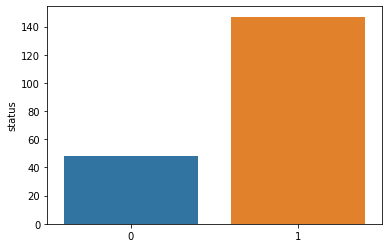

In [13]:
# para este plot utilizaremos a biblioteca seaborn, que é muito útil para gráficos no python
import seaborn as sns
# para plotar a proporção das classes, primeiro contamos os valores da coluna 'target' e transformamos em um frame
aux = pd.DataFrame(dataset['status'].value_counts())
# usamos o frame criado acima para plot a frequencia de cada classe no dataset
sns.barplot(x=aux.index, y='status', data=aux)

## Calculo da Diferenca Absoluta

Observando os resultados, podemos ver que os metodos MLP e Arvore de Decisao tem as melhores performances, logo temos que calcular a diferenca absoluta para ver qual dos dois e de fato o melhor

In [ ]:
#Calculo do desvio padrao
import math
Dp = math.sqrt(((0.121518)*(0.121518) + (0.123700)*(0.123700))/2)
#Calculo da media
media = (0.813421 - 0.808421)
#calcula da Diferenca Absoluta
DA = media/Dp
print(DA)
#MLP < Tree

0.04077842627074251


Conclusao: A Arvore de decisao tem uma melhor performance do que o MLP e o restante dos algoritmos.



#***Hepatitis***

O dataset contem informcoes sobre o corpo da pessoa para ver se tal pessoa tem ou nao Hepatite. É utilizado a coluna "Histology" em que o numero 1 representa pessoas com Hepatite e o numero 2 pessoa que nao tem.

## Arvore de Decisao

In [15]:
#Importa as bibliotecas Pandas e Numpy
import pandas as pd
import numpy as np

In [16]:
# na_values = substitui o valor '?' (dado faltante) para Nan
dataset = pd.read_csv('hepatitis.data', sep=',', na_values='?',names=['Class','Age','Sex','Steroid','Antivirals','Fatigue','Malaise','Anorexia','Liver Big','Liver Firm','Spleen Palpable','Spiders','Ascites','Varices','Bilirubin','Alk Phosphate','Sgot','Albumin','Protime','Histology'])
dataset

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,2,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2.0,2,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,7.6,NaN,242.0,3.3,50.0,2
151,2,44,1,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.0,142.0,4.3,NaN,2
152,2,61,1,1.0,2,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.0,20.0,4.1,NaN,2
153,2,53,2,1.0,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.0,2


In [17]:

# elimina as linhas com dados faltantes
dataset = dataset.dropna(axis=0)
dataset

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology
5,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.9,95.0,28.0,4.0,75.0,1
10,2,39,1,1.0,1,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.3,78.0,30.0,4.4,85.0,1
11,2,32,1,2.0,1,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,59.0,249.0,3.7,54.0,1
12,2,41,1,2.0,1,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,81.0,60.0,3.9,52.0,1
13,2,30,1,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.2,57.0,144.0,4.9,78.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2,45,1,2.0,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.3,85.0,44.0,4.2,85.0,2
143,1,49,1,1.0,2,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.4,85.0,70.0,3.5,35.0,2
145,2,31,1,1.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.2,75.0,173.0,4.2,54.0,2
153,2,53,2,1.0,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.0,2


In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 5 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Class            80 non-null     int64  
 1   Age              80 non-null     int64  
 2   Sex              80 non-null     int64  
 3   Steroid          80 non-null     float64
 4   Antivirals       80 non-null     int64  
 5   Fatigue          80 non-null     float64
 6   Malaise          80 non-null     float64
 7   Anorexia         80 non-null     float64
 8   Liver Big        80 non-null     float64
 9   Liver Firm       80 non-null     float64
 10  Spleen Palpable  80 non-null     float64
 11  Spiders          80 non-null     float64
 12  Ascites          80 non-null     float64
 13  Varices          80 non-null     float64
 14  Bilirubin        80 non-null     float64
 15  Alk Phosphate    80 non-null     float64
 16  Sgot             80 non-null     float64
 17  Albumin          

In [19]:
#Separando as variáveis independentes (conjunto X) e a variável dependente y (que neste caso é a coluna 'Histology')
X = dataset.loc[:, dataset.columns != 'Histology'] 
y = np.array(dataset.loc[:, dataset.columns == 'Histology']).ravel()

In [20]:
#Define os parametros do metodo de Arvore de Decisao
parameters= {'criterion':['gini'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150,180,220], 'random_state': [56]}

In [21]:
# importa o método do sklearn que separa em conjunto de treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.26, stratify=y, random_state=56)

In [22]:
# importa o GridSearchCV
from sklearn.model_selection import GridSearchCV
# importa a arvore de decisão
from sklearn.tree import DecisionTreeClassifier
# instancia o classificador 
clf = DecisionTreeClassifier()
gs_tree = GridSearchCV(clf,parameters, cv = 10, scoring = 'accuracy')
# o grid search treinará todos os modelos conforme a parametrização acima
gs_tree.fit(X,y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150, 180, 220],
                         'random_state': [56]},
             scoring='accuracy')

In [23]:
# coloca os resultados num Frame para melhor visulização
results = pd.DataFrame(gs_tree.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_random_state,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002153,0.000528,0.001353,0.000253,gini,4,56,"{'criterion': 'gini', 'max_depth': 4, 'random_...",0.75,0.625,...,0.750,0.625,0.500,0.750,0.375,0.625,0.500,0.6250,0.125000,1
1,0.001890,0.000142,0.001328,0.000302,gini,5,56,"{'criterion': 'gini', 'max_depth': 5, 'random_...",0.75,0.625,...,0.500,0.625,0.500,0.750,0.375,0.500,0.500,0.5875,0.125623,2
2,0.001856,0.000028,0.001230,0.000074,gini,6,56,"{'criterion': 'gini', 'max_depth': 6, 'random_...",0.75,0.625,...,0.500,0.625,0.250,0.625,0.375,0.625,0.625,0.5625,0.139754,3
3,0.002200,0.000632,0.001365,0.000412,gini,7,56,"{'criterion': 'gini', 'max_depth': 7, 'random_...",0.75,0.625,...,0.625,0.625,0.250,0.625,0.375,0.500,0.625,0.5625,0.139754,3
4,0.002202,0.000455,0.001373,0.000240,gini,8,56,"{'criterion': 'gini', 'max_depth': 8, 'random_...",0.75,0.375,...,0.625,0.500,0.375,0.625,0.375,0.500,0.625,0.5375,0.125623,20
5,0.002482,0.000465,0.001567,0.000290,gini,9,56,"{'criterion': 'gini', 'max_depth': 9, 'random_...",0.75,0.375,...,0.625,0.500,0.500,0.625,0.375,0.500,0.625,0.5500,0.114564,5
6,0.001864,0.000026,0.001215,0.000035,gini,10,56,"{'criterion': 'gini', 'max_depth': 10, 'random...",0.75,0.375,...,0.625,0.500,0.500,0.625,0.375,0.500,0.625,0.5500,0.114564,5
7,0.002158,0.000660,0.001376,0.000426,gini,11,56,"{'criterion': 'gini', 'max_depth': 11, 'random...",0.75,0.375,...,0.625,0.500,0.500,0.625,0.375,0.500,0.625,0.5500,0.114564,5
8,0.001917,0.000063,0.001208,0.000018,gini,12,56,"{'criterion': 'gini', 'max_depth': 12, 'random...",0.75,0.375,...,0.625,0.500,0.500,0.625,0.375,0.500,0.625,0.5500,0.114564,5
9,0.001875,0.000042,0.001241,0.000125,gini,15,56,"{'criterion': 'gini', 'max_depth': 15, 'random...",0.75,0.375,...,0.625,0.500,0.500,0.625,0.375,0.500,0.625,0.5500,0.114564,5


In [24]:
#criar uma visão para facilitar a visualização dos resultados, e ordenar os resultados conforme os resultados.
view = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
results[view].sort_values(by='rank_test_score')

,params,mean_test_score,std_test_score,rank_test_score
0,"{'criterion': 'gini', 'max_depth': 4, 'random_...",0.6250,0.125000,1
1,"{'criterion': 'gini', 'max_depth': 5, 'random_...",0.5875,0.125623,2
2,"{'criterion': 'gini', 'max_depth': 6, 'random_...",0.5625,0.139754,3
3,"{'criterion': 'gini', 'max_depth': 7, 'random_...",0.5625,0.139754,3
17,"{'criterion': 'gini', 'max_depth': 150, 'rando...",0.5500,0.114564,5
16,"{'criterion': 'gini', 'max_depth': 120, 'rando...",0.5500,0.114564,5
15,"{'criterion': 'gini', 'max_depth': 90, 'random...",0.5500,0.114564,5
14,"{'criterion': 'gini', 'max_depth': 70, 'random...",0.5500,0.114564,5
13,"{'criterion': 'gini', 'max_depth': 50, 'random...",0.5500,0.114564,5
12,"{'criterion': 'gini', 'max_depth': 40, 'random...",0.5500,0.114564,5


## Multilayer-Perceptron (redes neurais)

In [ ]:
#Importa as bibliotecas Pandas e Numpy
import pandas as pd
import numpy as np

In [ ]:
# na_values = substitui o valor '?' (dado faltante) para Nan
dataset = pd.read_csv('hepatitis.data', sep=',', na_values='?',names=['Class','Age','Sex','Steroid','Antivirals','Fatigue','Malaise','Anorexia','Liver Big','Liver Firm','Spleen Palpable','Spiders','Ascites','Varices','Bilirubin','Alk Phosphate','Sgot','Albumin','Protime','Histology'])
dataset

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,2,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2.0,2,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,7.6,NaN,242.0,3.3,50.0,2
151,2,44,1,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.0,142.0,4.3,NaN,2
152,2,61,1,1.0,2,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.0,20.0,4.1,NaN,2
153,2,53,2,1.0,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.0,2


In [ ]:

# elimina as linhas com dados faltantes
dataset = dataset.dropna(axis=0)
dataset

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology
5,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.9,95.0,28.0,4.0,75.0,1
10,2,39,1,1.0,1,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.3,78.0,30.0,4.4,85.0,1
11,2,32,1,2.0,1,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,59.0,249.0,3.7,54.0,1
12,2,41,1,2.0,1,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,81.0,60.0,3.9,52.0,1
13,2,30,1,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.2,57.0,144.0,4.9,78.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2,45,1,2.0,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.3,85.0,44.0,4.2,85.0,2
143,1,49,1,1.0,2,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.4,85.0,70.0,3.5,35.0,2
145,2,31,1,1.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.2,75.0,173.0,4.2,54.0,2
153,2,53,2,1.0,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.0,2


In [ ]:
#Separando as variáveis independentes (conjunto X) e a variável dependente y (que neste caso é a coluna 'Histology')
X = dataset.loc[:, dataset.columns != 'Histology'] 
y = np.array(dataset.loc[:, dataset.columns == 'Histology']).ravel()

In [ ]:
# importa o algoritmo de classificação Multilayer-Perceptron (redes neurais)
from sklearn.neural_network import MLPClassifier
# importa o GridSearchCV
from sklearn.model_selection import GridSearchCV

# na MLP um parâmetro a ser testado é a quantidade de neurônios na camada escondida, 
# onde utilzamos uma tupla para representar a camada escondida.
# Por exemplo:
# (5) - Cinco neurônios e uma camada escondida
# (8, 5) - Oito neurônios na primeira camada escondida e cinco neurônios na segunda camada escondida.
# Interessante nesse projeto utilizar no máximo duas camadas para verificação 
# Quanto mais camadas e neurônios maior o tempo de processamento do algoritmo
parameters = {'hidden_layer_sizes' : [(5), (8), (15), (5, 3), (8, 5), (10, 5)],
              'max_iter' : [3000], 'random_state' : [56]}

# define o algoritmo de classificação que será usado
mlp = MLPClassifier()
gs_mlp = GridSearchCV(mlp, parameters, cv=10, scoring='accuracy')
# o grid search treinará todos os modelos conforme a parametrização acima
gs_mlp.fit(X, y)

GridSearchCV(cv=10, estimator=MLPClassifier(),
             param_grid={'hidden_layer_sizes': [5, 8, 15, (5, 3), (8, 5),
                                                (10, 5)],
                         'max_iter': [3000], 'random_state': [56]},
             scoring='accuracy')

In [ ]:
#criar uma visão para facilitar a visualização dos resultados, e ordenar os resultados conforme os resultados.
view = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
results = pd.DataFrame(gs_mlp.cv_results_)
results[view].sort_values(by='rank_test_score')

,params,mean_test_score,std_test_score,rank_test_score
0,"{'hidden_layer_sizes': 5, 'max_iter': 3000, 'r...",0.6750,0.160078,1
2,"{'hidden_layer_sizes': 15, 'max_iter': 3000, '...",0.6625,0.112500,2
4,"{'hidden_layer_sizes': (8, 5), 'max_iter': 300...",0.6250,0.111803,3
1,"{'hidden_layer_sizes': 8, 'max_iter': 3000, 'r...",0.5875,0.057282,4
5,"{'hidden_layer_sizes': (10, 5), 'max_iter': 30...",0.5875,0.125623,4
3,"{'hidden_layer_sizes': (5, 3), 'max_iter': 300...",0.5500,0.114564,6


## Naive Bayes

In [ ]:
#Importa as bibliotecas Pandas e Numpy
import pandas as pd
import numpy as np

In [ ]:
# na_values = substitui o valor '?' (dado faltante) para Nan
dataset = pd.read_csv('hepatitis.data', sep=',', na_values='?',names=['Class','Age','Sex','Steroid','Antivirals','Fatigue','Malaise','Anorexia','Liver Big','Liver Firm','Spleen Palpable','Spiders','Ascites','Varices','Bilirubin','Alk Phosphate','Sgot','Albumin','Protime','Histology'])
dataset

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,2,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2.0,2,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,7.6,NaN,242.0,3.3,50.0,2
151,2,44,1,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.0,142.0,4.3,NaN,2
152,2,61,1,1.0,2,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.0,20.0,4.1,NaN,2
153,2,53,2,1.0,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.0,2


In [ ]:

# elimina as linhas com dados faltantes
dataset = dataset.dropna(axis=0)
dataset

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology
5,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.9,95.0,28.0,4.0,75.0,1
10,2,39,1,1.0,1,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.3,78.0,30.0,4.4,85.0,1
11,2,32,1,2.0,1,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,59.0,249.0,3.7,54.0,1
12,2,41,1,2.0,1,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,81.0,60.0,3.9,52.0,1
13,2,30,1,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.2,57.0,144.0,4.9,78.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2,45,1,2.0,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.3,85.0,44.0,4.2,85.0,2
143,1,49,1,1.0,2,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.4,85.0,70.0,3.5,35.0,2
145,2,31,1,1.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.2,75.0,173.0,4.2,54.0,2
153,2,53,2,1.0,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.0,2


In [ ]:
#Separando as variáveis independentes (conjunto X) e a variável dependente y (que neste caso é a coluna 'Histology')
X = dataset.loc[:, dataset.columns != 'Histology'] 
y = np.array(dataset.loc[:, dataset.columns == 'Histology']).ravel()

In [ ]:
#Define os parametros do metodo Naive Bayes
param = {'var_smoothing': np.logspace(0,-9, num=100)}

In [ ]:
# importa o método do sklearn que separa em conjunto de treino e teste
from sklearn.model_selection import train_test_split
# importa o algoritmo Naive Bayes 
from sklearn.naive_bayes import GaussianNB
# importa o GridSearchCV
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=56)
# instancia o classificador
gnb = GaussianNB()
gs_NB = GridSearchCV(gnb, param, cv = 10, scoring = 'accuracy')
# o grid search treinará todos os modelos conforme a parametrização acima
gs_NB.fit(X,y)

GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy')

In [ ]:
#criar uma visão para facilitar a visualização dos resultados, e ordenar os resultados conforme os resultados.
view = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
results = pd.DataFrame(gs_NB.cv_results_)
results[view].sort_values(by='rank_test_score')

,params,mean_test_score,std_test_score,rank_test_score
99,{'var_smoothing': 1e-09},0.7625,0.103833,1
81,{'var_smoothing': 4.3287612810830526e-08},0.7625,0.103833,1
82,{'var_smoothing': 3.5111917342151277e-08},0.7625,0.103833,1
83,{'var_smoothing': 2.848035868435799e-08},0.7625,0.103833,1
84,{'var_smoothing': 2.310129700083158e-08},0.7625,0.103833,1
...,...,...,...,...
4,{'var_smoothing': 0.43287612810830584},0.5750,0.150000,95
3,{'var_smoothing': 0.533669923120631},0.5625,0.115244,97
1,{'var_smoothing': 0.8111308307896871},0.5625,0.083853,97
0,{'var_smoothing': 1.0},0.5625,0.083853,97


## K Neighbors

In [ ]:
#Importa as bibliotecas Pandas e Numpy
import pandas as pd
import numpy as np

In [ ]:
# na_values = substitui o valor '?' (dado faltante) para Nan
dataset = pd.read_csv('hepatitis.data', sep=',', na_values='?',names=['Class','Age','Sex','Steroid','Antivirals','Fatigue','Malaise','Anorexia','Liver Big','Liver Firm','Spleen Palpable','Spiders','Ascites','Varices','Bilirubin','Alk Phosphate','Sgot','Albumin','Protime','Histology'])
dataset

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,2,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2.0,2,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,7.6,NaN,242.0,3.3,50.0,2
151,2,44,1,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.0,142.0,4.3,NaN,2
152,2,61,1,1.0,2,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.0,20.0,4.1,NaN,2
153,2,53,2,1.0,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.0,2


In [ ]:

# elimina as linhas com dados faltantes
dataset = dataset.dropna(axis=0)
dataset

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology
5,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.9,95.0,28.0,4.0,75.0,1
10,2,39,1,1.0,1,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.3,78.0,30.0,4.4,85.0,1
11,2,32,1,2.0,1,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,59.0,249.0,3.7,54.0,1
12,2,41,1,2.0,1,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,81.0,60.0,3.9,52.0,1
13,2,30,1,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.2,57.0,144.0,4.9,78.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2,45,1,2.0,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.3,85.0,44.0,4.2,85.0,2
143,1,49,1,1.0,2,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.4,85.0,70.0,3.5,35.0,2
145,2,31,1,1.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.2,75.0,173.0,4.2,54.0,2
153,2,53,2,1.0,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.0,2


In [ ]:
#Separando as variáveis independentes (conjunto X) e a variável dependente y (que neste caso é a coluna 'Histology')
X = dataset.loc[:, dataset.columns != 'Histology'] 
y = np.array(dataset.loc[:, dataset.columns == 'Histology']).ravel()

In [ ]:
# importa o algoritmo de classifcaçaõ k-vizinhos
from sklearn.neighbors import KNeighborsClassifier
# importa o GridSearchCV
from sklearn.model_selection import GridSearchCV

# no grid coloca os hiperparâmetros do algoritmo que serão testados (dicionário)
# testará o valor de k com os seguintes valores e o hiperparâmetros weights com os valores 'uniform' e 'distance'
parameters = {'n_neighbors' : [1, 3, 5, 7, 9, 11, 13], 'weights' : ['uniform', 'distance']}

# define o algoritmo de classificação que será usado
knn = KNeighborsClassifier()
''' configura o GridSearch com o algoritmo de classificação = knn (instanciado), os parâmetros testados serão os 
    definidos em parameters, usa cross-validation = 10 e a medida de avaliação é a acurácia.'''  
gs = GridSearchCV(knn, parameters, cv=10, scoring='accuracy')
# o grid search treinará todos os modelos conforme a parametrização acima
gs.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
# coloca os resultados num Frame para melhor visulização
results = pd.DataFrame(gs.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002365,0.000847,0.002562,0.000693,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",0.750,0.250,0.750,0.750,0.500,0.500,0.500,0.500,0.500,0.750,0.5750,0.160078,11
1,0.001935,0.000127,0.001993,0.000057,1,distance,"{'n_neighbors': 1, 'weights': 'distance'}",0.750,0.250,0.750,0.750,0.500,0.500,0.500,0.500,0.500,0.750,0.5750,0.160078,11
2,0.002300,0.000636,0.002601,0.000617,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.500,0.375,0.625,0.875,0.625,0.625,0.375,0.625,0.625,0.625,0.5875,0.137500,7
3,0.001971,0.000129,0.002049,0.000046,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.500,0.375,0.625,0.875,0.625,0.625,0.375,0.625,0.625,0.625,0.5875,0.137500,7
4,0.001942,0.000062,0.002312,0.000139,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.625,0.500,0.750,1.000,0.500,0.500,0.625,0.500,0.625,0.375,0.6000,0.165831,3
5,0.001918,0.000088,0.001991,0.000018,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.625,0.500,0.750,0.875,0.500,0.500,0.625,0.500,0.625,0.625,0.6125,0.117925,2
6,0.002374,0.000538,0.003285,0.001138,7,uniform,"{'n_neighbors': 7, 'weights': 'uniform'}",0.500,0.500,0.625,0.625,0.625,0.500,0.750,0.500,0.750,0.375,0.5750,0.114564,11
7,0.002413,0.000618,0.002486,0.000627,7,distance,"{'n_neighbors': 7, 'weights': 'distance'}",0.500,0.500,0.625,0.875,0.500,0.500,0.750,0.500,0.750,0.500,0.6000,0.134629,3
8,0.002474,0.001526,0.002794,0.000983,9,uniform,"{'n_neighbors': 9, 'weights': 'uniform'}",0.500,0.625,0.625,0.750,0.625,0.500,0.750,0.625,0.750,0.250,0.6000,0.145774,3
9,0.002134,0.000356,0.002113,0.000274,9,distance,"{'n_neighbors': 9, 'weights': 'distance'}",0.500,0.625,0.625,0.875,0.500,0.500,0.750,0.625,0.750,0.500,0.6250,0.125000,1


In [ ]:
#criar uma visão para facilitar a visualização dos resultados, e ordenar os resultados conforme os resultados.
view = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
results[view].sort_values(by='rank_test_score')

,params,mean_test_score,std_test_score,rank_test_score
9,"{'n_neighbors': 9, 'weights': 'distance'}",0.6250,0.125000,1
5,"{'n_neighbors': 5, 'weights': 'distance'}",0.6125,0.117925,2
4,"{'n_neighbors': 5, 'weights': 'uniform'}",0.6000,0.165831,3
7,"{'n_neighbors': 7, 'weights': 'distance'}",0.6000,0.134629,3
8,"{'n_neighbors': 9, 'weights': 'uniform'}",0.6000,0.145774,3
12,"{'n_neighbors': 13, 'weights': 'uniform'}",0.6000,0.145774,3
2,"{'n_neighbors': 3, 'weights': 'uniform'}",0.5875,0.137500,7
3,"{'n_neighbors': 3, 'weights': 'distance'}",0.5875,0.137500,7
11,"{'n_neighbors': 11, 'weights': 'distance'}",0.5875,0.137500,7
13,"{'n_neighbors': 13, 'weights': 'distance'}",0.5875,0.168170,7


##Grafico de balanceamento

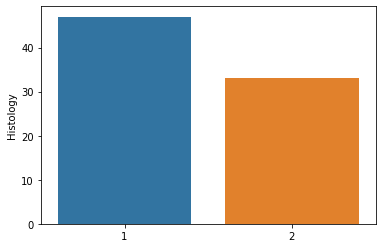

In [25]:
# para este plot utilizaremos a biblioteca seaborn, que é muito útil para gráficos no python
import seaborn as sns
# para plotar a proporção das classes, primeiro contamos os valores da coluna 'target' e transformamos em um frame
aux = pd.DataFrame(dataset['Histology'].value_counts())
# usamos o frame criado acima para plot a frequencia de cada classe no dataset
sns.barplot(x=aux.index, y='Histology', data=aux)

## Calculo da Diferenca Absoluta

Observando os resultados, podemos ver que os metodos MLP e Naive Bayes tem as melhores performances, logo temos que calcular a diferenca absoluta para ver qual dos dois e de fato o melhor

In [ ]:
#Calculo do desvio padrao
import math
Dp = math.sqrt(((0.160078)*(0.160078) + (0.103833)*(0.103833))/2)
#Calculo da media
media = (0.6750 - 0.7625)
#calcula da Diferenca Absoluta
DA = media/Dp
print(DA)
#MLP < Naive Bayes

-0.6485374054417903


Conclusao: O MLP tem uma melhor performance do que a Arvore de decisao e o restante dos algoritmos



#***Spam Base***

O dataset diferencia um email normal de um spam utilizando frequencia de certa palavra ou caractere. A coluna designada para a diferenciacao tem um conjunto de 0 e 1, em que 1 significa que o email e uma spam e 0 significa que e um email normal.

## Arvore de Decisao

In [28]:
#Importa as bibliotecas Pandas e Numpy
import pandas as pd
import numpy as np

In [29]:
# na_values = substitui o valor '?' (dado faltante) para Nan
dataset = pd.read_csv('spambase.data', sep=',', na_values='?',header=None)
dataset

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [30]:

# elimina as linhas com dados faltantes
dataset = dataset.dropna(axis=0)
dataset

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [31]:
#Separando as variáveis independentes (conjunto X) e a variável dependente y (que neste caso é a coluna 57)
X = dataset.loc[:, dataset.columns != 57] 
y = np.array(dataset.loc[:, dataset.columns == 57]).ravel()

In [32]:
#Define os parametros do metodo de Arvore de Decisao
parameters= {'criterion':['gini'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150,180,220], 'random_state': [56]}

In [33]:
# importa o método do sklearn que separa em conjunto de treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.26, stratify=y, random_state=56)

In [34]:
# importa o GridSearchCV
from sklearn.model_selection import GridSearchCV
# importa a arvore de decisão
from sklearn.tree import DecisionTreeClassifier
# instancia o classificador 
clf = DecisionTreeClassifier()
gs_tree = GridSearchCV(clf,parameters, cv = 10, scoring = 'accuracy')
# o grid search treinará todos os modelos conforme a parametrização acima
gs_tree.fit(X,y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150, 180, 220],
                         'random_state': [56]},
             scoring='accuracy')

In [35]:
# coloca os resultados num Frame para melhor visulização
results = pd.DataFrame(gs_tree.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_random_state,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.024156,0.001539,0.001802,0.000107,gini,4,56,"{'criterion': 'gini', 'max_depth': 4, 'random_...",0.898048,0.904348,...,0.906522,0.902174,0.923913,0.915217,0.908696,0.867391,0.786957,0.890674,0.037368,20
1,0.028254,0.000584,0.001949,0.000334,gini,5,56,"{'criterion': 'gini', 'max_depth': 5, 'random_...",0.921909,0.926087,...,0.900000,0.915217,0.926087,0.926087,0.926087,0.878261,0.817391,0.902843,0.032749,9
2,0.033773,0.001506,0.001993,0.000334,gini,6,56,"{'criterion': 'gini', 'max_depth': 6, 'random_...",0.930586,0.926087,...,0.921739,0.915217,0.926087,0.923913,0.923913,0.873913,0.826087,0.907624,0.031277,7
3,0.037930,0.000979,0.001897,0.000084,gini,7,56,"{'criterion': 'gini', 'max_depth': 7, 'random_...",0.926247,0.930435,...,0.910870,0.917391,0.932609,0.923913,0.926087,0.878261,0.841304,0.910016,0.027269,4
4,0.042702,0.001017,0.001964,0.000176,gini,8,56,"{'criterion': 'gini', 'max_depth': 8, 'random_...",0.934924,0.930435,...,0.917391,0.913043,0.943478,0.932609,0.930435,0.876087,0.815217,0.910232,0.036452,3
5,0.047870,0.003136,0.002001,0.000258,gini,9,56,"{'criterion': 'gini', 'max_depth': 9, 'random_...",0.934924,0.928261,...,0.919565,0.915217,0.947826,0.928261,0.928261,0.854348,0.841304,0.910884,0.033137,2
6,0.051006,0.001457,0.001989,0.000108,gini,10,56,"{'criterion': 'gini', 'max_depth': 10, 'random...",0.934924,0.936957,...,0.926087,0.926087,0.932609,0.934783,0.932609,0.858696,0.839130,0.912188,0.033479,1
7,0.054763,0.001759,0.001948,0.000076,gini,11,56,"{'criterion': 'gini', 'max_depth': 11, 'random...",0.921909,0.932609,...,0.923913,0.923913,0.941304,0.917391,0.926087,0.865217,0.817391,0.908495,0.035944,5
8,0.057533,0.001618,0.001934,0.000048,gini,12,56,"{'criterion': 'gini', 'max_depth': 12, 'random...",0.917570,0.921739,...,0.930435,0.926087,0.945652,0.926087,0.928261,0.847826,0.815217,0.907409,0.039426,8
9,0.065676,0.004358,0.001970,0.000044,gini,15,56,"{'criterion': 'gini', 'max_depth': 15, 'random...",0.911063,0.934783,...,0.926087,0.915217,0.926087,0.939130,0.930435,0.858696,0.830435,0.908280,0.033705,6


In [36]:
#criar uma visão para facilitar a visualização dos resultados, e ordenar os resultados conforme os resultados.
view = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
results[view].sort_values(by='rank_test_score')

,params,mean_test_score,std_test_score,rank_test_score
6,"{'criterion': 'gini', 'max_depth': 10, 'random...",0.912188,0.033479,1
5,"{'criterion': 'gini', 'max_depth': 9, 'random_...",0.910884,0.033137,2
4,"{'criterion': 'gini', 'max_depth': 8, 'random_...",0.910232,0.036452,3
3,"{'criterion': 'gini', 'max_depth': 7, 'random_...",0.910016,0.027269,4
7,"{'criterion': 'gini', 'max_depth': 11, 'random...",0.908495,0.035944,5
9,"{'criterion': 'gini', 'max_depth': 15, 'random...",0.908280,0.033705,6
2,"{'criterion': 'gini', 'max_depth': 6, 'random_...",0.907624,0.031277,7
8,"{'criterion': 'gini', 'max_depth': 12, 'random...",0.907409,0.039426,8
1,"{'criterion': 'gini', 'max_depth': 5, 'random_...",0.902843,0.032749,9
10,"{'criterion': 'gini', 'max_depth': 20, 'random...",0.901106,0.036529,10


## Multilayer-Perceptron (redes neurais)

In [ ]:
#Importa as bibliotecas Pandas e Numpy
import pandas as pd
import numpy as np

In [ ]:
# na_values = substitui o valor '?' (dado faltante) para Nan
dataset = pd.read_csv('spambase.data', sep=',', na_values='?',header=None)
dataset

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [ ]:

# elimina as linhas com dados faltantes
dataset = dataset.dropna(axis=0)
dataset

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [ ]:
#Separando as variáveis independentes (conjunto X) e a variável dependente y (que neste caso é a coluna 57)
X = dataset.loc[:, dataset.columns != 57] 
y = np.array(dataset.loc[:, dataset.columns == 57]).ravel()

In [ ]:
# importa o algoritmo de classificação Multilayer-Perceptron (redes neurais)
from sklearn.neural_network import MLPClassifier
# importa o GridSearchCV
from sklearn.model_selection import GridSearchCV

# na MLP um parâmetro a ser testado é a quantidade de neurônios na camada escondida, 
# onde utilzamos uma tupla para representar a camada escondida.
# Por exemplo:
# (5) - Cinco neurônios e uma camada escondida
# (8, 5) - Oito neurônios na primeira camada escondida e cinco neurônios na segunda camada escondida.
# Interessante nesse projeto utilizar no máximo duas camadas para verificação 
# Quanto mais camadas e neurônios maior o tempo de processamento do algoritmo
parameters = {'hidden_layer_sizes' : [(5), (8), (15), (5, 3), (8, 5), (10, 5)],
              'max_iter' : [3000], 'random_state' : [56]}

# define o algoritmo de classificação que será usado
mlp = MLPClassifier()
gs_mlp = GridSearchCV(mlp, parameters, cv=10, scoring='accuracy')
# o grid search treinará todos os modelos conforme a parametrização acima
gs_mlp.fit(X, y)

GridSearchCV(cv=10, estimator=MLPClassifier(),
             param_grid={'hidden_layer_sizes': [5, 8, 15, (5, 3), (8, 5),
                                                (10, 5)],
                         'max_iter': [3000], 'random_state': [56]},
             scoring='accuracy')

In [ ]:
#criar uma visão para facilitar a visualização dos resultados, e ordenar os resultados conforme os resultados.
view = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
results = pd.DataFrame(gs_mlp.cv_results_)
results[view].sort_values(by='rank_test_score')

,params,mean_test_score,std_test_score,rank_test_score
4,"{'hidden_layer_sizes': (8, 5), 'max_iter': 300...",0.926967,0.035518,1
2,"{'hidden_layer_sizes': 15, 'max_iter': 3000, '...",0.924580,0.032670,2
3,"{'hidden_layer_sizes': (5, 3), 'max_iter': 300...",0.924146,0.030999,3
0,"{'hidden_layer_sizes': 5, 'max_iter': 3000, 'r...",0.921750,0.040874,4
1,"{'hidden_layer_sizes': 8, 'max_iter': 3000, 'r...",0.921536,0.043313,5
5,"{'hidden_layer_sizes': (10, 5), 'max_iter': 30...",0.918276,0.034062,6


## Naive Bayes

In [ ]:
#Importa as bibliotecas Pandas e Numpy
import pandas as pd
import numpy as np

In [ ]:
# na_values = substitui o valor '?' (dado faltante) para Nan
dataset = pd.read_csv('spambase.data', sep=',', na_values='?',header=None)
dataset

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [ ]:

# elimina as linhas com dados faltantes
dataset = dataset.dropna(axis=0)
dataset

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [ ]:
#Separando as variáveis independentes (conjunto X) e a variável dependente y (que neste caso é a coluna 57)
X = dataset.loc[:, dataset.columns != 57] 
y = np.array(dataset.loc[:, dataset.columns == 57]).ravel()

In [ ]:
#Define os parametros do metodo Naive Bayes
param = {'var_smoothing': np.logspace(0,-9, num=100)}

In [ ]:
# importa o método do sklearn que separa em conjunto de treino e teste
from sklearn.model_selection import train_test_split
# importa o algoritmo Naive Bayes 
from sklearn.naive_bayes import GaussianNB
# importa o GridSearchCV
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=56)
# instancia o classificador
gnb = GaussianNB()
gs_NB = GridSearchCV(gnb, param, cv = 10, scoring = 'accuracy')
# o grid search treinará todos os modelos conforme a parametrização acima
gs_NB.fit(X,y)

GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy')

In [ ]:
#criar uma visão para facilitar a visualização dos resultados, e ordenar os resultados conforme os resultados.
view = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
results = pd.DataFrame(gs_NB.cv_results_)
results[view].sort_values(by='rank_test_score')

,params,mean_test_score,std_test_score,rank_test_score
64,{'var_smoothing': 1.519911082952933e-06},0.851997,0.063915,1
65,{'var_smoothing': 1.232846739442066e-06},0.850685,0.078880,2
66,{'var_smoothing': 1e-06},0.843288,0.091807,3
63,{'var_smoothing': 1.873817422860383e-06},0.840489,0.048544,4
98,{'var_smoothing': 1.2328467394420635e-09},0.822208,0.076665,5
...,...,...,...,...
4,{'var_smoothing': 0.43287612810830584},0.641172,0.022026,96
3,{'var_smoothing': 0.533669923120631},0.638781,0.021346,97
1,{'var_smoothing': 0.8111308307896871},0.635955,0.019249,98
2,{'var_smoothing': 0.657933224657568},0.635738,0.021521,99


## K Neighbors

In [ ]:
#Importa as bibliotecas Pandas e Numpy
import pandas as pd
import numpy as np

In [ ]:
# na_values = substitui o valor '?' (dado faltante) para Nan
dataset = pd.read_csv('spambase.data', sep=',', na_values='?',header=None)
dataset

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [ ]:

# elimina as linhas com dados faltantes
dataset = dataset.dropna(axis=0)
dataset

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [ ]:
#Separando as variáveis independentes (conjunto X) e a variável dependente y (que neste caso é a coluna 57)
X = dataset.loc[:, dataset.columns != 57] 
y = np.array(dataset.loc[:, dataset.columns == 57]).ravel()

In [ ]:
# importa o algoritmo de classifcaçaõ k-vizinhos
from sklearn.neighbors import KNeighborsClassifier
# importa o GridSearchCV
from sklearn.model_selection import GridSearchCV

# no grid coloca os hiperparâmetros do algoritmo que serão testados (dicionário)
# testará o valor de k com os seguintes valores e o hiperparâmetros weights com os valores 'uniform' e 'distance'
parameters = {'n_neighbors' : [1, 3, 5, 7, 9, 11, 13], 'weights' : ['uniform', 'distance']}

# define o algoritmo de classificação que será usado
knn = KNeighborsClassifier()
''' configura o GridSearch com o algoritmo de classificação = knn (instanciado), os parâmetros testados serão os 
    definidos em parameters, usa cross-validation = 10 e a medida de avaliação é a acurácia.'''  
gs = GridSearchCV(knn, parameters, cv=10, scoring='accuracy')
# o grid search treinará todos os modelos conforme a parametrização acima
gs.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
# coloca os resultados num Frame para melhor visulização
results = pd.DataFrame(gs.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007771,0.003027,0.054559,0.006907,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",0.750542,0.797826,0.791304,0.802174,0.834783,0.817391,0.817391,0.821739,0.728261,0.721739,0.788315,0.038372,8
1,0.006567,0.001907,0.033062,0.003622,1,distance,"{'n_neighbors': 1, 'weights': 'distance'}",0.750542,0.797826,0.791304,0.802174,0.834783,0.817391,0.817391,0.821739,0.728261,0.721739,0.788315,0.038372,8
2,0.005812,0.000194,0.061187,0.005392,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.759219,0.780435,0.784783,0.800000,0.821739,0.821739,0.808696,0.815217,0.713043,0.736957,0.784183,0.035446,10
3,0.005730,0.000191,0.042226,0.002538,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.767896,0.795652,0.806522,0.823913,0.836957,0.834783,0.823913,0.830435,0.728261,0.745652,0.799398,0.037194,3
4,0.005687,0.000118,0.076589,0.010375,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.739696,0.776087,0.778261,0.821739,0.810870,0.821739,0.819565,0.828261,0.723913,0.763043,0.788317,0.035659,7
5,0.005687,0.000234,0.053503,0.002746,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.754881,0.797826,0.797826,0.843478,0.823913,0.834783,0.834783,0.843478,0.734783,0.769565,0.803532,0.037246,1
6,0.005915,0.000623,0.072254,0.004406,7,uniform,"{'n_neighbors': 7, 'weights': 'uniform'}",0.746204,0.736957,0.756522,0.802174,0.795652,0.828261,0.826087,0.808696,0.710870,0.758696,0.777012,0.038344,11
7,0.007792,0.003518,0.070183,0.022018,7,distance,"{'n_neighbors': 7, 'weights': 'distance'}",0.767896,0.782609,0.793478,0.834783,0.819565,0.847826,0.845652,0.830435,0.719565,0.769565,0.801137,0.039559,2
8,0.010297,0.008042,0.107371,0.032648,9,uniform,"{'n_neighbors': 9, 'weights': 'uniform'}",0.733189,0.747826,0.743478,0.784783,0.782609,0.821739,0.800000,0.804348,0.710870,0.758696,0.768754,0.033605,13
9,0.008858,0.003186,0.094592,0.019900,9,distance,"{'n_neighbors': 9, 'weights': 'distance'}",0.761388,0.784783,0.767391,0.828261,0.817391,0.839130,0.830435,0.832609,0.717391,0.771739,0.795052,0.038452,4


In [ ]:
#criar uma visão para facilitar a visualização dos resultados, e ordenar os resultados conforme os resultados.
view = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
results[view].sort_values(by='rank_test_score')

,params,mean_test_score,std_test_score,rank_test_score
5,"{'n_neighbors': 5, 'weights': 'distance'}",0.803532,0.037246,1
7,"{'n_neighbors': 7, 'weights': 'distance'}",0.801137,0.039559,2
3,"{'n_neighbors': 3, 'weights': 'distance'}",0.799398,0.037194,3
9,"{'n_neighbors': 9, 'weights': 'distance'}",0.795052,0.038452,4
11,"{'n_neighbors': 11, 'weights': 'distance'}",0.793534,0.039585,5
13,"{'n_neighbors': 13, 'weights': 'distance'}",0.792884,0.041578,6
4,"{'n_neighbors': 5, 'weights': 'uniform'}",0.788317,0.035659,7
0,"{'n_neighbors': 1, 'weights': 'uniform'}",0.788315,0.038372,8
1,"{'n_neighbors': 1, 'weights': 'distance'}",0.788315,0.038372,8
2,"{'n_neighbors': 3, 'weights': 'uniform'}",0.784183,0.035446,10


##Grafico de balanceamento

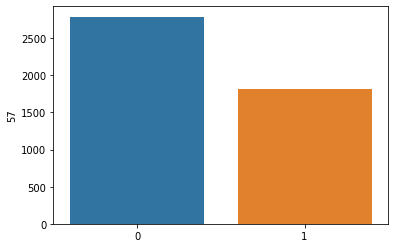

In [37]:
# para este plot utilizaremos a biblioteca seaborn, que é muito útil para gráficos no python
import seaborn as sns
# para plotar a proporção das classes, primeiro contamos os valores da coluna 'target' e transformamos em um frame
aux = pd.DataFrame(dataset[57].value_counts())
# usamos o frame criado acima para plot a frequencia de cada classe no dataset
sns.barplot(x=aux.index, y=57, data=aux)

## Calculo da Diferenca Absoluta

Observando os resultados, podemos ver que os metodos MLP e Arvore de Decisao tem as melhores performances, logo temos que calcular a diferenca absoluta para ver qual dos dois e de fato o melhor

In [ ]:
#Calculo do desvio padrao
import math
Dp = math.sqrt(((0.033479)*(0.033479) + (0.035518)*(0.035518))/2)
#Calculo da media
media = (0.912188 - 0.926967)
#calcula da Diferenca Absoluta
DA = media/Dp
print(DA)
#MLP > Tree

-0.4282084964956432


Conclusao: O MLP tem uma melhor performance do que a Arvore de decisao e o restante dos algoritmos



#***Transfusion***

Esse dataset tem informacoes se uma certa pessoa esta apta a doar sangue em marco de 2007, a partir de informacoes como a ultima vez que a pessoas doou sangue, quantas vezes elas ja doou. É utilizada uma coluna em que 1 significa que a pessoa esta apta a doar e 0 significa que nao.

## Arvore de Decisao

In [38]:
#Importa as bibliotecas Pandas e Numpy
import pandas as pd
import numpy as np

In [39]:
# na_values = substitui o valor '?' (dado faltante) para Nan
dataset = pd.read_csv('transfusion.data', sep=',', na_values='?')
dataset

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [40]:

# elimina as linhas com dados faltantes
dataset = dataset.dropna(axis=0)
dataset

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [41]:
#Separando as variáveis independentes (conjunto X) e a variável dependente y (que neste caso é a coluna 'whether he/she donated blood in March 2007')
X = dataset.loc[:, dataset.columns != 'whether he/she donated blood in March 2007'] 
y = np.array(dataset.loc[:, dataset.columns == 'whether he/she donated blood in March 2007']).ravel()

In [42]:
#Define os parametros do metodo de Arvore de Decisao
parameters= {'criterion':['gini'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150], 'random_state': [56]}

In [43]:
# importa o método do sklearn que separa em conjunto de treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.26, stratify=y, random_state=56)

In [44]:
# importa o GridSearchCV
from sklearn.model_selection import GridSearchCV
# importa a arvore de decisão
from sklearn.tree import DecisionTreeClassifier
# instancia o classificador 
clf = DecisionTreeClassifier()
gs_tree = GridSearchCV(clf,parameters, cv = 10, scoring = 'accuracy')
# o grid search treinará todos os modelos conforme a parametrização acima
gs_tree.fit(X,y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150],
                         'random_state': [56]},
             scoring='accuracy')

In [45]:
# coloca os resultados num Frame para melhor visulização
results = pd.DataFrame(gs_tree.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_random_state,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002043,0.000470,0.001090,0.000166,gini,4,56,"{'criterion': 'gini', 'max_depth': 4, 'random_...",0.346667,0.826667,...,0.813333,0.760000,0.760000,0.706667,0.813333,0.837838,0.770270,0.748811,0.140515,1
1,0.002019,0.000093,0.001074,0.000080,gini,5,56,"{'criterion': 'gini', 'max_depth': 5, 'random_...",0.400000,0.813333,...,0.706667,0.760000,0.746667,0.693333,0.773333,0.824324,0.756757,0.732775,0.120638,2
2,0.002076,0.000064,0.001063,0.000041,gini,6,56,"{'criterion': 'gini', 'max_depth': 6, 'random_...",0.253333,0.720000,...,0.786667,0.720000,0.733333,0.706667,0.800000,0.756757,0.756757,0.703351,0.153398,3
3,0.002192,0.000308,0.001113,0.000180,gini,7,56,"{'criterion': 'gini', 'max_depth': 7, 'random_...",0.293333,0.573333,...,0.720000,0.733333,0.733333,0.693333,0.813333,0.689189,0.743243,0.676577,0.141000,4
4,0.002178,0.000057,0.001091,0.000066,gini,8,56,"{'criterion': 'gini', 'max_depth': 8, 'random_...",0.293333,0.573333,...,0.746667,0.720000,0.733333,0.693333,0.813333,0.689189,0.743243,0.676577,0.140748,4
5,0.002183,0.000057,0.001066,0.000076,gini,9,56,"{'criterion': 'gini', 'max_depth': 9, 'random_...",0.266667,0.533333,...,0.666667,0.693333,0.733333,0.693333,0.800000,0.689189,0.743243,0.657910,0.146880,7
6,0.002190,0.000042,0.001041,0.000028,gini,10,56,"{'criterion': 'gini', 'max_depth': 10, 'random...",0.293333,0.560000,...,0.706667,0.706667,0.693333,0.706667,0.760000,0.662162,0.743243,0.659207,0.133797,6
7,0.002603,0.000893,0.001169,0.000205,gini,11,56,"{'criterion': 'gini', 'max_depth': 11, 'random...",0.320000,0.546667,...,0.680000,0.706667,0.733333,0.693333,0.760000,0.648649,0.756757,0.657874,0.127411,8
8,0.002272,0.000073,0.001053,0.000022,gini,12,56,"{'criterion': 'gini', 'max_depth': 12, 'random...",0.293333,0.546667,...,0.653333,0.666667,0.720000,0.733333,0.800000,0.621622,0.729730,0.651135,0.137483,9
9,0.002356,0.000113,0.001097,0.000084,gini,15,56,"{'criterion': 'gini', 'max_depth': 15, 'random...",0.306667,0.533333,...,0.653333,0.613333,0.720000,0.733333,0.786667,0.635135,0.743243,0.647171,0.134739,10


In [46]:
#criar uma visão para facilitar a visualização dos resultados, e ordenar os resultados conforme os resultados.
view = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
results[view].sort_values(by='rank_test_score')

,params,mean_test_score,std_test_score,rank_test_score
0,"{'criterion': 'gini', 'max_depth': 4, 'random_...",0.748811,0.140515,1
1,"{'criterion': 'gini', 'max_depth': 5, 'random_...",0.732775,0.120638,2
2,"{'criterion': 'gini', 'max_depth': 6, 'random_...",0.703351,0.153398,3
3,"{'criterion': 'gini', 'max_depth': 7, 'random_...",0.676577,0.141000,4
4,"{'criterion': 'gini', 'max_depth': 8, 'random_...",0.676577,0.140748,4
6,"{'criterion': 'gini', 'max_depth': 10, 'random...",0.659207,0.133797,6
5,"{'criterion': 'gini', 'max_depth': 9, 'random_...",0.657910,0.146880,7
7,"{'criterion': 'gini', 'max_depth': 11, 'random...",0.657874,0.127411,8
8,"{'criterion': 'gini', 'max_depth': 12, 'random...",0.651135,0.137483,9
9,"{'criterion': 'gini', 'max_depth': 15, 'random...",0.647171,0.134739,10


## Multilayer-Perceptron (redes neurais)

In [ ]:
#Importa as bibliotecas Pandas e Numpy
import pandas as pd
import numpy as np

In [ ]:
# na_values = substitui o valor '?' (dado faltante) para Nan
dataset = pd.read_csv('transfusion.data', sep=',', na_values='?')
dataset

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [ ]:

# elimina as linhas com dados faltantes
dataset = dataset.dropna(axis=0)
dataset

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [ ]:
#Separando as variáveis independentes (conjunto X) e a variável dependente y (que neste caso é a coluna 'whether he/she donated blood in March 2007')
X = dataset.loc[:, dataset.columns != 'whether he/she donated blood in March 2007'] 
y = np.array(dataset.loc[:, dataset.columns == 'whether he/she donated blood in March 2007']).ravel()

In [ ]:
# importa o algoritmo de classificação Multilayer-Perceptron (redes neurais)
from sklearn.neural_network import MLPClassifier
# importa o GridSearchCV
from sklearn.model_selection import GridSearchCV

# na MLP um parâmetro a ser testado é a quantidade de neurônios na camada escondida, 
# onde utilzamos uma tupla para representar a camada escondida.
# Por exemplo:
# (5) - Cinco neurônios e uma camada escondida
# (8, 5) - Oito neurônios na primeira camada escondida e cinco neurônios na segunda camada escondida.
# Interessante nesse projeto utilizar no máximo duas camadas para verificação 
# Quanto mais camadas e neurônios maior o tempo de processamento do algoritmo
parameters = {'hidden_layer_sizes' : [(5), (8), (15), (5, 3), (8, 5), (10, 5)],
              'max_iter' : [3000], 'random_state' : [56]}

# define o algoritmo de classificação que será usado
mlp = MLPClassifier()
gs_mlp = GridSearchCV(mlp, parameters, cv=10, scoring='accuracy')
# o grid search treinará todos os modelos conforme a parametrização acima
gs_mlp.fit(X, y)

GridSearchCV(cv=10, estimator=MLPClassifier(),
             param_grid={'hidden_layer_sizes': [5, 8, 15, (5, 3), (8, 5),
                                                (10, 5)],
                         'max_iter': [3000], 'random_state': [56]},
             scoring='accuracy')

In [ ]:
#criar uma visão para facilitar a visualização dos resultados, e ordenar os resultados conforme os resultados.
view = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
results = pd.DataFrame(gs_mlp.cv_results_)
results[view].sort_values(by='rank_test_score')

,params,mean_test_score,std_test_score,rank_test_score
1,"{'hidden_layer_sizes': 8, 'max_iter': 3000, 'r...",0.791423,0.046356,1
3,"{'hidden_layer_sizes': (5, 3), 'max_iter': 300...",0.762054,0.004108,2
5,"{'hidden_layer_sizes': (10, 5), 'max_iter': 30...",0.758036,0.014869,3
2,"{'hidden_layer_sizes': 15, 'max_iter': 3000, '...",0.754054,0.130449,4
4,"{'hidden_layer_sizes': (8, 5), 'max_iter': 300...",0.706198,0.115140,5
0,"{'hidden_layer_sizes': 5, 'max_iter': 3000, 'r...",0.237946,0.004108,6


## Naive Bayes

In [ ]:
#Importa as bibliotecas Pandas e Numpy
import pandas as pd
import numpy as np

In [ ]:
# na_values = substitui o valor '?' (dado faltante) para Nan
dataset = pd.read_csv('transfusion.data', sep=',', na_values='?')
dataset

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [ ]:

# elimina as linhas com dados faltantes
dataset = dataset.dropna(axis=0)
dataset

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [ ]:
#Separando as variáveis independentes (conjunto X) e a variável dependente y (que neste caso é a coluna 'whether he/she donated blood in March 2007')
X = dataset.loc[:, dataset.columns != 'whether he/she donated blood in March 2007'] 
y = np.array(dataset.loc[:, dataset.columns == 'whether he/she donated blood in March 2007']).ravel()

In [ ]:
#Define os parametros do metodo Naive Bayes
param = {'var_smoothing': np.logspace(0,-9, num=100)}

In [ ]:
# importa o método do sklearn que separa em conjunto de treino e teste
from sklearn.model_selection import train_test_split
# importa o algoritmo Naive Bayes 
from sklearn.naive_bayes import GaussianNB
# importa o GridSearchCV
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=56)
# instancia o classificador
gnb = GaussianNB()
gs_NB = GridSearchCV(gnb, param, cv = 10, scoring = 'accuracy')
# o grid search treinará todos os modelos conforme a parametrização acima
gs_NB.fit(X,y)

GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy')

In [ ]:
#criar uma visão para facilitar a visualização dos resultados, e ordenar os resultados conforme os resultados.
view = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
results = pd.DataFrame(gs_NB.cv_results_)
results[view].sort_values(by='rank_test_score')

,params,mean_test_score,std_test_score,rank_test_score
1,{'var_smoothing': 0.8111308307896871},0.768721,0.021462,1
2,{'var_smoothing': 0.657933224657568},0.768703,0.021661,2
3,{'var_smoothing': 0.533669923120631},0.768703,0.021661,2
5,{'var_smoothing': 0.3511191734215131},0.767369,0.021745,4
0,{'var_smoothing': 1.0},0.766054,0.022361,5
...,...,...,...,...
78,{'var_smoothing': 8.111308307896873e-08},0.747351,0.034813,77
77,{'var_smoothing': 1e-07},0.747351,0.034813,77
65,{'var_smoothing': 1.232846739442066e-06},0.747351,0.031601,77
86,{'var_smoothing': 1.519911082952933e-08},0.747351,0.034813,77


## K Neighbors

In [ ]:
#Importa as bibliotecas Pandas e Numpy
import pandas as pd
import numpy as np

In [ ]:
# na_values = substitui o valor '?' (dado faltante) para Nan
dataset = pd.read_csv('transfusion.data', sep=',', na_values='?')
dataset

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [ ]:

# elimina as linhas com dados faltantes
dataset = dataset.dropna(axis=0)
dataset

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [ ]:
#Separando as variáveis independentes (conjunto X) e a variável dependente y (que neste caso é a coluna 'whether he/she donated blood in March 2007')
X = dataset.loc[:, dataset.columns != 'whether he/she donated blood in March 2007'] 
y = np.array(dataset.loc[:, dataset.columns == 'whether he/she donated blood in March 2007']).ravel()

In [ ]:
# importa o algoritmo de classifcaçaõ k-vizinhos
from sklearn.neighbors import KNeighborsClassifier
# importa o GridSearchCV
from sklearn.model_selection import GridSearchCV

# no grid coloca os hiperparâmetros do algoritmo que serão testados (dicionário)
# testará o valor de k com os seguintes valores e o hiperparâmetros weights com os valores 'uniform' e 'distance'
parameters = {'n_neighbors' : [1, 3, 5, 7, 9, 11, 13], 'weights' : ['uniform', 'distance']}

# define o algoritmo de classificação que será usado
knn = KNeighborsClassifier()
''' configura o GridSearch com o algoritmo de classificação = knn (instanciado), os parâmetros testados serão os 
    definidos em parameters, usa cross-validation = 10 e a medida de avaliação é a acurácia.'''  
gs = GridSearchCV(knn, parameters, cv=10, scoring='accuracy')
# o grid search treinará todos os modelos conforme a parametrização acima
gs.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
# coloca os resultados num Frame para melhor visulização
results = pd.DataFrame(gs.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002233,0.000552,0.004630,0.001555,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",0.333333,0.320000,0.493333,0.533333,0.546667,0.653333,0.613333,0.866667,0.635135,0.797297,0.579243,0.166782,13
1,0.002011,0.000305,0.002090,0.000470,1,distance,"{'n_neighbors': 1, 'weights': 'distance'}",0.333333,0.320000,0.493333,0.533333,0.546667,0.653333,0.613333,0.866667,0.635135,0.797297,0.579243,0.166782,13
2,0.001951,0.000092,0.003789,0.000117,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.426667,0.373333,0.520000,0.720000,0.760000,0.746667,0.706667,0.720000,0.729730,0.797297,0.650036,0.143468,9
3,0.002181,0.000547,0.002195,0.000396,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.373333,0.360000,0.493333,0.653333,0.693333,0.746667,0.733333,0.800000,0.689189,0.783784,0.632631,0.155655,12
4,0.001913,0.000030,0.003831,0.000091,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.413333,0.453333,0.533333,0.746667,0.773333,0.760000,0.706667,0.813333,0.729730,0.770270,0.670000,0.138444,5
5,0.001941,0.000072,0.001968,0.000019,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.386667,0.360000,0.520000,0.680000,0.720000,0.746667,0.746667,0.813333,0.702703,0.756757,0.643279,0.153373,11
6,0.002202,0.000440,0.004393,0.000736,7,uniform,"{'n_neighbors': 7, 'weights': 'uniform'}",0.413333,0.480000,0.586667,0.733333,0.746667,0.760000,0.653333,0.773333,0.729730,0.770270,0.664667,0.122965,6
7,0.001938,0.000068,0.002046,0.000068,7,distance,"{'n_neighbors': 7, 'weights': 'distance'}",0.413333,0.373333,0.560000,0.706667,0.706667,0.746667,0.733333,0.813333,0.716216,0.756757,0.652631,0.143442,8
8,0.001949,0.000108,0.003957,0.000373,9,uniform,"{'n_neighbors': 9, 'weights': 'uniform'}",0.480000,0.480000,0.573333,0.733333,0.746667,0.773333,0.733333,0.760000,0.716216,0.770270,0.676649,0.112236,4
9,0.002263,0.000558,0.002314,0.000477,9,distance,"{'n_neighbors': 9, 'weights': 'distance'}",0.426667,0.373333,0.560000,0.680000,0.720000,0.746667,0.706667,0.813333,0.716216,0.756757,0.649964,0.139763,10


In [ ]:
#criar uma visão para facilitar a visualização dos resultados, e ordenar os resultados conforme os resultados.
view = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
results[view].sort_values(by='rank_test_score')

,params,mean_test_score,std_test_score,rank_test_score
12,"{'n_neighbors': 13, 'weights': 'uniform'}",0.715333,0.094800,1
10,"{'n_neighbors': 11, 'weights': 'uniform'}",0.688667,0.104777,2
13,"{'n_neighbors': 13, 'weights': 'distance'}",0.681982,0.110661,3
8,"{'n_neighbors': 9, 'weights': 'uniform'}",0.676649,0.112236,4
4,"{'n_neighbors': 5, 'weights': 'uniform'}",0.670000,0.138444,5
6,"{'n_neighbors': 7, 'weights': 'uniform'}",0.664667,0.122965,6
11,"{'n_neighbors': 11, 'weights': 'distance'}",0.655297,0.141810,7
7,"{'n_neighbors': 7, 'weights': 'distance'}",0.652631,0.143442,8
2,"{'n_neighbors': 3, 'weights': 'uniform'}",0.650036,0.143468,9
9,"{'n_neighbors': 9, 'weights': 'distance'}",0.649964,0.139763,10


##Grafico de balanceamento

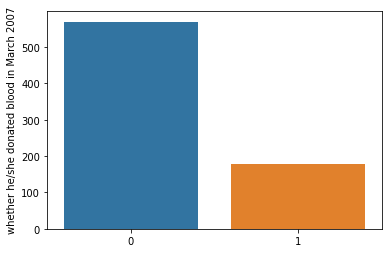

In [47]:
# para este plot utilizaremos a biblioteca seaborn, que é muito útil para gráficos no python
import seaborn as sns
# para plotar a proporção das classes, primeiro contamos os valores da coluna 'target' e transformamos em um frame
aux = pd.DataFrame(dataset['whether he/she donated blood in March 2007'].value_counts())
# usamos o frame criado acima para plot a frequencia de cada classe no dataset
sns.barplot(x=aux.index, y='whether he/she donated blood in March 2007', data=aux)

## Calculo da Diferenca Absoluta

Observando os resultados, podemos ver que os metodos MLP e Arvore de Decisao tem as melhores performances, logo temos que calcular a diferenca absoluta para ver qual dos dois e de fato o melhor

In [ ]:
#Calculo do desvio padrao
import math
Dp = math.sqrt(((0.046356)*(0.046356) + (0.021462)*(0.021462))/2)
#Calculo da media
media = (0.791423 - 0.768721)
#calcula da Diferenca Absoluta
DA = media/Dp
print(DA)
#MLP > Naive Bayes

0.6284934912655427


Conclusao: O MLP tem uma melhor performance do que a Arvore de decisao e o restante dos algoritmos



#***Heart Desease***

O dataset indica quem tem ou nao tem uma doeca cardiaca atraves de dados como dores no peito, colesterol, acucar no sangue e etc. Como resultado é marcado 2 para a para a presenca de uma doenca cardiaca e 1 para o contrario.

## Arvore de Decisao

In [48]:
#Importa as bibliotecas Pandas e Numpy
import pandas as pd
import numpy as np

In [49]:
# na_values = substitui o valor '?' (dado faltante) para Nan
dataset = pd.read_csv('heart.dat', sep=' ',na_values='?',names=['Age','Sex','Chest pain type','Resting blood pressure','Serum cholesterol in mg/dl','Fasting blood sugar ','Resting electrocardiographic results','Maximum heart rate achieved','Exercise induced angina','Oldpeak','The slope of the peak','Number of major vessels','num'])
dataset

,Age,Sex,Chest pain type,Resting blood pressure,Serum cholesterol in mg/dl,Fasting blood sugar,Resting electrocardiographic results,Maximum heart rate achieved,Exercise induced angina,Oldpeak,The slope of the peak,Number of major vessels,num
70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,1
44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,1
56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,1
57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,1


In [50]:

# elimina as linhas com dados faltantes
dataset = dataset.dropna(axis=0)
dataset

,Age,Sex,Chest pain type,Resting blood pressure,Serum cholesterol in mg/dl,Fasting blood sugar,Resting electrocardiographic results,Maximum heart rate achieved,Exercise induced angina,Oldpeak,The slope of the peak,Number of major vessels,num
70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,1
44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,1
56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,1
57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,1


In [51]:
#Separando as variáveis independentes (conjunto X) e a variável dependente y (que neste caso é a coluna 'num')
X = dataset.loc[:, dataset.columns != 'num'] 
y = np.array(dataset.loc[:, dataset.columns == 'num']).ravel()

In [52]:
#Define os parametros do metodo de Arvore de Decisao
parameters= {'criterion':['gini'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150], 'random_state': [56]}

In [53]:
# importa o método do sklearn que separa em conjunto de treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.26, stratify=y, random_state=56)

In [54]:
# importa o GridSearchCV
from sklearn.model_selection import GridSearchCV
# importa a arvore de decisão
from sklearn.tree import DecisionTreeClassifier
# instancia o classificador 
clf = DecisionTreeClassifier()
gs_tree = GridSearchCV(clf,parameters, cv = 10, scoring = 'accuracy')
# o grid search treinará todos os modelos conforme a parametrização acima
gs_tree.fit(X,y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150],
                         'random_state': [56]},
             scoring='accuracy')

In [55]:
# coloca os resultados num Frame para melhor visulização
results = pd.DataFrame(gs_tree.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_random_state,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002421,0.000422,0.001377,0.000321,gini,4,56,"{'criterion': 'gini', 'max_depth': 4, 'random_...",0.703704,0.740741,...,0.814815,0.851852,0.629630,0.629630,0.740741,0.814815,0.777778,0.744444,0.071146,2
1,0.002053,0.000146,0.001230,0.000295,gini,5,56,"{'criterion': 'gini', 'max_depth': 5, 'random_...",0.592593,0.777778,...,0.777778,0.888889,0.592593,0.740741,0.703704,0.777778,0.740741,0.737037,0.085185,3
2,0.001996,0.000017,0.001156,0.000187,gini,6,56,"{'criterion': 'gini', 'max_depth': 6, 'random_...",0.703704,0.703704,...,0.777778,0.888889,0.629630,0.666667,0.703704,0.814815,0.740741,0.744444,0.074903,1
3,0.002078,0.000087,0.001099,0.000028,gini,7,56,"{'criterion': 'gini', 'max_depth': 7, 'random_...",0.666667,0.740741,...,0.740741,0.777778,0.703704,0.592593,0.666667,0.740741,0.777778,0.714815,0.055060,4
4,0.002136,0.000207,0.001094,0.000022,gini,8,56,"{'criterion': 'gini', 'max_depth': 8, 'random_...",0.592593,0.777778,...,0.740741,0.703704,0.666667,0.592593,0.777778,0.703704,0.740741,0.711111,0.071817,5
5,0.002078,0.000062,0.001108,0.000058,gini,9,56,"{'criterion': 'gini', 'max_depth': 9, 'random_...",0.629630,0.777778,...,0.740741,0.777778,0.666667,0.629630,0.666667,0.629630,0.740741,0.707407,0.067179,6
6,0.002225,0.000465,0.001112,0.000054,gini,10,56,"{'criterion': 'gini', 'max_depth': 10, 'random...",0.629630,0.777778,...,0.740741,0.777778,0.666667,0.592593,0.666667,0.629630,0.740741,0.703704,0.072198,7
7,0.002096,0.000139,0.001089,0.000022,gini,11,56,"{'criterion': 'gini', 'max_depth': 11, 'random...",0.629630,0.777778,...,0.740741,0.814815,0.666667,0.555556,0.666667,0.629630,0.740741,0.703704,0.082817,7
8,0.002069,0.000051,0.001114,0.000031,gini,12,56,"{'criterion': 'gini', 'max_depth': 12, 'random...",0.629630,0.777778,...,0.740741,0.814815,0.666667,0.555556,0.666667,0.629630,0.740741,0.703704,0.082817,7
9,0.002051,0.000034,0.001106,0.000044,gini,15,56,"{'criterion': 'gini', 'max_depth': 15, 'random...",0.629630,0.777778,...,0.740741,0.814815,0.666667,0.555556,0.666667,0.629630,0.740741,0.703704,0.082817,7


In [56]:
#criar uma visão para facilitar a visualização dos resultados, e ordenar os resultados conforme os resultados.
view = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
results[view].sort_values(by='rank_test_score')

,params,mean_test_score,std_test_score,rank_test_score
2,"{'criterion': 'gini', 'max_depth': 6, 'random_...",0.744444,0.074903,1
0,"{'criterion': 'gini', 'max_depth': 4, 'random_...",0.744444,0.071146,2
1,"{'criterion': 'gini', 'max_depth': 5, 'random_...",0.737037,0.085185,3
3,"{'criterion': 'gini', 'max_depth': 7, 'random_...",0.714815,0.055060,4
4,"{'criterion': 'gini', 'max_depth': 8, 'random_...",0.711111,0.071817,5
5,"{'criterion': 'gini', 'max_depth': 9, 'random_...",0.707407,0.067179,6
15,"{'criterion': 'gini', 'max_depth': 90, 'random...",0.703704,0.082817,7
14,"{'criterion': 'gini', 'max_depth': 70, 'random...",0.703704,0.082817,7
13,"{'criterion': 'gini', 'max_depth': 50, 'random...",0.703704,0.082817,7
12,"{'criterion': 'gini', 'max_depth': 40, 'random...",0.703704,0.082817,7


## Multilayer-Perceptron (redes neurais)

In [ ]:
#Importa as bibliotecas Pandas e Numpy
import pandas as pd
import numpy as np

In [ ]:
# na_values = substitui o valor '?' (dado faltante) para Nan
dataset = pd.read_csv('heart.dat', sep=' ', na_values='?',names=['Age','Sex','Chest pain type','Resting blood pressure','Serum cholesterol in mg/dl','Fasting blood sugar ','Resting electrocardiographic results','Maximum heart rate achieved','Exercise induced angina','Oldpeak','The slope of the peak','Number of major vessels','num'])

dataset

,Age,Sex,Chest pain type,Resting blood pressure,Serum cholesterol in mg/dl,Fasting blood sugar,Resting electrocardiographic results,Maximum heart rate achieved,Exercise induced angina,Oldpeak,The slope of the peak,Number of major vessels,num
70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,1
44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,1
56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,1
57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,1


In [ ]:

# elimina as linhas com dados faltantes
dataset = dataset.dropna(axis=0)
dataset

,Age,Sex,Chest pain type,Resting blood pressure,Serum cholesterol in mg/dl,Fasting blood sugar,Resting electrocardiographic results,Maximum heart rate achieved,Exercise induced angina,Oldpeak,The slope of the peak,Number of major vessels,num
70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,1
44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,1
56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,1
57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,1


In [ ]:
#Separando as variáveis independentes (conjunto X) e a variável dependente y (que neste caso é a coluna 'num')
X = dataset.loc[:, dataset.columns != 'num'] 
y = np.array(dataset.loc[:, dataset.columns == 'num']).ravel()

In [ ]:
# importa o algoritmo de classificação Multilayer-Perceptron (redes neurais)
from sklearn.neural_network import MLPClassifier
# importa o GridSearchCV
from sklearn.model_selection import GridSearchCV

# na MLP um parâmetro a ser testado é a quantidade de neurônios na camada escondida, 
# onde utilzamos uma tupla para representar a camada escondida.
# Por exemplo:
# (5) - Cinco neurônios e uma camada escondida
# (8, 5) - Oito neurônios na primeira camada escondida e cinco neurônios na segunda camada escondida.
# Interessante nesse projeto utilizar no máximo duas camadas para verificação 
# Quanto mais camadas e neurônios maior o tempo de processamento do algoritmo
parameters = {'hidden_layer_sizes' : [(5), (8), (15), (5, 3), (8, 5), (10, 5)],
              'max_iter' : [3000], 'random_state' : [56]}

# define o algoritmo de classificação que será usado
mlp = MLPClassifier()
gs_mlp = GridSearchCV(mlp, parameters, cv=10, scoring='accuracy')
# o grid search treinará todos os modelos conforme a parametrização acima
gs_mlp.fit(X, y)

GridSearchCV(cv=10, estimator=MLPClassifier(),
             param_grid={'hidden_layer_sizes': [5, 8, 15, (5, 3), (8, 5),
                                                (10, 5)],
                         'max_iter': [3000], 'random_state': [56]},
             scoring='accuracy')

In [ ]:
#criar uma visão para facilitar a visualização dos resultados, e ordenar os resultados conforme os resultados.
view = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
results = pd.DataFrame(gs_mlp.cv_results_)
results[view].sort_values(by='rank_test_score')

,params,mean_test_score,std_test_score,rank_test_score
2,"{'hidden_layer_sizes': 15, 'max_iter': 3000, '...",0.829630,4.444444e-02,1
3,"{'hidden_layer_sizes': (5, 3), 'max_iter': 300...",0.818519,4.520947e-02,2
5,"{'hidden_layer_sizes': (10, 5), 'max_iter': 30...",0.814815,8.114408e-02,3
4,"{'hidden_layer_sizes': (8, 5), 'max_iter': 300...",0.770370,7.370277e-02,4
1,"{'hidden_layer_sizes': 8, 'max_iter': 3000, 'r...",0.555556,0.000000e+00,5
0,"{'hidden_layer_sizes': 5, 'max_iter': 3000, 'r...",0.444444,5.551115e-17,6


## Naive Bayes

In [ ]:
#Importa as bibliotecas Pandas e Numpy
import pandas as pd
import numpy as np

In [ ]:
# na_values = substitui o valor '?' (dado faltante) para Nan
dataset = pd.read_csv('heart.dat', sep=' ', na_values='?',names=['Age','Sex','Chest pain type','Resting blood pressure','Serum cholesterol in mg/dl','Fasting blood sugar ','Resting electrocardiographic results','Maximum heart rate achieved','Exercise induced angina','Oldpeak','The slope of the peak','Number of major vessels','num'])

dataset

,Age,Sex,Chest pain type,Resting blood pressure,Serum cholesterol in mg/dl,Fasting blood sugar,Resting electrocardiographic results,Maximum heart rate achieved,Exercise induced angina,Oldpeak,The slope of the peak,Number of major vessels,num
70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,1
44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,1
56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,1
57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,1


In [ ]:

# elimina as linhas com dados faltantes
dataset = dataset.dropna(axis=0)
dataset

,Age,Sex,Chest pain type,Resting blood pressure,Serum cholesterol in mg/dl,Fasting blood sugar,Resting electrocardiographic results,Maximum heart rate achieved,Exercise induced angina,Oldpeak,The slope of the peak,Number of major vessels,num
70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,1
44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,1
56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,1
57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,1


In [ ]:
#Separando as variáveis independentes (conjunto X) e a variável dependente y (que neste caso é a coluna 'num')
X = dataset.loc[:, dataset.columns != 'num'] 
y = np.array(dataset.loc[:, dataset.columns == 'num']).ravel()

In [ ]:
#Define os parametros do metodo Naive Bayes
param = {'var_smoothing': np.logspace(0,-9, num=100)}

In [ ]:
# importa o método do sklearn que separa em conjunto de treino e teste
from sklearn.model_selection import train_test_split
# importa o algoritmo Naive Bayes 
from sklearn.naive_bayes import GaussianNB
# importa o GridSearchCV
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=56)
# instancia o classificador
gnb = GaussianNB()
gs_NB = GridSearchCV(gnb, param, cv = 10, scoring = 'accuracy')
# o grid search treinará todos os modelos conforme a parametrização acima
gs_NB.fit(X,y)

GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy')

In [ ]:
#criar uma visão para facilitar a visualização dos resultados, e ordenar os resultados conforme os resultados.
view = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
results = pd.DataFrame(gs_NB.cv_results_)
results[view].sort_values(by='rank_test_score')

,params,mean_test_score,std_test_score,rank_test_score
49,{'var_smoothing': 3.511191734215127e-05},0.859259,0.049135,1
74,{'var_smoothing': 1.873817422860383e-07},0.859259,0.043192,1
73,{'var_smoothing': 2.310129700083158e-07},0.859259,0.043192,1
72,{'var_smoothing': 2.848035868435799e-07},0.859259,0.043192,1
71,{'var_smoothing': 3.5111917342151277e-07},0.859259,0.043192,1
...,...,...,...,...
3,{'var_smoothing': 0.533669923120631},0.648148,0.074536,96
8,{'var_smoothing': 0.1873817422860384},0.644444,0.081481,97
7,{'var_smoothing': 0.23101297000831597},0.644444,0.072577,97
2,{'var_smoothing': 0.657933224657568},0.644444,0.066667,97


## K Neighbors

In [ ]:
#Importa as bibliotecas Pandas e Numpy
import pandas as pd
import numpy as np

In [ ]:
# na_values = substitui o valor '?' (dado faltante) para Nan
dataset = pd.read_csv('heart.dat', sep=' ', na_values='?',names=['Age','Sex','Chest pain type','Resting blood pressure','Serum cholesterol in mg/dl','Fasting blood sugar ','Resting electrocardiographic results','Maximum heart rate achieved','Exercise induced angina','Oldpeak','The slope of the peak','Number of major vessels','num'])
dataset

,Age,Sex,Chest pain type,Resting blood pressure,Serum cholesterol in mg/dl,Fasting blood sugar,Resting electrocardiographic results,Maximum heart rate achieved,Exercise induced angina,Oldpeak,The slope of the peak,Number of major vessels,num
70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,1
44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,1
56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,1
57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,1


In [ ]:

# elimina as linhas com dados faltantes
dataset = dataset.dropna(axis=0)
dataset

,Age,Sex,Chest pain type,Resting blood pressure,Serum cholesterol in mg/dl,Fasting blood sugar,Resting electrocardiographic results,Maximum heart rate achieved,Exercise induced angina,Oldpeak,The slope of the peak,Number of major vessels,num
70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,1
44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,1
56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,1
57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,1


In [ ]:
#Separando as variáveis independentes (conjunto X) e a variável dependente y (que neste caso é a coluna 'num')
X = dataset.loc[:, dataset.columns != 'num'] 
y = np.array(dataset.loc[:, dataset.columns == 'num']).ravel()

In [ ]:
# importa o algoritmo de classifcaçaõ k-vizinhos
from sklearn.neighbors import KNeighborsClassifier
# importa o GridSearchCV
from sklearn.model_selection import GridSearchCV

# no grid coloca os hiperparâmetros do algoritmo que serão testados (dicionário)
# testará o valor de k com os seguintes valores e o hiperparâmetros weights com os valores 'uniform' e 'distance'
parameters = {'n_neighbors' : [1, 3, 5, 7, 9, 11, 13], 'weights' : ['uniform', 'distance']}

# define o algoritmo de classificação que será usado
knn = KNeighborsClassifier()
''' configura o GridSearch com o algoritmo de classificação = knn (instanciado), os parâmetros testados serão os 
    definidos em parameters, usa cross-validation = 10 e a medida de avaliação é a acurácia.'''  
gs = GridSearchCV(knn, parameters, cv=10, scoring='accuracy')
# o grid search treinará todos os modelos conforme a parametrização acima
gs.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
# coloca os resultados num Frame para melhor visulização
results = pd.DataFrame(gs.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002531,0.000637,0.003126,0.000243,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",0.481481,0.703704,0.666667,0.407407,0.666667,0.592593,0.666667,0.777778,0.592593,0.629630,0.618519,0.102171,13
1,0.002320,0.000238,0.002646,0.000467,1,distance,"{'n_neighbors': 1, 'weights': 'distance'}",0.481481,0.703704,0.666667,0.407407,0.666667,0.592593,0.666667,0.777778,0.592593,0.629630,0.618519,0.102171,13
2,0.002906,0.000437,0.003616,0.000324,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.555556,0.740741,0.629630,0.481481,0.703704,0.592593,0.666667,0.629630,0.703704,0.555556,0.625926,0.076712,12
3,0.002556,0.000239,0.002735,0.000598,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.555556,0.740741,0.666667,0.481481,0.740741,0.555556,0.703704,0.629630,0.740741,0.592593,0.640741,0.087724,10
4,0.002995,0.000915,0.003836,0.000654,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.629630,0.740741,0.592593,0.629630,0.666667,0.666667,0.666667,0.629630,0.814815,0.555556,0.659259,0.069881,3
5,0.003062,0.000943,0.003955,0.003154,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.629630,0.703704,0.592593,0.592593,0.666667,0.592593,0.629630,0.629630,0.814815,0.555556,0.640741,0.070370,11
6,0.002536,0.000294,0.003509,0.000420,7,uniform,"{'n_neighbors': 7, 'weights': 'uniform'}",0.592593,0.740741,0.592593,0.592593,0.666667,0.629630,0.592593,0.703704,0.777778,0.592593,0.648148,0.066769,7
7,0.002272,0.000149,0.002487,0.000315,7,distance,"{'n_neighbors': 7, 'weights': 'distance'}",0.629630,0.703704,0.592593,0.555556,0.666667,0.592593,0.629630,0.703704,0.814815,0.592593,0.648148,0.072672,7
8,0.002974,0.000681,0.003515,0.000282,9,uniform,"{'n_neighbors': 9, 'weights': 'uniform'}",0.592593,0.703704,0.666667,0.629630,0.703704,0.666667,0.629630,0.740741,0.703704,0.629630,0.666667,0.043823,1
9,0.002435,0.000409,0.002548,0.000300,9,distance,"{'n_neighbors': 9, 'weights': 'distance'}",0.629630,0.666667,0.666667,0.555556,0.703704,0.629630,0.555556,0.740741,0.740741,0.629630,0.651852,0.062416,5


In [ ]:
#criar uma visão para facilitar a visualização dos resultados, e ordenar os resultados conforme os resultados.
view = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
results[view].sort_values(by='rank_test_score')

,params,mean_test_score,std_test_score,rank_test_score
8,"{'n_neighbors': 9, 'weights': 'uniform'}",0.666667,0.043823,1
10,"{'n_neighbors': 11, 'weights': 'uniform'}",0.662963,0.060745,2
4,"{'n_neighbors': 5, 'weights': 'uniform'}",0.659259,0.069881,3
12,"{'n_neighbors': 13, 'weights': 'uniform'}",0.659259,0.079089,3
9,"{'n_neighbors': 9, 'weights': 'distance'}",0.651852,0.062416,5
11,"{'n_neighbors': 11, 'weights': 'distance'}",0.651852,0.062416,5
6,"{'n_neighbors': 7, 'weights': 'uniform'}",0.648148,0.066769,7
7,"{'n_neighbors': 7, 'weights': 'distance'}",0.648148,0.072672,7
13,"{'n_neighbors': 13, 'weights': 'distance'}",0.644444,0.066667,9
3,"{'n_neighbors': 3, 'weights': 'distance'}",0.640741,0.087724,10


##Grafico de balanceamento

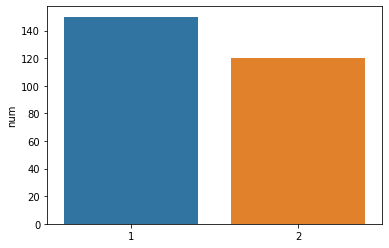

In [57]:
# para este plot utilizaremos a biblioteca seaborn, que é muito útil para gráficos no python
import seaborn as sns
# para plotar a proporção das classes, primeiro contamos os valores da coluna 'target' e transformamos em um frame
aux = pd.DataFrame(dataset['num'].value_counts())
# usamos o frame criado acima para plot a frequencia de cada classe no dataset
sns.barplot(x=aux.index, y='num', data=aux)

## Calculo da Diferenca Absoluta

Observando os resultados, podemos ver que os metodos MLP e Arvore de Decisao tem as melhores performances, logo temos que calcular a diferenca absoluta para ver qual dos dois e de fato o melhor

In [ ]:
#Calculo do desvio padrao
import math
Dp = math.sqrt(((4.444444e-02)*(4.444444e-02) + (0.049135)*(0.049135))/2)
#Calculo da media
media = (0.829630 - 0.859259)
#calcula da Diferenca Absoluta
DA = media/Dp
print(DA)
#MLP < Naive Bayes

-0.632443409811199


Conclusao: O Naive Bayes tem uma melhor performance do que o MLP e o restante dos algoritmos.



#***Australian credit approval***

O dataset indica se uma pessoa esta ou nao aprovada para fazer um emprestimo na Australia. É mostrado 1 caso a pessoa esteja aprovada e 2 caso contrario.

## Arvore de Decisao

In [58]:
#Importa as bibliotecas Pandas e Numpy
import pandas as pd
import numpy as np

In [59]:
# na_values = substitui o valor '?' (dado faltante) para Nan
dataset = pd.read_csv('australian.dat', sep=' ', na_values='?',names=['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13'])
dataset

A1  A2  A3  A4     A5  A6  A7  A8  A9  A10  A11   A12  A13
1 22.08  11.460   2   4   4  1.585   0   0   0   1    2  100  1213    0
0 22.67   7.000   2   8   4  0.165   0   0   0   0    2  160     1    0
  29.58   1.750   1   4   4  1.250   0   0   0   1    2  280     1    0
  21.67  11.500   1   5   3  0.000   1   1  11   1    2    0     1    1
1 20.17   8.170   2   6   4  1.960   1   1  14   0    2   60   159    1
...         ...  ..  ..  ..    ...  ..  ..  ..  ..  ...  ...   ...  ...
  31.57  10.500   2  14   4  6.500   1   0   0   0    2    0     1    1
  20.67   0.415   2   8   4  0.125   0   0   0   0    2    0    45    0
0 18.83   9.540   2   6   4  0.085   1   0   0   0    2  100     1    1
  27.42  14.500   2  14   8  3.085   1   1   1   0    2  120    12    1
1 41.00   0.040   2  10   4  0.040   0   1   1   0    1  560     1    1

[690 rows x 13 columns]

In [60]:

# elimina as linhas com dados faltantes
dataset = dataset.dropna(axis=0)
dataset

A1  A2  A3  A4     A5  A6  A7  A8  A9  A10  A11   A12  A13
1 22.08  11.460   2   4   4  1.585   0   0   0   1    2  100  1213    0
0 22.67   7.000   2   8   4  0.165   0   0   0   0    2  160     1    0
  29.58   1.750   1   4   4  1.250   0   0   0   1    2  280     1    0
  21.67  11.500   1   5   3  0.000   1   1  11   1    2    0     1    1
1 20.17   8.170   2   6   4  1.960   1   1  14   0    2   60   159    1
...         ...  ..  ..  ..    ...  ..  ..  ..  ..  ...  ...   ...  ...
  31.57  10.500   2  14   4  6.500   1   0   0   0    2    0     1    1
  20.67   0.415   2   8   4  0.125   0   0   0   0    2    0    45    0
0 18.83   9.540   2   6   4  0.085   1   0   0   0    2  100     1    1
  27.42  14.500   2  14   8  3.085   1   1   1   0    2  120    12    1
1 41.00   0.040   2  10   4  0.040   0   1   1   0    1  560     1    1

[690 rows x 13 columns]

In [61]:
#Separando as variáveis independentes (conjunto X) e a variável dependente y (que neste caso é a coluna 'A13')
X = dataset.loc[:, dataset.columns != 'A13'] 
y = np.array(dataset.loc[:, dataset.columns == 'A13']).ravel()

In [62]:
#Define os parametros do metodo de Arvore de Decisao
parameters= {'criterion':['gini'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150], 'random_state': [56]}

In [63]:
# importa o método do sklearn que separa em conjunto de treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.26, stratify=y, random_state=56)

In [64]:
# importa o GridSearchCV
from sklearn.model_selection import GridSearchCV
# importa a arvore de decisão
from sklearn.tree import DecisionTreeClassifier
# instancia o classificador 
clf = DecisionTreeClassifier()
gs_tree = GridSearchCV(clf,parameters, cv = 10, scoring = 'accuracy')
# o grid search treinará todos os modelos conforme a parametrização acima
gs_tree.fit(X,y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150],
                         'random_state': [56]},
             scoring='accuracy')

In [65]:
# coloca os resultados num Frame para melhor visulização
results = pd.DataFrame(gs_tree.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_random_state,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002704,0.000158,0.001190,0.000035,gini,4,56,"{'criterion': 'gini', 'max_depth': 4, 'random_...",0.884058,0.927536,...,0.840580,0.855072,0.913043,0.753623,0.840580,0.840580,0.768116,0.837681,0.059332,1
1,0.003288,0.000541,0.001426,0.000355,gini,5,56,"{'criterion': 'gini', 'max_depth': 5, 'random_...",0.884058,0.898551,...,0.855072,0.913043,0.898551,0.753623,0.797101,0.840580,0.811594,0.837681,0.061419,1
2,0.003039,0.000042,0.001175,0.000019,gini,6,56,"{'criterion': 'gini', 'max_depth': 6, 'random_...",0.913043,0.913043,...,0.840580,0.898551,0.811594,0.724638,0.811594,0.884058,0.797101,0.836232,0.061505,3
3,0.003185,0.000115,0.001184,0.000024,gini,7,56,"{'criterion': 'gini', 'max_depth': 7, 'random_...",0.898551,0.855072,...,0.826087,0.855072,0.797101,0.739130,0.811594,0.840580,0.739130,0.811594,0.051444,4
4,0.003196,0.000057,0.001173,0.000018,gini,8,56,"{'criterion': 'gini', 'max_depth': 8, 'random_...",0.855072,0.884058,...,0.826087,0.884058,0.782609,0.695652,0.811594,0.898551,0.724638,0.805797,0.074239,7
5,0.003371,0.000301,0.001221,0.000094,gini,9,56,"{'criterion': 'gini', 'max_depth': 9, 'random_...",0.869565,0.869565,...,0.811594,0.884058,0.797101,0.739130,0.768116,0.884058,0.739130,0.807246,0.063189,6
6,0.003351,0.000117,0.001423,0.000660,gini,10,56,"{'criterion': 'gini', 'max_depth': 10, 'random...",0.869565,0.855072,...,0.826087,0.855072,0.840580,0.666667,0.811594,0.898551,0.739130,0.810145,0.068730,5
7,0.003312,0.000088,0.001212,0.000043,gini,11,56,"{'criterion': 'gini', 'max_depth': 11, 'random...",0.869565,0.840580,...,0.826087,0.811594,0.811594,0.666667,0.797101,0.898551,0.739130,0.797101,0.068285,9
8,0.003298,0.000073,0.001212,0.000053,gini,12,56,"{'criterion': 'gini', 'max_depth': 12, 'random...",0.869565,0.840580,...,0.811594,0.797101,0.826087,0.666667,0.797101,0.898551,0.739130,0.798551,0.064959,8
9,0.003385,0.000099,0.001237,0.000046,gini,15,56,"{'criterion': 'gini', 'max_depth': 15, 'random...",0.869565,0.840580,...,0.811594,0.797101,0.826087,0.666667,0.797101,0.898551,0.739130,0.797101,0.066414,9


In [66]:
#criar uma visão para facilitar a visualização dos resultados, e ordenar os resultados conforme os resultados.
view = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
results[view].sort_values(by='rank_test_score')

,params,mean_test_score,std_test_score,rank_test_score
0,"{'criterion': 'gini', 'max_depth': 4, 'random_...",0.837681,0.059332,1
1,"{'criterion': 'gini', 'max_depth': 5, 'random_...",0.837681,0.061419,1
2,"{'criterion': 'gini', 'max_depth': 6, 'random_...",0.836232,0.061505,3
3,"{'criterion': 'gini', 'max_depth': 7, 'random_...",0.811594,0.051444,4
6,"{'criterion': 'gini', 'max_depth': 10, 'random...",0.810145,0.068730,5
5,"{'criterion': 'gini', 'max_depth': 9, 'random_...",0.807246,0.063189,6
4,"{'criterion': 'gini', 'max_depth': 8, 'random_...",0.805797,0.074239,7
8,"{'criterion': 'gini', 'max_depth': 12, 'random...",0.798551,0.064959,8
16,"{'criterion': 'gini', 'max_depth': 120, 'rando...",0.797101,0.066414,9
9,"{'criterion': 'gini', 'max_depth': 15, 'random...",0.797101,0.066414,9


## Multilayer-Perceptron (redes neurais)

In [ ]:
#Importa as bibliotecas Pandas e Numpy
import pandas as pd
import numpy as np

In [ ]:
# na_values = substitui o valor '?' (dado faltante) para Nan
dataset = pd.read_csv('australian.dat', sep=' ', na_values='?',names=['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13'])
dataset

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,,,,,,,,,,,,,,
1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1


In [ ]:

# elimina as linhas com dados faltantes
dataset = dataset.dropna(axis=0)
dataset

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,,,,,,,,,,,,,,
1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1


In [ ]:
#Separando as variáveis independentes (conjunto X) e a variável dependente y (que neste caso é a coluna 'A13')
X = dataset.loc[:, dataset.columns != 'A13'] 
y = np.array(dataset.loc[:, dataset.columns == 'A13']).ravel()

In [ ]:
# importa o algoritmo de classificação Multilayer-Perceptron (redes neurais)
from sklearn.neural_network import MLPClassifier
# importa o GridSearchCV
from sklearn.model_selection import GridSearchCV

# na MLP um parâmetro a ser testado é a quantidade de neurônios na camada escondida, 
# onde utilzamos uma tupla para representar a camada escondida.
# Por exemplo:
# (5) - Cinco neurônios e uma camada escondida
# (8, 5) - Oito neurônios na primeira camada escondida e cinco neurônios na segunda camada escondida.
# Interessante nesse projeto utilizar no máximo duas camadas para verificação 
# Quanto mais camadas e neurônios maior o tempo de processamento do algoritmo
parameters = {'hidden_layer_sizes' : [(5), (8), (15), (5, 3), (8, 5), (10, 5)],
              'max_iter' : [3000], 'random_state' : [56]}

# define o algoritmo de classificação que será usado
mlp = MLPClassifier()
gs_mlp = GridSearchCV(mlp, parameters, cv=10, scoring='accuracy')
# o grid search treinará todos os modelos conforme a parametrização acima
gs_mlp.fit(X, y)

GridSearchCV(cv=10, estimator=MLPClassifier(),
             param_grid={'hidden_layer_sizes': [5, 8, 15, (5, 3), (8, 5),
                                                (10, 5)],
                         'max_iter': [3000], 'random_state': [56]},
             scoring='accuracy')

In [ ]:
#criar uma visão para facilitar a visualização dos resultados, e ordenar os resultados conforme os resultados.
view = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
results = pd.DataFrame(gs_mlp.cv_results_)
results[view].sort_values(by='rank_test_score')

,params,mean_test_score,std_test_score,rank_test_score
5,"{'hidden_layer_sizes': (10, 5), 'max_iter': 30...",0.721739,0.065715,1
2,"{'hidden_layer_sizes': 15, 'max_iter': 3000, '...",0.717391,0.064244,2
1,"{'hidden_layer_sizes': 8, 'max_iter': 3000, 'r...",0.704348,0.062235,3
4,"{'hidden_layer_sizes': (8, 5), 'max_iter': 300...",0.695652,0.056130,4
3,"{'hidden_layer_sizes': (5, 3), 'max_iter': 300...",0.665217,0.066871,5
0,"{'hidden_layer_sizes': 5, 'max_iter': 3000, 'r...",0.655072,0.066667,6


## Naive Bayes

In [ ]:
#Importa as bibliotecas Pandas e Numpy
import pandas as pd
import numpy as np

In [ ]:
# na_values = substitui o valor '?' (dado faltante) para Nan
dataset = pd.read_csv('australian.dat', sep=' ', na_values='?',names=['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13'])
dataset

A1  A2  A3  A4     A5  A6  A7  A8  A9  A10  A11   A12  A13
1 22.08  11.460   2   4   4  1.585   0   0   0   1    2  100  1213    0
0 22.67   7.000   2   8   4  0.165   0   0   0   0    2  160     1    0
  29.58   1.750   1   4   4  1.250   0   0   0   1    2  280     1    0
  21.67  11.500   1   5   3  0.000   1   1  11   1    2    0     1    1
1 20.17   8.170   2   6   4  1.960   1   1  14   0    2   60   159    1
...         ...  ..  ..  ..    ...  ..  ..  ..  ..  ...  ...   ...  ...
  31.57  10.500   2  14   4  6.500   1   0   0   0    2    0     1    1
  20.67   0.415   2   8   4  0.125   0   0   0   0    2    0    45    0
0 18.83   9.540   2   6   4  0.085   1   0   0   0    2  100     1    1
  27.42  14.500   2  14   8  3.085   1   1   1   0    2  120    12    1
1 41.00   0.040   2  10   4  0.040   0   1   1   0    1  560     1    1

[690 rows x 13 columns]

In [ ]:

# elimina as linhas com dados faltantes
dataset = dataset.dropna(axis=0)
dataset

A1  A2  A3  A4     A5  A6  A7  A8  A9  A10  A11   A12  A13
1 22.08  11.460   2   4   4  1.585   0   0   0   1    2  100  1213    0
0 22.67   7.000   2   8   4  0.165   0   0   0   0    2  160     1    0
  29.58   1.750   1   4   4  1.250   0   0   0   1    2  280     1    0
  21.67  11.500   1   5   3  0.000   1   1  11   1    2    0     1    1
1 20.17   8.170   2   6   4  1.960   1   1  14   0    2   60   159    1
...         ...  ..  ..  ..    ...  ..  ..  ..  ..  ...  ...   ...  ...
  31.57  10.500   2  14   4  6.500   1   0   0   0    2    0     1    1
  20.67   0.415   2   8   4  0.125   0   0   0   0    2    0    45    0
0 18.83   9.540   2   6   4  0.085   1   0   0   0    2  100     1    1
  27.42  14.500   2  14   8  3.085   1   1   1   0    2  120    12    1
1 41.00   0.040   2  10   4  0.040   0   1   1   0    1  560     1    1

[690 rows x 13 columns]

In [ ]:
#Separando as variáveis independentes (conjunto X) e a variável dependente y (que neste caso é a coluna 'A13')
X = dataset.loc[:, dataset.columns != 'A13'] 
y = np.array(dataset.loc[:, dataset.columns == 'A13']).ravel()

In [ ]:
#Define os parametros do metodo Naive Bayes
param = {'var_smoothing': np.logspace(0,-9, num=100)}

In [ ]:
# importa o método do sklearn que separa em conjunto de treino e teste
from sklearn.model_selection import train_test_split
# importa o algoritmo Naive Bayes 
from sklearn.naive_bayes import GaussianNB
# importa o GridSearchCV
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=56)
# instancia o classificador
gnb = GaussianNB()
gs_NB = GridSearchCV(gnb, param, cv = 10, scoring = 'accuracy')
# o grid search treinará todos os modelos conforme a parametrização acima
gs_NB.fit(X,y)

GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy')

In [ ]:
#criar uma visão para facilitar a visualização dos resultados, e ordenar os resultados conforme os resultados.
view = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
results = pd.DataFrame(gs_NB.cv_results_)
results[view].sort_values(by='rank_test_score')

,params,mean_test_score,std_test_score,rank_test_score
99,{'var_smoothing': 1e-09},0.798551,0.041222,1
98,{'var_smoothing': 1.2328467394420635e-09},0.794203,0.040889,2
97,{'var_smoothing': 1.519911082952933e-09},0.792754,0.043017,3
96,{'var_smoothing': 1.873817422860387e-09},0.788406,0.044054,4
95,{'var_smoothing': 2.310129700083158e-09},0.784058,0.044646,5
...,...,...,...,...
4,{'var_smoothing': 0.43287612810830584},0.588406,0.026087,95
3,{'var_smoothing': 0.533669923120631},0.585507,0.025269,97
2,{'var_smoothing': 0.657933224657568},0.585507,0.025269,97
1,{'var_smoothing': 0.8111308307896871},0.582609,0.026566,99


## K Neighbors

In [ ]:
#Importa as bibliotecas Pandas e Numpy
import pandas as pd
import numpy as np

In [ ]:
# na_values = substitui o valor '?' (dado faltante) para Nan
dataset = pd.read_csv('australian.dat', sep=' ',  index_col=0, na_values='?',header=None)
dataset

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,,,,,,,,,,,,,,
1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1


In [ ]:

# elimina as linhas com dados faltantes
dataset = dataset.dropna(axis=0)
dataset

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,,,,,,,,,,,,,,
1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1


In [ ]:
#Separando as variáveis independentes (conjunto X) e a variável dependente y (que neste caso é a coluna 'status')
X = dataset.loc[:, dataset.columns != 14] 
y = np.array(dataset.loc[:, dataset.columns == 14]).ravel()

In [ ]:
# importa o algoritmo de classifcaçaõ k-vizinhos
from sklearn.neighbors import KNeighborsClassifier
# importa o GridSearchCV
from sklearn.model_selection import GridSearchCV

# no grid coloca os hiperparâmetros do algoritmo que serão testados (dicionário)
# testará o valor de k com os seguintes valores e o hiperparâmetros weights com os valores 'uniform' e 'distance'
parameters = {'n_neighbors' : [1, 3, 5, 7, 9, 11, 13], 'weights' : ['uniform', 'distance']}

# define o algoritmo de classificação que será usado
knn = KNeighborsClassifier()
''' configura o GridSearch com o algoritmo de classificação = knn (instanciado), os parâmetros testados serão os 
    definidos em parameters, usa cross-validation = 10 e a medida de avaliação é a acurácia.'''  
gs = GridSearchCV(knn, parameters, cv=10, scoring='accuracy')
# o grid search treinará todos os modelos conforme a parametrização acima
gs.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
# coloca os resultados num Frame para melhor visulização
results = pd.DataFrame(gs.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007130,0.004869,0.011853,0.008913,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",0.666667,0.666667,0.695652,0.637681,0.536232,0.681159,0.637681,0.768116,0.724638,0.536232,0.655072,0.070047,13
1,0.007831,0.005296,0.005144,0.002322,1,distance,"{'n_neighbors': 1, 'weights': 'distance'}",0.666667,0.666667,0.695652,0.637681,0.536232,0.681159,0.637681,0.768116,0.724638,0.536232,0.655072,0.070047,13
2,0.005346,0.001404,0.012076,0.006689,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.666667,0.652174,0.739130,0.681159,0.710145,0.579710,0.637681,0.739130,0.681159,0.565217,0.665217,0.056298,12
3,0.005735,0.002147,0.006252,0.002753,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.666667,0.637681,0.753623,0.666667,0.710145,0.594203,0.637681,0.724638,0.724638,0.550725,0.666667,0.060454,11
4,0.005775,0.002666,0.008741,0.003574,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.681159,0.710145,0.695652,0.681159,0.710145,0.666667,0.695652,0.739130,0.681159,0.623188,0.688406,0.029166,7
5,0.005265,0.001904,0.005638,0.002400,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.637681,0.695652,0.768116,0.695652,0.681159,0.637681,0.681159,0.753623,0.681159,0.623188,0.685507,0.044928,9
6,0.007749,0.005107,0.015772,0.012171,7,uniform,"{'n_neighbors': 7, 'weights': 'uniform'}",0.695652,0.681159,0.753623,0.681159,0.753623,0.681159,0.695652,0.782609,0.666667,0.608696,0.700000,0.048089,2
7,0.004766,0.001077,0.005007,0.002027,7,distance,"{'n_neighbors': 7, 'weights': 'distance'}",0.710145,0.681159,0.782609,0.652174,0.739130,0.652174,0.695652,0.797101,0.681159,0.594203,0.698551,0.058620,3
8,0.007063,0.004880,0.009187,0.003489,9,uniform,"{'n_neighbors': 9, 'weights': 'uniform'}",0.695652,0.724638,0.724638,0.739130,0.681159,0.637681,0.623188,0.797101,0.652174,0.623188,0.689855,0.054304,6
9,0.005193,0.002047,0.004549,0.000270,9,distance,"{'n_neighbors': 9, 'weights': 'distance'}",0.710145,0.724638,0.724638,0.724638,0.681159,0.637681,0.637681,0.782609,0.666667,0.594203,0.688406,0.052754,7


In [ ]:
#criar uma visão para facilitar a visualização dos resultados, e ordenar os resultados conforme os resultados.
view = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
results[view].sort_values(by='rank_test_score')

,params,mean_test_score,std_test_score,rank_test_score
13,"{'n_neighbors': 13, 'weights': 'distance'}",0.700000,0.049382,1
6,"{'n_neighbors': 7, 'weights': 'uniform'}",0.700000,0.048089,2
7,"{'n_neighbors': 7, 'weights': 'distance'}",0.698551,0.058620,3
10,"{'n_neighbors': 11, 'weights': 'uniform'}",0.695652,0.058691,4
11,"{'n_neighbors': 11, 'weights': 'distance'}",0.694203,0.052435,5
8,"{'n_neighbors': 9, 'weights': 'uniform'}",0.689855,0.054304,6
4,"{'n_neighbors': 5, 'weights': 'uniform'}",0.688406,0.029166,7
9,"{'n_neighbors': 9, 'weights': 'distance'}",0.688406,0.052754,7
5,"{'n_neighbors': 5, 'weights': 'distance'}",0.685507,0.044928,9
12,"{'n_neighbors': 13, 'weights': 'uniform'}",0.671014,0.052675,10


##Grafico de balanceamento

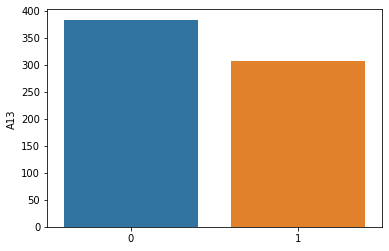

In [67]:
# para este plot utilizaremos a biblioteca seaborn, que é muito útil para gráficos no python
import seaborn as sns
# para plotar a proporção das classes, primeiro contamos os valores da coluna 'target' e transformamos em um frame
aux = pd.DataFrame(dataset['A13'].value_counts())
# usamos o frame criado acima para plot a frequencia de cada classe no dataset
sns.barplot(x=aux.index, y='A13', data=aux)

## Calculo da Diferenca Absoluta

Observando os resultados, podemos ver que os metodos Arvore de Decisao e Naive Bayes tem as melhores performances, logo temos que calcular a diferenca absoluta para ver qual dos dois e de fato o melhor.

In [ ]:
#Calculo do desvio padrao
import math
Dp = math.sqrt(((0.059473)*(0.059473) + (0.041222	)*(0.041222	))/2)
#Calculo da media
media = (0.834783 - 0.798551)
#calcula da Diferenca Absoluta
DA = media/Dp
print(DA)
#NB < Tree

0.7081013429031139


Conclusao: A Arvore de Decisao tem uma melhor performance do que a Arvore de decisao e o restante dos algoritmos.



#***Grades***

O dataset assimila as notas dos alunos com as suas informacoes pessoais como notas em semestres passados, horas de estudos e tambem informacoes de seus pais como o trabalho deles. Para um aluno que falhou e designado o numero 0 e os demais numeros ate 7 sao designadas notas de acordo com o sistema americano

## Arvore de Decisao

In [68]:
#Importa as bibliotecas Pandas e Numpy
import pandas as pd
import numpy as np

In [69]:
# na_values = substitui o valor '?' (dado faltante) para Nan
dataset = pd.read_csv('DATA.csv', sep=';',  index_col=0, na_values='?')
dataset

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
STUDENT ID,,,,,,,,,,,,,,,,,,,,,
STUDENT1,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,1,2,1,1,1,1
STUDENT2,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,3,2,2,3,1,1
STUDENT3,2,2,2,3,2,2,2,2,4,2,...,1,1,2,2,1,1,2,2,1,1
STUDENT4,1,1,1,3,1,2,1,2,1,2,...,1,2,3,2,2,1,3,2,1,1
STUDENT5,2,2,1,3,2,2,1,3,1,4,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
STUDENT141,2,1,2,3,1,1,2,1,1,2,...,1,1,2,1,2,1,3,3,9,5
STUDENT142,1,1,2,4,2,2,2,1,4,2,...,1,1,3,2,2,1,5,3,9,5
STUDENT143,1,1,1,4,2,2,2,1,1,1,...,1,1,3,3,2,1,4,3,9,1


In [70]:
# elimina as linhas com dados faltantes
dataset = dataset.dropna(axis=0)
dataset

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
STUDENT ID,,,,,,,,,,,,,,,,,,,,,
STUDENT1,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,1,2,1,1,1,1
STUDENT2,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,3,2,2,3,1,1
STUDENT3,2,2,2,3,2,2,2,2,4,2,...,1,1,2,2,1,1,2,2,1,1
STUDENT4,1,1,1,3,1,2,1,2,1,2,...,1,2,3,2,2,1,3,2,1,1
STUDENT5,2,2,1,3,2,2,1,3,1,4,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
STUDENT141,2,1,2,3,1,1,2,1,1,2,...,1,1,2,1,2,1,3,3,9,5
STUDENT142,1,1,2,4,2,2,2,1,4,2,...,1,1,3,2,2,1,5,3,9,5
STUDENT143,1,1,1,4,2,2,2,1,1,1,...,1,1,3,3,2,1,4,3,9,1


In [71]:
#Separando as variáveis independentes (conjunto X) e a variável dependente y (que neste caso é a coluna 'GRADE')
X = dataset.loc[:, dataset.columns != 'GRADE'] 
y = np.array(dataset.loc[:, dataset.columns == 'GRADE']).ravel()

In [72]:
#Define os parametros do metodo de Arvore de Decisao
parameters= {'criterion':['gini'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150], 'random_state': [56]}

In [73]:
# importa o método do sklearn que separa em conjunto de treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.26, stratify=y, random_state=56)

In [74]:
# importa o GridSearchCV
from sklearn.model_selection import GridSearchCV
# importa a arvore de decisão
from sklearn.tree import DecisionTreeClassifier
# instancia o classificador 
clf = DecisionTreeClassifier()
gs_tree = GridSearchCV(clf,parameters, cv = 10, scoring = 'accuracy')
# o grid search treinará todos os modelos conforme a parametrização acima
gs_tree.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  UserWarning,


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150],
                         'random_state': [56]},
             scoring='accuracy')

In [75]:
# coloca os resultados num Frame para melhor visulização
results = pd.DataFrame(gs_tree.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_random_state,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002034,0.000166,0.001240,0.000060,gini,4,56,"{'criterion': 'gini', 'max_depth': 4, 'random_...",0.400000,0.200000,...,0.200000,0.200000,0.357143,0.142857,0.357143,0.285714,0.357143,0.283333,0.085456,15
1,0.002110,0.000117,0.001229,0.000048,gini,5,56,"{'criterion': 'gini', 'max_depth': 5, 'random_...",0.333333,0.266667,...,0.266667,0.200000,0.428571,0.142857,0.428571,0.428571,0.285714,0.304762,0.094185,1
2,0.002183,0.000093,0.001308,0.000265,gini,6,56,"{'criterion': 'gini', 'max_depth': 6, 'random_...",0.266667,0.133333,...,0.266667,0.400000,0.285714,0.142857,0.357143,0.357143,0.428571,0.290476,0.093895,4
3,0.002187,0.000038,0.001204,0.000041,gini,7,56,"{'criterion': 'gini', 'max_depth': 7, 'random_...",0.333333,0.200000,...,0.200000,0.400000,0.357143,0.214286,0.357143,0.285714,0.357143,0.303810,0.070302,2
4,0.002359,0.000169,0.001265,0.000086,gini,8,56,"{'criterion': 'gini', 'max_depth': 8, 'random_...",0.400000,0.133333,...,0.333333,0.333333,0.214286,0.357143,0.357143,0.285714,0.357143,0.297143,0.082015,3
5,0.002595,0.000484,0.001395,0.000279,gini,9,56,"{'criterion': 'gini', 'max_depth': 9, 'random_...",0.400000,0.200000,...,0.200000,0.333333,0.285714,0.285714,0.357143,0.285714,0.214286,0.276190,0.068313,17
6,0.002288,0.000084,0.001236,0.000110,gini,10,56,"{'criterion': 'gini', 'max_depth': 10, 'random...",0.333333,0.133333,...,0.266667,0.333333,0.285714,0.214286,0.285714,0.357143,0.428571,0.290476,0.076724,4
7,0.002256,0.000028,0.001181,0.000021,gini,11,56,"{'criterion': 'gini', 'max_depth': 11, 'random...",0.333333,0.133333,...,0.266667,0.333333,0.428571,0.285714,0.285714,0.285714,0.214286,0.283333,0.073440,15
8,0.002256,0.000045,0.001184,0.000032,gini,12,56,"{'criterion': 'gini', 'max_depth': 12, 'random...",0.333333,0.133333,...,0.266667,0.333333,0.285714,0.285714,0.285714,0.428571,0.285714,0.270476,0.097049,18
9,0.002500,0.000448,0.001424,0.000370,gini,15,56,"{'criterion': 'gini', 'max_depth': 15, 'random...",0.333333,0.133333,...,0.266667,0.333333,0.285714,0.285714,0.428571,0.285714,0.428571,0.284762,0.108124,6


In [76]:
#criar uma visão para facilitar a visualização dos resultados, e ordenar os resultados conforme os resultados.
view = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
results[view].sort_values(by='rank_test_score')

,params,mean_test_score,std_test_score,rank_test_score
1,"{'criterion': 'gini', 'max_depth': 5, 'random_...",0.304762,0.094185,1
3,"{'criterion': 'gini', 'max_depth': 7, 'random_...",0.303810,0.070302,2
4,"{'criterion': 'gini', 'max_depth': 8, 'random_...",0.297143,0.082015,3
2,"{'criterion': 'gini', 'max_depth': 6, 'random_...",0.290476,0.093895,4
6,"{'criterion': 'gini', 'max_depth': 10, 'random...",0.290476,0.076724,4
17,"{'criterion': 'gini', 'max_depth': 150, 'rando...",0.284762,0.108124,6
15,"{'criterion': 'gini', 'max_depth': 90, 'random...",0.284762,0.108124,6
14,"{'criterion': 'gini', 'max_depth': 70, 'random...",0.284762,0.108124,6
16,"{'criterion': 'gini', 'max_depth': 120, 'rando...",0.284762,0.108124,6
9,"{'criterion': 'gini', 'max_depth': 15, 'random...",0.284762,0.108124,6


## Multilayer-Perceptron (redes neurais)

In [ ]:
#Importa as bibliotecas Pandas e Numpy
import pandas as pd
import numpy as np

In [ ]:
# na_values = substitui o valor '?' (dado faltante) para Nan
dataset = pd.read_csv('DATA.csv', sep=';',  index_col=0, na_values='?')
dataset

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
STUDENT ID,,,,,,,,,,,,,,,,,,,,,
STUDENT1,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,1,2,1,1,1,1
STUDENT2,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,3,2,2,3,1,1
STUDENT3,2,2,2,3,2,2,2,2,4,2,...,1,1,2,2,1,1,2,2,1,1
STUDENT4,1,1,1,3,1,2,1,2,1,2,...,1,2,3,2,2,1,3,2,1,1
STUDENT5,2,2,1,3,2,2,1,3,1,4,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
STUDENT141,2,1,2,3,1,1,2,1,1,2,...,1,1,2,1,2,1,3,3,9,5
STUDENT142,1,1,2,4,2,2,2,1,4,2,...,1,1,3,2,2,1,5,3,9,5
STUDENT143,1,1,1,4,2,2,2,1,1,1,...,1,1,3,3,2,1,4,3,9,1


In [ ]:

# elimina as linhas com dados faltantes
dataset = dataset.dropna(axis=0)
dataset

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
STUDENT ID,,,,,,,,,,,,,,,,,,,,,
STUDENT1,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,1,2,1,1,1,1
STUDENT2,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,3,2,2,3,1,1
STUDENT3,2,2,2,3,2,2,2,2,4,2,...,1,1,2,2,1,1,2,2,1,1
STUDENT4,1,1,1,3,1,2,1,2,1,2,...,1,2,3,2,2,1,3,2,1,1
STUDENT5,2,2,1,3,2,2,1,3,1,4,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
STUDENT141,2,1,2,3,1,1,2,1,1,2,...,1,1,2,1,2,1,3,3,9,5
STUDENT142,1,1,2,4,2,2,2,1,4,2,...,1,1,3,2,2,1,5,3,9,5
STUDENT143,1,1,1,4,2,2,2,1,1,1,...,1,1,3,3,2,1,4,3,9,1


In [ ]:
#Separando as variáveis independentes (conjunto X) e a variável dependente y (que neste caso é a coluna 'GRADE')
X = dataset.loc[:, dataset.columns != 'GRADE'] 
y = np.array(dataset.loc[:, dataset.columns == 'GRADE']).ravel()

In [ ]:
# importa o algoritmo de classificação Multilayer-Perceptron (redes neurais)
from sklearn.neural_network import MLPClassifier
# importa o GridSearchCV
from sklearn.model_selection import GridSearchCV

# na MLP um parâmetro a ser testado é a quantidade de neurônios na camada escondida, 
# onde utilzamos uma tupla para representar a camada escondida.
# Por exemplo:
# (5) - Cinco neurônios e uma camada escondida
# (8, 5) - Oito neurônios na primeira camada escondida e cinco neurônios na segunda camada escondida.
# Interessante nesse projeto utilizar no máximo duas camadas para verificação 
# Quanto mais camadas e neurônios maior o tempo de processamento do algoritmo
parameters = {'hidden_layer_sizes' : [(5), (8), (15), (5, 3), (8, 5), (10, 5)],
              'max_iter' : [30000], 'random_state' : [56]}

# define o algoritmo de classificação que será usado
mlp = MLPClassifier()
gs_mlp = GridSearchCV(mlp, parameters, cv=10, scoring='accuracy')
# o grid search treinará todos os modelos conforme a parametrização acima
gs_mlp.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  UserWarning,


GridSearchCV(cv=10, estimator=MLPClassifier(),
             param_grid={'hidden_layer_sizes': [5, 8, 15, (5, 3), (8, 5),
                                                (10, 5)],
                         'max_iter': [30000], 'random_state': [56]},
             scoring='accuracy')

In [ ]:
#criar uma visão para facilitar a visualização dos resultados, e ordenar os resultados conforme os resultados.
view = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
results = pd.DataFrame(gs_mlp.cv_results_)
results[view].sort_values(by='rank_test_score')

,params,mean_test_score,std_test_score,rank_test_score
1,"{'hidden_layer_sizes': 8, 'max_iter': 30000, '...",0.232381,0.106518,1
4,"{'hidden_layer_sizes': (8, 5), 'max_iter': 300...",0.212857,0.105044,2
0,"{'hidden_layer_sizes': 5, 'max_iter': 30000, '...",0.197619,0.099414,3
2,"{'hidden_layer_sizes': 15, 'max_iter': 30000, ...",0.193810,0.053497,4
3,"{'hidden_layer_sizes': (5, 3), 'max_iter': 300...",0.179524,0.069792,5
5,"{'hidden_layer_sizes': (10, 5), 'max_iter': 30...",0.164762,0.103174,6


## Naive Bayes

In [ ]:
#Importa as bibliotecas Pandas e Numpy
import pandas as pd
import numpy as np

In [ ]:
# na_values = substitui o valor '?' (dado faltante) para Nan
dataset = pd.read_csv('DATA.csv', sep=';',  index_col=0, na_values='?')
dataset

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
STUDENT ID,,,,,,,,,,,,,,,,,,,,,
STUDENT1,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,1,2,1,1,1,1
STUDENT2,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,3,2,2,3,1,1
STUDENT3,2,2,2,3,2,2,2,2,4,2,...,1,1,2,2,1,1,2,2,1,1
STUDENT4,1,1,1,3,1,2,1,2,1,2,...,1,2,3,2,2,1,3,2,1,1
STUDENT5,2,2,1,3,2,2,1,3,1,4,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
STUDENT141,2,1,2,3,1,1,2,1,1,2,...,1,1,2,1,2,1,3,3,9,5
STUDENT142,1,1,2,4,2,2,2,1,4,2,...,1,1,3,2,2,1,5,3,9,5
STUDENT143,1,1,1,4,2,2,2,1,1,1,...,1,1,3,3,2,1,4,3,9,1


In [ ]:

# elimina as linhas com dados faltantes
dataset = dataset.dropna(axis=0)
dataset

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
STUDENT ID,,,,,,,,,,,,,,,,,,,,,
STUDENT1,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,1,2,1,1,1,1
STUDENT2,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,3,2,2,3,1,1
STUDENT3,2,2,2,3,2,2,2,2,4,2,...,1,1,2,2,1,1,2,2,1,1
STUDENT4,1,1,1,3,1,2,1,2,1,2,...,1,2,3,2,2,1,3,2,1,1
STUDENT5,2,2,1,3,2,2,1,3,1,4,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
STUDENT141,2,1,2,3,1,1,2,1,1,2,...,1,1,2,1,2,1,3,3,9,5
STUDENT142,1,1,2,4,2,2,2,1,4,2,...,1,1,3,2,2,1,5,3,9,5
STUDENT143,1,1,1,4,2,2,2,1,1,1,...,1,1,3,3,2,1,4,3,9,1


In [ ]:
#Separando as variáveis independentes (conjunto X) e a variável dependente y (que neste caso é a coluna 'GRADE')
X = dataset.loc[:, dataset.columns != 'GRADE'] 
y = np.array(dataset.loc[:, dataset.columns == 'GRADE']).ravel()

In [ ]:
#Define os parametros do metodo Naive Bayes
param = {'var_smoothing': np.logspace(0,-9, num=100)}

In [ ]:
# importa o método do sklearn que separa em conjunto de treino e teste
from sklearn.model_selection import train_test_split
# importa o algoritmo Naive Bayes 
from sklearn.naive_bayes import GaussianNB
# importa o GridSearchCV
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=56)
# instancia o classificador
gnb = GaussianNB()
gs_NB = GridSearchCV(gnb, param, cv = 10, scoring = 'accuracy')
# o grid search treinará todos os modelos conforme a parametrização acima
gs_NB.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  UserWarning,


GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy')

In [ ]:
#criar uma visão para facilitar a visualização dos resultados, e ordenar os resultados conforme os resultados.
view = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
results = pd.DataFrame(gs_NB.cv_results_)
results[view].sort_values(by='rank_test_score')

,params,mean_test_score,std_test_score,rank_test_score
13,{'var_smoothing': 0.0657933224657568},0.289524,0.080045,1
3,{'var_smoothing': 0.533669923120631},0.289048,0.056225,2
6,{'var_smoothing': 0.2848035868435802},0.276190,0.077985,3
5,{'var_smoothing': 0.3511191734215131},0.268571,0.070121,4
4,{'var_smoothing': 0.43287612810830584},0.268571,0.056029,5
...,...,...,...,...
84,{'var_smoothing': 2.310129700083158e-08},0.118571,0.084205,76
99,{'var_smoothing': 1e-09},0.118571,0.078750,76
86,{'var_smoothing': 1.519911082952933e-08},0.111905,0.080030,98
87,{'var_smoothing': 1.232846739442066e-08},0.111905,0.080030,98


## K Neighbors

In [ ]:
#Importa as bibliotecas Pandas e Numpy
import pandas as pd
import numpy as np

In [ ]:
# na_values = substitui o valor '?' (dado faltante) para Nan
dataset = pd.read_csv('DATA.csv', sep=';',  index_col=0, na_values='?')
dataset

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
STUDENT ID,,,,,,,,,,,,,,,,,,,,,
STUDENT1,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,1,2,1,1,1,1
STUDENT2,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,3,2,2,3,1,1
STUDENT3,2,2,2,3,2,2,2,2,4,2,...,1,1,2,2,1,1,2,2,1,1
STUDENT4,1,1,1,3,1,2,1,2,1,2,...,1,2,3,2,2,1,3,2,1,1
STUDENT5,2,2,1,3,2,2,1,3,1,4,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
STUDENT141,2,1,2,3,1,1,2,1,1,2,...,1,1,2,1,2,1,3,3,9,5
STUDENT142,1,1,2,4,2,2,2,1,4,2,...,1,1,3,2,2,1,5,3,9,5
STUDENT143,1,1,1,4,2,2,2,1,1,1,...,1,1,3,3,2,1,4,3,9,1


In [ ]:

# elimina as linhas com dados faltantes
dataset = dataset.dropna(axis=0)
dataset

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
STUDENT ID,,,,,,,,,,,,,,,,,,,,,
STUDENT1,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,1,2,1,1,1,1
STUDENT2,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,3,2,2,3,1,1
STUDENT3,2,2,2,3,2,2,2,2,4,2,...,1,1,2,2,1,1,2,2,1,1
STUDENT4,1,1,1,3,1,2,1,2,1,2,...,1,2,3,2,2,1,3,2,1,1
STUDENT5,2,2,1,3,2,2,1,3,1,4,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
STUDENT141,2,1,2,3,1,1,2,1,1,2,...,1,1,2,1,2,1,3,3,9,5
STUDENT142,1,1,2,4,2,2,2,1,4,2,...,1,1,3,2,2,1,5,3,9,5
STUDENT143,1,1,1,4,2,2,2,1,1,1,...,1,1,3,3,2,1,4,3,9,1


In [ ]:
#Separando as variáveis independentes (conjunto X) e a variável dependente y (que neste caso é a coluna 'GRADE')
X = dataset.loc[:, dataset.columns != 'GRADE'] 
y = np.array(dataset.loc[:, dataset.columns == 'GRADE']).ravel()

In [ ]:
# importa o algoritmo de classifcaçaõ k-vizinhos
from sklearn.neighbors import KNeighborsClassifier
# importa o GridSearchCV
from sklearn.model_selection import GridSearchCV

# no grid coloca os hiperparâmetros do algoritmo que serão testados (dicionário)
# testará o valor de k com os seguintes valores e o hiperparâmetros weights com os valores 'uniform' e 'distance'
parameters = {'n_neighbors' : [1, 3, 5, 7, 9, 11, 13], 'weights' : ['uniform', 'distance']}

# define o algoritmo de classificação que será usado
knn = KNeighborsClassifier()
''' configura o GridSearch com o algoritmo de classificação = knn (instanciado), os parâmetros testados serão os 
    definidos em parameters, usa cross-validation = 10 e a medida de avaliação é a acurácia.'''  
gs = GridSearchCV(knn, parameters, cv=10, scoring='accuracy')
# o grid search treinará todos os modelos conforme a parametrização acima
gs.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  UserWarning,


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
# coloca os resultados num Frame para melhor visulização
results = pd.DataFrame(gs.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002341,0.000229,0.003033,0.000702,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",0.400000,0.133333,0.266667,0.133333,0.200000,0.142857,0.285714,0.285714,0.142857,0.142857,0.213333,0.087204,13
1,0.002383,0.000315,0.002841,0.000680,1,distance,"{'n_neighbors': 1, 'weights': 'distance'}",0.400000,0.133333,0.266667,0.133333,0.200000,0.142857,0.285714,0.285714,0.142857,0.142857,0.213333,0.087204,13
2,0.002671,0.000606,0.003589,0.001367,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.333333,0.266667,0.266667,0.266667,0.266667,0.357143,0.571429,0.214286,0.142857,0.142857,0.282857,0.116743,6
3,0.002458,0.000431,0.003542,0.002280,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.333333,0.133333,0.200000,0.200000,0.400000,0.214286,0.428571,0.357143,0.214286,0.142857,0.262381,0.101941,10
4,0.002550,0.000575,0.003099,0.000639,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.266667,0.333333,0.200000,0.333333,0.466667,0.357143,0.500000,0.500000,0.214286,0.285714,0.345714,0.105371,1
5,0.002296,0.000137,0.002606,0.000115,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.333333,0.200000,0.200000,0.266667,0.400000,0.214286,0.500000,0.500000,0.214286,0.214286,0.304286,0.115793,2
6,0.002321,0.000106,0.003079,0.000307,7,uniform,"{'n_neighbors': 7, 'weights': 'uniform'}",0.333333,0.333333,0.200000,0.333333,0.266667,0.357143,0.285714,0.357143,0.142857,0.428571,0.303810,0.078904,3
7,0.002395,0.000207,0.002767,0.000218,7,distance,"{'n_neighbors': 7, 'weights': 'distance'}",0.333333,0.333333,0.200000,0.333333,0.400000,0.285714,0.285714,0.357143,0.142857,0.285714,0.295714,0.071917,4
8,0.002340,0.000166,0.002956,0.000165,9,uniform,"{'n_neighbors': 9, 'weights': 'uniform'}",0.200000,0.066667,0.266667,0.200000,0.266667,0.571429,0.071429,0.357143,0.142857,0.285714,0.242857,0.140746,11
9,0.002513,0.000514,0.002715,0.000366,9,distance,"{'n_neighbors': 9, 'weights': 'distance'}",0.200000,0.133333,0.200000,0.200000,0.400000,0.428571,0.214286,0.357143,0.214286,0.285714,0.263333,0.094354,9


In [ ]:
#criar uma visão para facilitar a visualização dos resultados, e ordenar os resultados conforme os resultados.
view = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
results[view].sort_values(by='rank_test_score')

,params,mean_test_score,std_test_score,rank_test_score
4,"{'n_neighbors': 5, 'weights': 'uniform'}",0.345714,0.105371,1
5,"{'n_neighbors': 5, 'weights': 'distance'}",0.304286,0.115793,2
6,"{'n_neighbors': 7, 'weights': 'uniform'}",0.303810,0.078904,3
7,"{'n_neighbors': 7, 'weights': 'distance'}",0.295714,0.071917,4
11,"{'n_neighbors': 11, 'weights': 'distance'}",0.290000,0.117194,5
2,"{'n_neighbors': 3, 'weights': 'uniform'}",0.282857,0.116743,6
13,"{'n_neighbors': 13, 'weights': 'distance'}",0.270000,0.105001,7
10,"{'n_neighbors': 11, 'weights': 'uniform'}",0.270000,0.117573,8
9,"{'n_neighbors': 9, 'weights': 'distance'}",0.263333,0.094354,9
3,"{'n_neighbors': 3, 'weights': 'distance'}",0.262381,0.101941,10


##Grafico de balanceamento

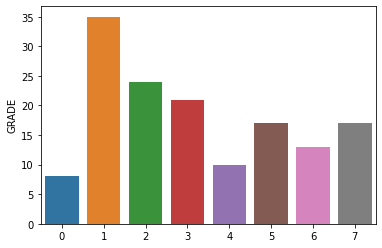

In [77]:
# para este plot utilizaremos a biblioteca seaborn, que é muito útil para gráficos no python
import seaborn as sns
# para plotar a proporção das classes, primeiro contamos os valores da coluna 'target' e transformamos em um frame
aux = pd.DataFrame(dataset['GRADE'].value_counts())
# usamos o frame criado acima para plot a frequencia de cada classe no dataset
sns.barplot(x=aux.index, y='GRADE', data=aux)

## Calculo da Diferenca Absoluta

Observando os resultados, podemos ver que os metodos Arvore de Decisao e KNN tem as melhores performances, logo temos que calcular a diferenca absoluta para ver qual dos dois e de fato o melhor

In [ ]:
#Calculo do desvio padrao
import math
Dp = math.sqrt(((0.094185)*(0.094185) + (0.105371)*(0.105371))/2)
#Calculo da media
media = (0.304762 - 0.345714)
#calcula da Diferenca Absoluta
DA = media/Dp
print(DA)
#KNN > Arvore de decisao

-0.4097878648002324


Conclusao: O KNN tem uma melhor performance do que a Arvore de decisao e o restante dos algoritmos



#***Zoo***

O dataset contem 7 classes de animais e utliza as informacoes para separar diferentes animais entre essas 7 classes.

## Arvore de Decisao

In [78]:
#Importa as bibliotecas Pandas e Numpy
import pandas as pd
import numpy as np

In [79]:
# na_values = substitui o valor '?' (dado faltante) para Nan
dataset = pd.read_csv('zoo.data', sep=',', na_values='?', names=['name','hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','breathes','venomous','fins','legs','tail','domestic','catsize','type'])
dataset

,name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [80]:

# elimina as linhas com dados faltantes
dataset = dataset.dropna(axis=0)
dataset

,name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [81]:
dataset = pd.get_dummies(dataset)
dataset

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,name_tuatara,name_tuna,name_vampire,name_vole,name_vulture,name_wallaby,name_wasp,name_wolf,name_worm,name_wren
0,1,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,...,0,0,0,0,0,1,0,0,0,0
97,1,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
98,1,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0
99,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [82]:
#Separando as variáveis independentes (conjunto X) e a variável dependente y (que neste caso é a coluna 'type')
X = dataset.loc[:, dataset.columns != 'type'] 
y = np.array(dataset.loc[:, dataset.columns == 'type']).ravel()

In [83]:
#Define os parametros do metodo de Arvore de Decisao
parameters= {'criterion':['gini'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150], 'random_state': [56]}

In [84]:
# importa o método do sklearn que separa em conjunto de treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.26, stratify=y, random_state=56)

In [85]:
# importa o GridSearchCV
from sklearn.model_selection import GridSearchCV
# importa a arvore de decisão
from sklearn.tree import DecisionTreeClassifier
# instancia o classificador 
clf = DecisionTreeClassifier()
gs_tree = GridSearchCV(clf,parameters, cv = 10, scoring = 'accuracy')
# o grid search treinará todos os modelos conforme a parametrização acima
gs_tree.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  UserWarning,


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150],
                         'random_state': [56]},
             scoring='accuracy')

In [86]:
# coloca os resultados num Frame para melhor visulização
results = pd.DataFrame(gs_tree.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_random_state,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002576,0.000196,0.001821,0.000037,gini,4,56,"{'criterion': 'gini', 'max_depth': 4, 'random_...",0.818182,0.9,...,0.9,0.8,0.8,0.9,0.9,0.8,0.9,0.861818,0.047027,18
1,0.002692,0.000158,0.001918,0.000254,gini,5,56,"{'criterion': 'gini', 'max_depth': 5, 'random_...",0.909091,1.0,...,1.0,0.9,0.9,0.8,0.9,0.9,0.9,0.920909,0.059758,1
2,0.002944,0.001016,0.002020,0.000407,gini,6,56,"{'criterion': 'gini', 'max_depth': 6, 'random_...",0.909091,1.0,...,1.0,0.9,0.9,0.8,0.9,0.8,0.9,0.910909,0.069923,17
3,0.002592,0.000096,0.001971,0.000344,gini,7,56,"{'criterion': 'gini', 'max_depth': 7, 'random_...",0.909091,1.0,...,1.0,0.9,0.9,0.8,0.9,0.8,1.0,0.920909,0.074640,1
4,0.002958,0.000650,0.001971,0.000267,gini,8,56,"{'criterion': 'gini', 'max_depth': 8, 'random_...",0.909091,1.0,...,1.0,0.9,0.9,0.8,0.9,0.8,1.0,0.920909,0.074640,1
5,0.002516,0.000041,0.001795,0.000021,gini,9,56,"{'criterion': 'gini', 'max_depth': 9, 'random_...",0.909091,1.0,...,1.0,0.9,0.9,0.8,0.9,0.8,1.0,0.920909,0.074640,1
6,0.002548,0.000083,0.001809,0.000017,gini,10,56,"{'criterion': 'gini', 'max_depth': 10, 'random...",0.909091,1.0,...,1.0,0.9,0.9,0.8,0.9,0.8,1.0,0.920909,0.074640,1
7,0.002495,0.000025,0.001814,0.000066,gini,11,56,"{'criterion': 'gini', 'max_depth': 11, 'random...",0.909091,1.0,...,1.0,0.9,0.9,0.8,0.9,0.8,1.0,0.920909,0.074640,1
8,0.002600,0.000164,0.001896,0.000162,gini,12,56,"{'criterion': 'gini', 'max_depth': 12, 'random...",0.909091,1.0,...,1.0,0.9,0.9,0.8,0.9,0.8,1.0,0.920909,0.074640,1
9,0.002544,0.000124,0.001777,0.000018,gini,15,56,"{'criterion': 'gini', 'max_depth': 15, 'random...",0.909091,1.0,...,1.0,0.9,0.9,0.8,0.9,0.8,1.0,0.920909,0.074640,1


In [87]:
#criar uma visão para facilitar a visualização dos resultados, e ordenar os resultados conforme os resultados.
view = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
results[view].sort_values(by='rank_test_score')

,params,mean_test_score,std_test_score,rank_test_score
8,"{'criterion': 'gini', 'max_depth': 12, 'random...",0.920909,0.074640,1
15,"{'criterion': 'gini', 'max_depth': 90, 'random...",0.920909,0.074640,1
14,"{'criterion': 'gini', 'max_depth': 70, 'random...",0.920909,0.074640,1
13,"{'criterion': 'gini', 'max_depth': 50, 'random...",0.920909,0.074640,1
12,"{'criterion': 'gini', 'max_depth': 40, 'random...",0.920909,0.074640,1
11,"{'criterion': 'gini', 'max_depth': 30, 'random...",0.920909,0.074640,1
10,"{'criterion': 'gini', 'max_depth': 20, 'random...",0.920909,0.074640,1
9,"{'criterion': 'gini', 'max_depth': 15, 'random...",0.920909,0.074640,1
17,"{'criterion': 'gini', 'max_depth': 150, 'rando...",0.920909,0.074640,1
7,"{'criterion': 'gini', 'max_depth': 11, 'random...",0.920909,0.074640,1


## Multilayer-Perceptron (redes neurais)

In [ ]:
#Importa as bibliotecas Pandas e Numpy
import pandas as pd
import numpy as np

In [ ]:
# na_values = substitui o valor '?' (dado faltante) para Nan
dataset = pd.read_csv('zoo.data', sep=',', na_values='?', names=['name','hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','breathes','venomous','fins','legs','tail','domestic','catsize','type'])
dataset

,name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [ ]:

# elimina as linhas com dados faltantes
dataset = dataset.dropna(axis=0)
dataset

,name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [ ]:
#transforma dados categóricos em numericos
dataset = pd.get_dummies(dataset)
dataset

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,name_tuatara,name_tuna,name_vampire,name_vole,name_vulture,name_wallaby,name_wasp,name_wolf,name_worm,name_wren
0,1,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,...,0,0,0,0,0,1,0,0,0,0
97,1,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
98,1,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0
99,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
#Separando as variáveis independentes (conjunto X) e a variável dependente y (que neste caso é a coluna 'type')
X = dataset.loc[:, dataset.columns != 'type'] 
y = np.array(dataset.loc[:, dataset.columns == 'type']).ravel()

In [ ]:
# importa o algoritmo de classificação Multilayer-Perceptron (redes neurais)
from sklearn.neural_network import MLPClassifier
# importa o GridSearchCV
from sklearn.model_selection import GridSearchCV

# na MLP um parâmetro a ser testado é a quantidade de neurônios na camada escondida, 
# onde utilzamos uma tupla para representar a camada escondida.
# Por exemplo:
# (5) - Cinco neurônios e uma camada escondida
# (8, 5) - Oito neurônios na primeira camada escondida e cinco neurônios na segunda camada escondida.
# Interessante nesse projeto utilizar no máximo duas camadas para verificação 
# Quanto mais camadas e neurônios maior o tempo de processamento do algoritmo
parameters = {'hidden_layer_sizes' : [(5), (8), (15), (5, 3), (8, 5), (10, 5)],
              'max_iter' : [3000], 'random_state' : [56]}

# define o algoritmo de classificação que será usado
mlp = MLPClassifier()
gs_mlp = GridSearchCV(mlp, parameters, cv=10, scoring='accuracy')
# o grid search treinará todos os modelos conforme a parametrização acima
gs_mlp.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  UserWarning,


GridSearchCV(cv=10, estimator=MLPClassifier(),
             param_grid={'hidden_layer_sizes': [5, 8, 15, (5, 3), (8, 5),
                                                (10, 5)],
                         'max_iter': [3000], 'random_state': [56]},
             scoring='accuracy')

In [ ]:
#criar uma visão para facilitar a visualização dos resultados, e ordenar os resultados conforme os resultados.
view = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
results = pd.DataFrame(gs_mlp.cv_results_)
results[view].sort_values(by='rank_test_score')

,params,mean_test_score,std_test_score,rank_test_score
2,"{'hidden_layer_sizes': 15, 'max_iter': 3000, '...",0.960000,0.048990,1
1,"{'hidden_layer_sizes': 8, 'max_iter': 3000, 'r...",0.920000,0.074833,2
4,"{'hidden_layer_sizes': (8, 5), 'max_iter': 300...",0.900000,0.077460,3
5,"{'hidden_layer_sizes': (10, 5), 'max_iter': 30...",0.861818,0.090618,4
0,"{'hidden_layer_sizes': 5, 'max_iter': 3000, 'r...",0.840000,0.135647,5
3,"{'hidden_layer_sizes': (5, 3), 'max_iter': 300...",0.821818,0.059641,6


## Naive Bayes

In [ ]:
#Importa as bibliotecas Pandas e Numpy
import pandas as pd
import numpy as np

In [ ]:
# na_values = substitui o valor '?' (dado faltante) para Nan
dataset = pd.read_csv('zoo.data', sep=',', na_values='?', names=['name','hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','breathes','venomous','fins','legs','tail','domestic','catsize','type'])
dataset

,name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [ ]:

# elimina as linhas com dados faltantes
dataset = dataset.dropna(axis=0)
dataset

,name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [ ]:
dataset = pd.get_dummies(dataset)
dataset

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,name_tuatara,name_tuna,name_vampire,name_vole,name_vulture,name_wallaby,name_wasp,name_wolf,name_worm,name_wren
0,1,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,...,0,0,0,0,0,1,0,0,0,0
97,1,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
98,1,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0
99,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
#Separando as variáveis independentes (conjunto X) e a variável dependente y (que neste caso é a coluna 'type')
X = dataset.loc[:, dataset.columns != 'type'] 
y = np.array(dataset.loc[:, dataset.columns == 'type']).ravel()

In [ ]:
#Define os parametros do metodo Naive Bayes
param = {'var_smoothing': np.logspace(0,-9, num=100)}

In [ ]:
# importa o método do sklearn que separa em conjunto de treino e teste
from sklearn.model_selection import train_test_split
# importa o algoritmo Naive Bayes 
from sklearn.naive_bayes import GaussianNB
# importa o GridSearchCV
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=56)
# instancia o classificador
gnb = GaussianNB()
gs_NB = GridSearchCV(gnb, param, cv = 10, scoring = 'accuracy')
# o grid search treinará todos os modelos conforme a parametrização acima
gs_NB.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  UserWarning,


GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy')

In [ ]:
#criar uma visão para facilitar a visualização dos resultados, e ordenar os resultados conforme os resultados.
view = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
results = pd.DataFrame(gs_NB.cv_results_)
results[view].sort_values(by='rank_test_score')

,params,mean_test_score,std_test_score,rank_test_score
20,{'var_smoothing': 0.01519911082952933},0.970000,0.045826,1
19,{'var_smoothing': 0.01873817422860384},0.970000,0.045826,1
49,{'var_smoothing': 3.511191734215127e-05},0.960000,0.048990,3
72,{'var_smoothing': 2.848035868435799e-07},0.960000,0.048990,3
71,{'var_smoothing': 3.5111917342151277e-07},0.960000,0.048990,3
...,...,...,...,...
4,{'var_smoothing': 0.43287612810830584},0.811818,0.083026,95
3,{'var_smoothing': 0.533669923120631},0.781818,0.060848,97
2,{'var_smoothing': 0.657933224657568},0.781818,0.060848,97
1,{'var_smoothing': 0.8111308307896871},0.771818,0.078986,99


## K Neighbors

In [ ]:
#Importa as bibliotecas Pandas e Numpy
import pandas as pd
import numpy as np

In [ ]:
# na_values = substitui o valor '?' (dado faltante) para Nan
dataset = pd.read_csv('zoo.data', sep=',', na_values='?', names=['name','hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','breathes','venomous','fins','legs','tail','domestic','catsize','type'])
dataset

,name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [ ]:

# elimina as linhas com dados faltantes
dataset = dataset.dropna(axis=0)
dataset

,name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [ ]:
dataset = pd.get_dummies(dataset)
dataset

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,name_tuatara,name_tuna,name_vampire,name_vole,name_vulture,name_wallaby,name_wasp,name_wolf,name_worm,name_wren
0,1,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,...,0,0,0,0,0,1,0,0,0,0
97,1,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
98,1,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0
99,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
#Separando as variáveis independentes (conjunto X) e a variável dependente y (que neste caso é a coluna 'type')
X = dataset.loc[:, dataset.columns != 'type'] 
y = np.array(dataset.loc[:, dataset.columns == 'type']).ravel()

In [ ]:
# importa o algoritmo de classifcaçaõ k-vizinhos
from sklearn.neighbors import KNeighborsClassifier
# importa o GridSearchCV
from sklearn.model_selection import GridSearchCV

# no grid coloca os hiperparâmetros do algoritmo que serão testados (dicionário)
# testará o valor de k com os seguintes valores e o hiperparâmetros weights com os valores 'uniform' e 'distance'
parameters = {'n_neighbors' : [1, 3, 5, 7, 9, 11, 13], 'weights' : ['uniform', 'distance']}

# define o algoritmo de classificação que será usado
knn = KNeighborsClassifier()
''' configura o GridSearch com o algoritmo de classificação = knn (instanciado), os parâmetros testados serão os 
    definidos em parameters, usa cross-validation = 10 e a medida de avaliação é a acurácia.'''  
gs = GridSearchCV(knn, parameters, cv=10, scoring='accuracy')
# o grid search treinará todos os modelos conforme a parametrização acima
gs.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  UserWarning,


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
# coloca os resultados num Frame para melhor visulização
results = pd.DataFrame(gs.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003310,0.001301,0.003571,0.000974,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",1.000000,1.0,1.0,1.0,1.0,1.0,0.9,1.0,1.0,0.9,0.980000,0.040000,1
1,0.002743,0.000195,0.003052,0.000442,1,distance,"{'n_neighbors': 1, 'weights': 'distance'}",1.000000,1.0,1.0,1.0,1.0,1.0,0.9,1.0,1.0,0.9,0.980000,0.040000,1
2,0.002801,0.000133,0.003466,0.000552,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",1.000000,1.0,1.0,1.0,1.0,0.9,0.9,0.9,0.9,0.9,0.950000,0.050000,3
3,0.003237,0.000687,0.003432,0.000747,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",1.000000,1.0,1.0,1.0,1.0,0.9,0.9,0.9,0.9,0.9,0.950000,0.050000,3
4,0.003398,0.000768,0.003990,0.000845,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.909091,0.9,0.8,0.9,1.0,0.9,0.9,0.8,0.8,0.9,0.880909,0.060364,5
5,0.002877,0.000308,0.003461,0.000668,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.909091,0.9,0.8,0.9,1.0,0.9,0.9,0.8,0.8,0.9,0.880909,0.060364,5
6,0.003573,0.000894,0.003808,0.000912,7,uniform,"{'n_neighbors': 7, 'weights': 'uniform'}",0.818182,0.9,0.8,0.9,0.9,0.9,0.8,0.7,0.8,0.9,0.841818,0.065455,8
7,0.002657,0.000162,0.003205,0.000831,7,distance,"{'n_neighbors': 7, 'weights': 'distance'}",0.909091,0.9,0.8,0.9,0.9,0.9,0.9,0.8,0.8,0.9,0.870909,0.046497,7
8,0.002762,0.000174,0.003312,0.000223,9,uniform,"{'n_neighbors': 9, 'weights': 'uniform'}",0.818182,0.9,0.7,0.8,0.8,0.8,0.8,0.7,0.7,0.8,0.781818,0.060848,11
9,0.003231,0.000623,0.003585,0.000781,9,distance,"{'n_neighbors': 9, 'weights': 'distance'}",0.818182,0.9,0.8,0.9,0.9,0.9,0.8,0.7,0.8,0.9,0.841818,0.065455,8


In [ ]:
#criar uma visão para facilitar a visualização dos resultados, e ordenar os resultados conforme os resultados.
view = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
results[view].sort_values(by='rank_test_score')

,params,mean_test_score,std_test_score,rank_test_score
0,"{'n_neighbors': 1, 'weights': 'uniform'}",0.980000,0.040000,1
1,"{'n_neighbors': 1, 'weights': 'distance'}",0.980000,0.040000,1
2,"{'n_neighbors': 3, 'weights': 'uniform'}",0.950000,0.050000,3
3,"{'n_neighbors': 3, 'weights': 'distance'}",0.950000,0.050000,3
4,"{'n_neighbors': 5, 'weights': 'uniform'}",0.880909,0.060364,5
5,"{'n_neighbors': 5, 'weights': 'distance'}",0.880909,0.060364,5
7,"{'n_neighbors': 7, 'weights': 'distance'}",0.870909,0.046497,7
6,"{'n_neighbors': 7, 'weights': 'uniform'}",0.841818,0.065455,8
9,"{'n_neighbors': 9, 'weights': 'distance'}",0.841818,0.065455,8
11,"{'n_neighbors': 11, 'weights': 'distance'}",0.821818,0.059641,10


##Grafico de balanceamento

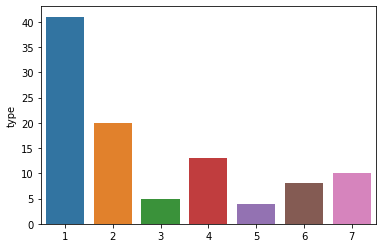

In [88]:
# para este plot utilizaremos a biblioteca seaborn, que é muito útil para gráficos no python
import seaborn as sns
# para plotar a proporção das classes, primeiro contamos os valores da coluna 'target' e transformamos em um frame
aux = pd.DataFrame(dataset['type'].value_counts())
# usamos o frame criado acima para plot a frequencia de cada classe no dataset
sns.barplot(x=aux.index, y='type', data=aux)

## Calculo da Diferenca Absoluta

Observando os resultados, podemos ver que os metodos Naive Bayes e KNN tem as melhores performances, logo temos que calcular a diferenca absoluta para ver qual dos dois e de fato o melhor

In [ ]:
#Calculo do desvio padrao
import math
Dp = math.sqrt(((0.045826)*(00.045826) + (0.040000)*(0.040000))/2)
#Calculo da media
media = (0.970000 - 0.980000)
#calcula da Diferenca Absoluta
DA = media/Dp
print(DA)
#KNN > Naive Bayes

-0.23249457761717718


Conclusao: O KNN tem uma melhor performance do que o Naive Bayes e o restante dos algoritmos



#***Tic-Tac-Toe***

O dataset mostra todas a possibilidades em que 'x' ganha quando e o primeiro a jogar. Foi designada 1 para quando ele ganha e 0 para quand perde.

## Arvore de Decisao

In [89]:
#Importa as bibliotecas Pandas e Numpy
import pandas as pd
import numpy as np

In [90]:
# na_values = substitui o valor '?' (dado faltante) para Nan
dataset = pd.read_csv('tic-tac-toe.data', sep=',',  index_col=0, na_values='?', names=['top-left-square','top-middle-square','top-right-squar','middle-left-square','middle-middle-square','middle-right-square','bottom-left-square','bottom-middle-square','bottom-right-square','end'])
dataset

,top-middle-square,top-right-squar,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,end
top-left-square,,,,,,,,,
x,x,x,x,o,o,x,o,o,1
x,x,x,x,o,o,o,x,o,1
x,x,x,x,o,o,o,o,x,1
x,x,x,x,o,o,o,b,b,1
x,x,x,x,o,o,b,o,b,1
...,...,...,...,...,...,...,...,...,...
o,x,x,x,o,o,o,x,x,0
o,x,o,x,x,o,x,o,x,0
o,x,o,x,o,x,x,o,x,0


In [91]:
# elimina as linhas com dados faltantes
dataset = dataset.dropna(axis=0)
dataset

,top-middle-square,top-right-squar,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,end
top-left-square,,,,,,,,,
x,x,x,x,o,o,x,o,o,1
x,x,x,x,o,o,o,x,o,1
x,x,x,x,o,o,o,o,x,1
x,x,x,x,o,o,o,b,b,1
x,x,x,x,o,o,b,o,b,1
...,...,...,...,...,...,...,...,...,...
o,x,x,x,o,o,o,x,x,0
o,x,o,x,x,o,x,o,x,0
o,x,o,x,o,x,x,o,x,0


In [92]:
#transforma dados categóricos em numericos
dataset = pd.get_dummies(dataset)
dataset

,end,top-middle-square_b,top-middle-square_o,top-middle-square_x,top-right-squar_b,top-right-squar_o,top-right-squar_x,middle-left-square_b,middle-left-square_o,middle-left-square_x,...,middle-right-square_x,bottom-left-square_b,bottom-left-square_o,bottom-left-square_x,bottom-middle-square_b,bottom-middle-square_o,bottom-middle-square_x,bottom-right-square_b,bottom-right-square_o,bottom-right-square_x
top-left-square,,,,,,,,,,,,,,,,,,,,,
x,1,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,1,0
x,1,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,1,0
x,1,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,1,0,0,0,1
x,1,0,0,1,0,0,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0
x,1,0,0,1,0,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
o,0,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,1
o,0,0,0,1,0,1,0,0,0,1,...,0,0,0,1,0,1,0,0,0,1
o,0,0,0,1,0,1,0,0,0,1,...,1,0,0,1,0,1,0,0,0,1


In [93]:
#Separando as variáveis independentes (conjunto X) e a variável dependente y (que neste caso é a coluna 'end')
X = dataset.loc[:, dataset.columns != 'end'] 
y = np.array(dataset.loc[:, dataset.columns == 'end']).ravel()

In [94]:
#Define os parametros do metodo de Arvore de Decisao
parameters= {'criterion':['gini'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150], 'random_state': [56]}

In [95]:
# importa o método do sklearn que separa em conjunto de treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.26, stratify=y, random_state=56)

In [96]:
# importa o GridSearchCV
from sklearn.model_selection import GridSearchCV
# importa a arvore de decisão
from sklearn.tree import DecisionTreeClassifier
# instancia o classificador 
clf = DecisionTreeClassifier()
gs_tree = GridSearchCV(clf,parameters, cv = 10, scoring = 'accuracy')
# o grid search treinará todos os modelos conforme a parametrização acima
gs_tree.fit(X,y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150],
                         'random_state': [56]},
             scoring='accuracy')

In [97]:
# coloca os resultados num Frame para melhor visulização
results = pd.DataFrame(gs_tree.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_random_state,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002969,0.000696,0.001252,0.000101,gini,4,56,"{'criterion': 'gini', 'max_depth': 4, 'random_...",0.781250,0.833333,...,0.802083,0.770833,0.645833,0.645833,0.750000,0.915789,0.831579,0.750779,0.107124,17
1,0.002574,0.000057,0.001196,0.000071,gini,5,56,"{'criterion': 'gini', 'max_depth': 5, 'random_...",0.656250,0.812500,...,0.708333,0.791667,0.687500,0.625000,0.791667,0.873684,0.726316,0.727708,0.083422,18
2,0.002681,0.000057,0.001186,0.000016,gini,6,56,"{'criterion': 'gini', 'max_depth': 6, 'random_...",0.656250,0.843750,...,0.760417,0.812500,0.718750,0.697917,0.802083,0.894737,0.800000,0.769474,0.070276,3
3,0.003055,0.000786,0.001250,0.000187,gini,7,56,"{'criterion': 'gini', 'max_depth': 7, 'random_...",0.604167,0.791667,...,0.770833,0.781250,0.729167,0.708333,0.833333,0.947368,0.831579,0.767478,0.090222,4
4,0.003191,0.000626,0.001298,0.000240,gini,8,56,"{'criterion': 'gini', 'max_depth': 8, 'random_...",0.625000,0.781250,...,0.739583,0.750000,0.791667,0.697917,0.864583,0.978947,0.800000,0.775811,0.091092,1
5,0.003134,0.000422,0.001305,0.000266,gini,9,56,"{'criterion': 'gini', 'max_depth': 9, 'random_...",0.583333,0.729167,...,0.760417,0.781250,0.770833,0.708333,0.895833,0.947368,0.831579,0.771645,0.097670,2
6,0.002975,0.000080,0.001204,0.000071,gini,10,56,"{'criterion': 'gini', 'max_depth': 10, 'random...",0.593750,0.729167,...,0.739583,0.781250,0.760417,0.708333,0.885417,0.957895,0.789474,0.766404,0.094435,5
7,0.002970,0.000051,0.001175,0.000031,gini,11,56,"{'criterion': 'gini', 'max_depth': 11, 'random...",0.604167,0.718750,...,0.729167,0.760417,0.750000,0.708333,0.864583,0.957895,0.789474,0.759112,0.091289,15
8,0.003015,0.000094,0.001170,0.000049,gini,12,56,"{'criterion': 'gini', 'max_depth': 12, 'random...",0.593750,0.708333,...,0.729167,0.770833,0.739583,0.708333,0.854167,0.957895,0.800000,0.758081,0.092605,16
9,0.003062,0.000172,0.001254,0.000245,gini,15,56,"{'criterion': 'gini', 'max_depth': 15, 'random...",0.583333,0.739583,...,0.750000,0.770833,0.739583,0.718750,0.875000,0.947368,0.800000,0.764320,0.092418,6


In [98]:
#criar uma visão para facilitar a visualização dos resultados, e ordenar os resultados conforme os resultados.
view = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
results[view].sort_values(by='rank_test_score')

,params,mean_test_score,std_test_score,rank_test_score
4,"{'criterion': 'gini', 'max_depth': 8, 'random_...",0.775811,0.091092,1
5,"{'criterion': 'gini', 'max_depth': 9, 'random_...",0.771645,0.097670,2
2,"{'criterion': 'gini', 'max_depth': 6, 'random_...",0.769474,0.070276,3
3,"{'criterion': 'gini', 'max_depth': 7, 'random_...",0.767478,0.090222,4
6,"{'criterion': 'gini', 'max_depth': 10, 'random...",0.766404,0.094435,5
17,"{'criterion': 'gini', 'max_depth': 150, 'rando...",0.764320,0.092418,6
15,"{'criterion': 'gini', 'max_depth': 90, 'random...",0.764320,0.092418,6
16,"{'criterion': 'gini', 'max_depth': 120, 'rando...",0.764320,0.092418,6
9,"{'criterion': 'gini', 'max_depth': 15, 'random...",0.764320,0.092418,6
10,"{'criterion': 'gini', 'max_depth': 20, 'random...",0.764320,0.092418,6


## Multilayer-Perceptron (redes neurais)

In [ ]:
#Importa as bibliotecas Pandas e Numpy
import pandas as pd
import numpy as np

In [ ]:
# na_values = substitui o valor '?' (dado faltante) para Nan
dataset = pd.read_csv('tic-tac-toe.data', sep=',',  index_col=0, na_values='?',names=['top-left-square','top-middle-square','top-right-squar','middle-left-square','middle-middle-square','middle-right-square','bottom-left-square','bottom-middle-square','bottom-right-square','end'])
dataset

,top-middle-square,top-right-squar,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,end
top-left-square,,,,,,,,,
x,x,x,x,o,o,x,o,o,1
x,x,x,x,o,o,o,x,o,1
x,x,x,x,o,o,o,o,x,1
x,x,x,x,o,o,o,b,b,1
x,x,x,x,o,o,b,o,b,1
...,...,...,...,...,...,...,...,...,...
o,x,x,x,o,o,o,x,x,0
o,x,o,x,x,o,x,o,x,0
o,x,o,x,o,x,x,o,x,0


In [ ]:

# elimina as linhas com dados faltantes
dataset = dataset.dropna(axis=0)
dataset

,top-middle-square,top-right-squar,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,end
top-left-square,,,,,,,,,
x,x,x,x,o,o,x,o,o,1
x,x,x,x,o,o,o,x,o,1
x,x,x,x,o,o,o,o,x,1
x,x,x,x,o,o,o,b,b,1
x,x,x,x,o,o,b,o,b,1
...,...,...,...,...,...,...,...,...,...
o,x,x,x,o,o,o,x,x,0
o,x,o,x,x,o,x,o,x,0
o,x,o,x,o,x,x,o,x,0


In [ ]:
dataset = pd.get_dummies(dataset)
dataset

,end,top-middle-square_b,top-middle-square_o,top-middle-square_x,top-right-squar_b,top-right-squar_o,top-right-squar_x,middle-left-square_b,middle-left-square_o,middle-left-square_x,...,middle-right-square_x,bottom-left-square_b,bottom-left-square_o,bottom-left-square_x,bottom-middle-square_b,bottom-middle-square_o,bottom-middle-square_x,bottom-right-square_b,bottom-right-square_o,bottom-right-square_x
top-left-square,,,,,,,,,,,,,,,,,,,,,
x,1,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,1,0
x,1,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,1,0
x,1,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,1,0,0,0,1
x,1,0,0,1,0,0,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0
x,1,0,0,1,0,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
o,0,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,1
o,0,0,0,1,0,1,0,0,0,1,...,0,0,0,1,0,1,0,0,0,1
o,0,0,0,1,0,1,0,0,0,1,...,1,0,0,1,0,1,0,0,0,1


In [ ]:
#Separando as variáveis independentes (conjunto X) e a variável dependente y (que neste caso é a coluna 'end')
X = dataset.loc[:, dataset.columns != 'end'] 
y = np.array(dataset.loc[:, dataset.columns == 'end']).ravel()

In [ ]:
# importa o algoritmo de classificação Multilayer-Perceptron (redes neurais)
from sklearn.neural_network import MLPClassifier
# importa o GridSearchCV
from sklearn.model_selection import GridSearchCV

# na MLP um parâmetro a ser testado é a quantidade de neurônios na camada escondida, 
# onde utilzamos uma tupla para representar a camada escondida.
# Por exemplo:
# (5) - Cinco neurônios e uma camada escondida
# (8, 5) - Oito neurônios na primeira camada escondida e cinco neurônios na segunda camada escondida.
# Interessante nesse projeto utilizar no máximo duas camadas para verificação 
# Quanto mais camadas e neurônios maior o tempo de processamento do algoritmo
parameters = {'hidden_layer_sizes' : [(5), (8), (15), (5, 3), (8, 5), (10, 5)],
              'max_iter' : [3000], 'random_state' : [56]}

# define o algoritmo de classificação que será usado
mlp = MLPClassifier()
gs_mlp = GridSearchCV(mlp, parameters, cv=10, scoring='accuracy')
# o grid search treinará todos os modelos conforme a parametrização acima
gs_mlp.fit(X, y)

GridSearchCV(cv=10, estimator=MLPClassifier(),
             param_grid={'hidden_layer_sizes': [5, 8, 15, (5, 3), (8, 5),
                                                (10, 5)],
                         'max_iter': [3000], 'random_state': [56]},
             scoring='accuracy')

In [ ]:
#criar uma visão para facilitar a visualização dos resultados, e ordenar os resultados conforme os resultados.
view = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
results = pd.DataFrame(gs_mlp.cv_results_)
results[view].sort_values(by='rank_test_score')

,params,mean_test_score,std_test_score,rank_test_score
4,"{'hidden_layer_sizes': (8, 5), 'max_iter': 300...",0.783048,0.106004,1
5,"{'hidden_layer_sizes': (10, 5), 'max_iter': 30...",0.771612,0.108960,2
2,"{'hidden_layer_sizes': 15, 'max_iter': 3000, '...",0.754923,0.126590,3
3,"{'hidden_layer_sizes': (5, 3), 'max_iter': 300...",0.739167,0.083201,4
1,"{'hidden_layer_sizes': 8, 'max_iter': 3000, 'r...",0.738125,0.094299,5
0,"{'hidden_layer_sizes': 5, 'max_iter': 3000, 'r...",0.725603,0.098287,6


## Naive Bayes

In [ ]:
#Importa as bibliotecas Pandas e Numpy
import pandas as pd
import numpy as np

In [ ]:
# na_values = substitui o valor '?' (dado faltante) para Nan
dataset = pd.read_csv('tic-tac-toe.data', sep=',',  index_col=0, na_values='?', names=['top-left-square','top-middle-square','top-right-squar','middle-left-square','middle-middle-square','middle-right-square','bottom-left-square','bottom-middle-square','bottom-right-square','end'])
dataset

,top-middle-square,top-right-squar,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,end
top-left-square,,,,,,,,,
x,x,x,x,o,o,x,o,o,1
x,x,x,x,o,o,o,x,o,1
x,x,x,x,o,o,o,o,x,1
x,x,x,x,o,o,o,b,b,1
x,x,x,x,o,o,b,o,b,1
...,...,...,...,...,...,...,...,...,...
o,x,x,x,o,o,o,x,x,0
o,x,o,x,x,o,x,o,x,0
o,x,o,x,o,x,x,o,x,0


In [ ]:

# elimina as linhas com dados faltantes
dataset = dataset.dropna(axis=0)
dataset

,top-middle-square,top-right-squar,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,end
top-left-square,,,,,,,,,
x,x,x,x,o,o,x,o,o,1
x,x,x,x,o,o,o,x,o,1
x,x,x,x,o,o,o,o,x,1
x,x,x,x,o,o,o,b,b,1
x,x,x,x,o,o,b,o,b,1
...,...,...,...,...,...,...,...,...,...
o,x,x,x,o,o,o,x,x,0
o,x,o,x,x,o,x,o,x,0
o,x,o,x,o,x,x,o,x,0


In [ ]:
dataset = pd.get_dummies(dataset)
dataset

,end,top-middle-square_b,top-middle-square_o,top-middle-square_x,top-right-squar_b,top-right-squar_o,top-right-squar_x,middle-left-square_b,middle-left-square_o,middle-left-square_x,...,middle-right-square_x,bottom-left-square_b,bottom-left-square_o,bottom-left-square_x,bottom-middle-square_b,bottom-middle-square_o,bottom-middle-square_x,bottom-right-square_b,bottom-right-square_o,bottom-right-square_x
top-left-square,,,,,,,,,,,,,,,,,,,,,
x,1,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,1,0
x,1,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,1,0
x,1,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,1,0,0,0,1
x,1,0,0,1,0,0,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0
x,1,0,0,1,0,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
o,0,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,1
o,0,0,0,1,0,1,0,0,0,1,...,0,0,0,1,0,1,0,0,0,1
o,0,0,0,1,0,1,0,0,0,1,...,1,0,0,1,0,1,0,0,0,1


In [ ]:
#Separando as variáveis independentes (conjunto X) e a variável dependente y (que neste caso é a coluna 'end')
X = dataset.loc[:, dataset.columns != 'end'] 
y = np.array(dataset.loc[:, dataset.columns == 'end']).ravel()

In [ ]:
#Define os parametros do metodo Naive Bayes
param = {'var_smoothing': np.logspace(0,-9, num=100)}

In [ ]:
# importa o método do sklearn que separa em conjunto de treino e teste
from sklearn.model_selection import train_test_split
# importa o algoritmo Naive Bayes 
from sklearn.naive_bayes import GaussianNB
# importa o GridSearchCV
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=56)
# instancia o classificador
gnb = GaussianNB()
gs_NB = GridSearchCV(gnb, param, cv = 10, scoring = 'accuracy')
# o grid search treinará todos os modelos conforme a parametrização acima
gs_NB.fit(X,y)

GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy')

In [ ]:
#criar uma visão para facilitar a visualização dos resultados, e ordenar os resultados conforme os resultados.
view = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
results = pd.DataFrame(gs_NB.cv_results_)
results[view].sort_values(by='rank_test_score')

,params,mean_test_score,std_test_score,rank_test_score
0,{'var_smoothing': 1.0},0.681711,0.060651,1
1,{'var_smoothing': 0.8111308307896871},0.677544,0.069146,2
2,{'var_smoothing': 0.657933224657568},0.669178,0.070052,3
3,{'var_smoothing': 0.533669923120631},0.659803,0.072131,4
5,{'var_smoothing': 0.3511191734215131},0.657752,0.072839,5
...,...,...,...,...
43,{'var_smoothing': 0.0001232846739442066},0.638958,0.071115,22
42,{'var_smoothing': 0.0001519911082952933},0.638958,0.071115,22
41,{'var_smoothing': 0.0001873817422860383},0.638958,0.071115,22
59,{'var_smoothing': 4.328761281083053e-06},0.638958,0.071115,22


## K Neighbors

In [ ]:
#Importa as bibliotecas Pandas e Numpy
import pandas as pd
import numpy as np

In [ ]:
# na_values = substitui o valor '?' (dado faltante) para Nan
dataset = pd.read_csv('tic-tac-toe.data', sep=',',  index_col=0, na_values='?', names=['top-left-square','top-middle-square','top-right-squar','middle-left-square','middle-middle-square','middle-right-square','bottom-left-square','bottom-middle-square','bottom-right-square','end'])
dataset

,top-middle-square,top-right-squar,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,end
top-left-square,,,,,,,,,
x,x,x,x,o,o,x,o,o,1
x,x,x,x,o,o,o,x,o,1
x,x,x,x,o,o,o,o,x,1
x,x,x,x,o,o,o,b,b,1
x,x,x,x,o,o,b,o,b,1
...,...,...,...,...,...,...,...,...,...
o,x,x,x,o,o,o,x,x,0
o,x,o,x,x,o,x,o,x,0
o,x,o,x,o,x,x,o,x,0


In [ ]:

# elimina as linhas com dados faltantes
dataset = dataset.dropna(axis=0)
dataset

,top-middle-square,top-right-squar,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,end
top-left-square,,,,,,,,,
x,x,x,x,o,o,x,o,o,1
x,x,x,x,o,o,o,x,o,1
x,x,x,x,o,o,o,o,x,1
x,x,x,x,o,o,o,b,b,1
x,x,x,x,o,o,b,o,b,1
...,...,...,...,...,...,...,...,...,...
o,x,x,x,o,o,o,x,x,0
o,x,o,x,x,o,x,o,x,0
o,x,o,x,o,x,x,o,x,0


In [ ]:
dataset = pd.get_dummies(dataset)
dataset

,end,top-middle-square_b,top-middle-square_o,top-middle-square_x,top-right-squar_b,top-right-squar_o,top-right-squar_x,middle-left-square_b,middle-left-square_o,middle-left-square_x,...,middle-right-square_x,bottom-left-square_b,bottom-left-square_o,bottom-left-square_x,bottom-middle-square_b,bottom-middle-square_o,bottom-middle-square_x,bottom-right-square_b,bottom-right-square_o,bottom-right-square_x
top-left-square,,,,,,,,,,,,,,,,,,,,,
x,1,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,1,0
x,1,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,1,0
x,1,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,1,0,0,0,1
x,1,0,0,1,0,0,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0
x,1,0,0,1,0,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
o,0,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,1
o,0,0,0,1,0,1,0,0,0,1,...,0,0,0,1,0,1,0,0,0,1
o,0,0,0,1,0,1,0,0,0,1,...,1,0,0,1,0,1,0,0,0,1


In [ ]:
#Separando as variáveis independentes (conjunto X) e a variável dependente y (que neste caso é a coluna 'end')
X = dataset.loc[:, dataset.columns != 'end'] 
y = np.array(dataset.loc[:, dataset.columns == 'end']).ravel()

In [ ]:
# importa o algoritmo de classifcaçaõ k-vizinhos
from sklearn.neighbors import KNeighborsClassifier
# importa o GridSearchCV
from sklearn.model_selection import GridSearchCV

# no grid coloca os hiperparâmetros do algoritmo que serão testados (dicionário)
# testará o valor de k com os seguintes valores e o hiperparâmetros weights com os valores 'uniform' e 'distance'
parameters = {'n_neighbors' : [1, 3, 5, 7, 9, 11, 13], 'weights' : ['uniform', 'distance']}

# define o algoritmo de classificação que será usado
knn = KNeighborsClassifier()
''' configura o GridSearch com o algoritmo de classificação = knn (instanciado), os parâmetros testados serão os 
    definidos em parameters, usa cross-validation = 10 e a medida de avaliação é a acurácia.'''  
gs = GridSearchCV(knn, parameters, cv=10, scoring='accuracy')
# o grid search treinará todos os modelos conforme a parametrização acima
gs.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
# coloca os resultados num Frame para melhor visulização
results = pd.DataFrame(gs.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003193,0.000579,0.008394,0.001350,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",0.697917,0.729167,0.645833,0.781250,0.770833,0.739583,0.708333,0.697917,0.726316,0.652632,0.714978,0.042121,13
1,0.002895,0.000174,0.004663,0.001253,1,distance,"{'n_neighbors': 1, 'weights': 'distance'}",0.697917,0.729167,0.645833,0.781250,0.770833,0.739583,0.708333,0.697917,0.726316,0.652632,0.714978,0.042121,13
2,0.002842,0.000139,0.007963,0.000124,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.708333,0.822917,0.687500,0.739583,0.739583,0.729167,0.687500,0.770833,0.947368,0.768421,0.760121,0.073634,11
3,0.002807,0.000117,0.004426,0.000194,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.708333,0.822917,0.687500,0.739583,0.739583,0.729167,0.687500,0.770833,0.947368,0.768421,0.760121,0.073634,11
4,0.003243,0.000642,0.008768,0.000629,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.572917,0.729167,0.697917,0.729167,0.729167,0.760417,0.750000,0.885417,1.000000,0.873684,0.772785,0.112439,8
5,0.002885,0.000149,0.005672,0.001652,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.572917,0.729167,0.697917,0.729167,0.729167,0.760417,0.750000,0.885417,1.000000,0.873684,0.772785,0.112439,8
6,0.002883,0.000124,0.008464,0.000168,7,uniform,"{'n_neighbors': 7, 'weights': 'uniform'}",0.541667,0.750000,0.697917,0.708333,0.781250,0.802083,0.729167,0.864583,1.000000,0.873684,0.774868,0.116926,7
7,0.002949,0.000560,0.005997,0.003393,7,distance,"{'n_neighbors': 7, 'weights': 'distance'}",0.541667,0.739583,0.697917,0.708333,0.760417,0.802083,0.729167,0.875000,1.000000,0.873684,0.772785,0.118087,8
8,0.002781,0.000067,0.008666,0.000571,9,uniform,"{'n_neighbors': 9, 'weights': 'uniform'}",0.562500,0.781250,0.770833,0.708333,0.791667,0.781250,0.687500,0.864583,1.000000,0.863158,0.781107,0.111211,3
9,0.002765,0.000041,0.004849,0.000097,9,distance,"{'n_neighbors': 9, 'weights': 'distance'}",0.562500,0.760417,0.739583,0.708333,0.781250,0.781250,0.708333,0.885417,1.000000,0.863158,0.779024,0.112257,5


In [ ]:
#criar uma visão para facilitar a visualização dos resultados, e ordenar os resultados conforme os resultados.
view = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
results[view].sort_values(by='rank_test_score')

,params,mean_test_score,std_test_score,rank_test_score
10,"{'n_neighbors': 11, 'weights': 'uniform'}",0.782149,0.115280,1
13,"{'n_neighbors': 13, 'weights': 'distance'}",0.781140,0.117653,2
8,"{'n_neighbors': 9, 'weights': 'uniform'}",0.781107,0.111211,3
11,"{'n_neighbors': 11, 'weights': 'distance'}",0.781107,0.118211,4
9,"{'n_neighbors': 9, 'weights': 'distance'}",0.779024,0.112257,5
12,"{'n_neighbors': 13, 'weights': 'uniform'}",0.776952,0.114356,6
6,"{'n_neighbors': 7, 'weights': 'uniform'}",0.774868,0.116926,7
4,"{'n_neighbors': 5, 'weights': 'uniform'}",0.772785,0.112439,8
5,"{'n_neighbors': 5, 'weights': 'distance'}",0.772785,0.112439,8
7,"{'n_neighbors': 7, 'weights': 'distance'}",0.772785,0.118087,8


##Grafico de balanceamento

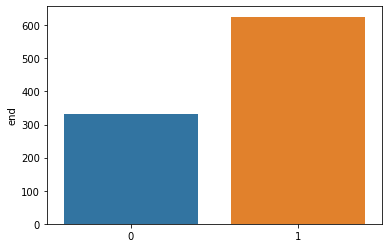

In [99]:
# para este plot utilizaremos a biblioteca seaborn, que é muito útil para gráficos no python
import seaborn as sns
# para plotar a proporção das classes, primeiro contamos os valores da coluna 'target' e transformamos em um frame
aux = pd.DataFrame(dataset['end'].value_counts())
# usamos o frame criado acima para plot a frequencia de cada classe no dataset
sns.barplot(x=aux.index, y='end', data=aux)

## Calculo da Diferenca Absoluta

Observando os resultados, podemos ver que os metodos MLP e KNN tem as melhores performances, logo temos que calcular a diferenca absoluta para ver qual dos dois e de fato o melhor

In [ ]:
#Calculo do desvio padrao
import math
Dp = math.sqrt(((0.106004)*(0.106004) + (0.115280)*(0.115280))/2)
#Calculo da media
media = (0.783048 - 0.782149)
#calcula da Diferenca Absoluta
DA = media/Dp
print(DA)
#MLP > KNN

0.008118175535212203


Conclusao: O MLP tem uma melhor performance do que o KNN e o restante dos algoritmos



#***Teaching Assistant Evaluation***

O dataset consiste na avaliacao da performance de assistentes de professor em 3 semestres normais e 2 semestres de verao. Foi designada 1 para baixo, 2 para medio e 3 para alto.

## Arvore de Decisao

In [100]:
#Importa as bibliotecas Pandas e Numpy
import pandas as pd
import numpy as np

In [101]:
# na_values = substitui o valor '?' (dado faltante) para Nan
dataset = pd.read_csv('tae.data', sep=',',  index_col=0, na_values='?', names=['native-english-speaker','course-instructor','course','class-size','class-attribute'])
dataset

,native-english-speaker,course-instructor,course,class-size,class-attribute
1,23,3,1,19,3
2,15,3,1,17,3
1,23,3,2,49,3
1,5,2,2,33,3
2,7,11,2,55,3
...,...,...,...,...,...
2,3,2,2,26,1
2,10,3,2,12,1
1,18,7,2,48,1
2,22,1,2,51,1


In [102]:

# elimina as linhas com dados faltantes
dataset = dataset.dropna(axis=0)
dataset

,native-english-speaker,course-instructor,course,class-size,class-attribute
1,23,3,1,19,3
2,15,3,1,17,3
1,23,3,2,49,3
1,5,2,2,33,3
2,7,11,2,55,3
...,...,...,...,...,...
2,3,2,2,26,1
2,10,3,2,12,1
1,18,7,2,48,1
2,22,1,2,51,1


In [103]:
#Separando as variáveis independentes (conjunto X) e a variável dependente y (que neste caso é a coluna 'class-attribute')
X = dataset.loc[:, dataset.columns != 'class-attribute'] 
y = np.array(dataset.loc[:, dataset.columns == 'class-attribute']).ravel()

In [104]:
#Define os parametros do metodo de Arvore de Decisao
parameters= {'criterion':['gini'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150], 'random_state': [56]}

In [105]:
# importa o método do sklearn que separa em conjunto de treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.26, stratify=y, random_state=56)

In [106]:
# importa o GridSearchCV
from sklearn.model_selection import GridSearchCV
# importa a arvore de decisão
from sklearn.tree import DecisionTreeClassifier
# instancia o classificador 
clf = DecisionTreeClassifier()
gs_tree = GridSearchCV(clf,parameters, cv = 10, scoring = 'accuracy')
# o grid search treinará todos os modelos conforme a parametrização acima
gs_tree.fit(X,y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150],
                         'random_state': [56]},
             scoring='accuracy')

In [107]:
# coloca os resultados num Frame para melhor visulização
results = pd.DataFrame(gs_tree.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_random_state,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001658,0.000229,0.001042,0.000047,gini,4,56,"{'criterion': 'gini', 'max_depth': 4, 'random_...",0.5000,0.466667,...,0.733333,0.466667,0.400000,0.333333,0.400000,0.333333,0.266667,0.456667,0.139881,18
1,0.001605,0.000037,0.001054,0.000102,gini,5,56,"{'criterion': 'gini', 'max_depth': 5, 'random_...",0.7500,0.733333,...,0.733333,0.600000,0.400000,0.333333,0.266667,0.400000,0.200000,0.501667,0.195853,17
2,0.001583,0.000018,0.001007,0.000034,gini,6,56,"{'criterion': 'gini', 'max_depth': 6, 'random_...",0.6875,0.666667,...,0.800000,0.666667,0.333333,0.266667,0.333333,0.400000,0.266667,0.502083,0.191079,16
3,0.001584,0.000016,0.001034,0.000045,gini,7,56,"{'criterion': 'gini', 'max_depth': 7, 'random_...",0.8750,0.666667,...,0.933333,0.600000,0.400000,0.333333,0.333333,0.400000,0.200000,0.540833,0.232989,15
4,0.001618,0.000016,0.001004,0.000014,gini,8,56,"{'criterion': 'gini', 'max_depth': 8, 'random_...",0.7500,0.800000,...,1.000000,0.666667,0.533333,0.333333,0.400000,0.266667,0.200000,0.575000,0.254433,14
5,0.001714,0.000164,0.001030,0.000024,gini,9,56,"{'criterion': 'gini', 'max_depth': 9, 'random_...",0.8750,0.800000,...,0.933333,0.733333,0.466667,0.333333,0.400000,0.266667,0.200000,0.580833,0.260929,13
6,0.001855,0.000342,0.001099,0.000177,gini,10,56,"{'criterion': 'gini', 'max_depth': 10, 'random...",0.8750,0.933333,...,0.933333,0.800000,0.466667,0.333333,0.400000,0.266667,0.200000,0.614167,0.291024,12
7,0.001696,0.000080,0.001051,0.000065,gini,11,56,"{'criterion': 'gini', 'max_depth': 11, 'random...",0.9375,1.000000,...,1.000000,0.733333,0.466667,0.400000,0.466667,0.266667,0.200000,0.640417,0.298852,11
8,0.001643,0.000037,0.001025,0.000029,gini,12,56,"{'criterion': 'gini', 'max_depth': 12, 'random...",0.9375,1.000000,...,1.000000,0.733333,0.466667,0.333333,0.533333,0.333333,0.200000,0.647083,0.294121,10
9,0.001642,0.000048,0.001024,0.000026,gini,15,56,"{'criterion': 'gini', 'max_depth': 15, 'random...",1.0000,1.000000,...,1.000000,0.800000,0.466667,0.333333,0.533333,0.266667,0.266667,0.660000,0.301773,1


In [108]:
#criar uma visão para facilitar a visualização dos resultados, e ordenar os resultados conforme os resultados.
view = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
results[view].sort_values(by='rank_test_score')

,params,mean_test_score,std_test_score,rank_test_score
9,"{'criterion': 'gini', 'max_depth': 15, 'random...",0.660000,0.301773,1
17,"{'criterion': 'gini', 'max_depth': 150, 'rando...",0.653333,0.305214,2
15,"{'criterion': 'gini', 'max_depth': 90, 'random...",0.653333,0.305214,2
14,"{'criterion': 'gini', 'max_depth': 70, 'random...",0.653333,0.305214,2
13,"{'criterion': 'gini', 'max_depth': 50, 'random...",0.653333,0.305214,2
12,"{'criterion': 'gini', 'max_depth': 40, 'random...",0.653333,0.305214,2
11,"{'criterion': 'gini', 'max_depth': 30, 'random...",0.653333,0.305214,2
10,"{'criterion': 'gini', 'max_depth': 20, 'random...",0.653333,0.305214,2
16,"{'criterion': 'gini', 'max_depth': 120, 'rando...",0.653333,0.305214,2
8,"{'criterion': 'gini', 'max_depth': 12, 'random...",0.647083,0.294121,10


## Multilayer-Perceptron (redes neurais)

In [ ]:
#Importa as bibliotecas Pandas e Numpy
import pandas as pd
import numpy as np

In [ ]:
# na_values = substitui o valor '?' (dado faltante) para Nan
dataset = pd.read_csv('tae.data', sep=',',  index_col=0, na_values='?', names=['native-english-speaker','course-instructor','course','class-size','class-attribute'])
dataset

,native-english-speaker,course-instructor,course,class-size,class-attribute
1,23,3,1,19,3
2,15,3,1,17,3
1,23,3,2,49,3
1,5,2,2,33,3
2,7,11,2,55,3
...,...,...,...,...,...
2,3,2,2,26,1
2,10,3,2,12,1
1,18,7,2,48,1
2,22,1,2,51,1


In [ ]:

# elimina as linhas com dados faltantes
dataset = dataset.dropna(axis=0)
dataset

,native-english-speaker,course-instructor,course,class-size,class-attribute
1,23,3,1,19,3
2,15,3,1,17,3
1,23,3,2,49,3
1,5,2,2,33,3
2,7,11,2,55,3
...,...,...,...,...,...
2,3,2,2,26,1
2,10,3,2,12,1
1,18,7,2,48,1
2,22,1,2,51,1


In [ ]:
#Separando as variáveis independentes (conjunto X) e a variável dependente y (que neste caso é a coluna 'class-attribute')
X = dataset.loc[:, dataset.columns != 'class-attribute'] 
y = np.array(dataset.loc[:, dataset.columns == 'class-attribute']).ravel()

In [ ]:
# importa o algoritmo de classificação Multilayer-Perceptron (redes neurais)
from sklearn.neural_network import MLPClassifier
# importa o GridSearchCV
from sklearn.model_selection import GridSearchCV

# na MLP um parâmetro a ser testado é a quantidade de neurônios na camada escondida, 
# onde utilzamos uma tupla para representar a camada escondida.
# Por exemplo:
# (5) - Cinco neurônios e uma camada escondida
# (8, 5) - Oito neurônios na primeira camada escondida e cinco neurônios na segunda camada escondida.
# Interessante nesse projeto utilizar no máximo duas camadas para verificação 
# Quanto mais camadas e neurônios maior o tempo de processamento do algoritmo
parameters = {'hidden_layer_sizes' : [(5), (8), (15), (5, 3), (8, 5), (10, 5)],
              'max_iter' : [3000], 'random_state' : [56]}

# define o algoritmo de classificação que será usado
mlp = MLPClassifier()
gs_mlp = GridSearchCV(mlp, parameters, cv=10, scoring='accuracy')
# o grid search treinará todos os modelos conforme a parametrização acima
gs_mlp.fit(X, y)

GridSearchCV(cv=10, estimator=MLPClassifier(),
             param_grid={'hidden_layer_sizes': [5, 8, 15, (5, 3), (8, 5),
                                                (10, 5)],
                         'max_iter': [3000], 'random_state': [56]},
             scoring='accuracy')

In [ ]:
#criar uma visão para facilitar a visualização dos resultados, e ordenar os resultados conforme os resultados.
view = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
results = pd.DataFrame(gs_mlp.cv_results_)
results[view].sort_values(by='rank_test_score')

,params,mean_test_score,std_test_score,rank_test_score
4,"{'hidden_layer_sizes': (8, 5), 'max_iter': 300...",0.464167,0.109294,1
0,"{'hidden_layer_sizes': 5, 'max_iter': 3000, 'r...",0.463750,0.084780,2
2,"{'hidden_layer_sizes': 15, 'max_iter': 3000, '...",0.455833,0.097472,3
3,"{'hidden_layer_sizes': (5, 3), 'max_iter': 300...",0.404583,0.122339,4
1,"{'hidden_layer_sizes': 8, 'max_iter': 3000, 'r...",0.403750,0.112121,5
5,"{'hidden_layer_sizes': (10, 5), 'max_iter': 30...",0.330417,0.074303,6


## Naive Bayes

In [ ]:
#Importa as bibliotecas Pandas e Numpy
import pandas as pd
import numpy as np

In [ ]:
# na_values = substitui o valor '?' (dado faltante) para Nan
dataset = pd.read_csv('tae.data', sep=',',  index_col=0, na_values='?', names=['native-english-speaker','course-instructor','course','class-size','class-attribute'])
dataset

,native-english-speaker,course-instructor,course,class-size,class-attribute
1,23,3,1,19,3
2,15,3,1,17,3
1,23,3,2,49,3
1,5,2,2,33,3
2,7,11,2,55,3
...,...,...,...,...,...
2,3,2,2,26,1
2,10,3,2,12,1
1,18,7,2,48,1
2,22,1,2,51,1


In [ ]:

# elimina as linhas com dados faltantes
dataset = dataset.dropna(axis=0)
dataset

,native-english-speaker,course-instructor,course,class-size,class-attribute
1,23,3,1,19,3
2,15,3,1,17,3
1,23,3,2,49,3
1,5,2,2,33,3
2,7,11,2,55,3
...,...,...,...,...,...
2,3,2,2,26,1
2,10,3,2,12,1
1,18,7,2,48,1
2,22,1,2,51,1


In [ ]:
#Separando as variáveis independentes (conjunto X) e a variável dependente y (que neste caso é a coluna 'class-attribute')
X = dataset.loc[:, dataset.columns != 'class-attribute'] 
y = np.array(dataset.loc[:, dataset.columns == 'class-attribute']).ravel()

In [ ]:
#Define os parametros do metodo Naive Bayes
param = {'var_smoothing': np.logspace(0,-9, num=100)}

In [ ]:
# importa o método do sklearn que separa em conjunto de treino e teste
from sklearn.model_selection import train_test_split
# importa o algoritmo Naive Bayes 
from sklearn.naive_bayes import GaussianNB
# importa o GridSearchCV
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=56)
# instancia o classificador
gnb = GaussianNB()
gs_NB = GridSearchCV(gnb, param, cv = 10, scoring = 'accuracy')
# o grid search treinará todos os modelos conforme a parametrização acima
gs_NB.fit(X,y)

GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy')

In [ ]:
#criar uma visão para facilitar a visualização dos resultados, e ordenar os resultados conforme os resultados.
view = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
results = pd.DataFrame(gs_NB.cv_results_)
results[view].sort_values(by='rank_test_score')

,params,mean_test_score,std_test_score,rank_test_score
35,{'var_smoothing': 0.0006579332246575676},0.515417,0.110806,1
36,{'var_smoothing': 0.0005336699231206307},0.508750,0.107472,2
33,{'var_smoothing': 0.001},0.502083,0.111854,3
34,{'var_smoothing': 0.0008111308307896872},0.502083,0.111854,3
39,{'var_smoothing': 0.0002848035868435802},0.495833,0.111009,5
...,...,...,...,...
5,{'var_smoothing': 0.3511191734215131},0.356667,0.078951,96
0,{'var_smoothing': 1.0},0.350417,0.120710,97
8,{'var_smoothing': 0.1873817422860384},0.344167,0.063689,98
7,{'var_smoothing': 0.23101297000831597},0.344167,0.063689,98


## K Neighbors

In [ ]:
#Importa as bibliotecas Pandas e Numpy
import pandas as pd
import numpy as np

In [ ]:
# na_values = substitui o valor '?' (dado faltante) para Nan
dataset = pd.read_csv('tae.data', sep=',',  index_col=0, na_values='?', names=['native-english-speaker','course-instructor','course','class-size','class-attribute'])
dataset

,native-english-speaker,course-instructor,course,class-size,class-attribute
1,23,3,1,19,3
2,15,3,1,17,3
1,23,3,2,49,3
1,5,2,2,33,3
2,7,11,2,55,3
...,...,...,...,...,...
2,3,2,2,26,1
2,10,3,2,12,1
1,18,7,2,48,1
2,22,1,2,51,1


In [ ]:

# elimina as linhas com dados faltantes
dataset = dataset.dropna(axis=0)
dataset

,native-english-speaker,course-instructor,course,class-size,class-attribute
1,23,3,1,19,3
2,15,3,1,17,3
1,23,3,2,49,3
1,5,2,2,33,3
2,7,11,2,55,3
...,...,...,...,...,...
2,3,2,2,26,1
2,10,3,2,12,1
1,18,7,2,48,1
2,22,1,2,51,1


In [ ]:
#Separando as variáveis independentes (conjunto X) e a variável dependente y (que neste caso é a coluna 'class-attribute')
X = dataset.loc[:, dataset.columns != 'class-attribute'] 
y = np.array(dataset.loc[:, dataset.columns == 'class-attribute']).ravel()

In [ ]:
# importa o algoritmo de classifcaçaõ k-vizinhos
from sklearn.neighbors import KNeighborsClassifier
# importa o GridSearchCV
from sklearn.model_selection import GridSearchCV

# no grid coloca os hiperparâmetros do algoritmo que serão testados (dicionário)
# testará o valor de k com os seguintes valores e o hiperparâmetros weights com os valores 'uniform' e 'distance'
parameters = {'n_neighbors' : [1, 3, 5, 7, 9, 11, 13], 'weights' : ['uniform', 'distance']}

# define o algoritmo de classificação que será usado
knn = KNeighborsClassifier()
''' configura o GridSearch com o algoritmo de classificação = knn (instanciado), os parâmetros testados serão os 
    definidos em parameters, usa cross-validation = 10 e a medida de avaliação é a acurácia.'''  
gs = GridSearchCV(knn, parameters, cv=10, scoring='accuracy')
# o grid search treinará todos os modelos conforme a parametrização acima
gs.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
# coloca os resultados num Frame para melhor visulização
results = pd.DataFrame(gs.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001978,0.000499,0.002602,0.001079,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",0.9375,1.000000,0.933333,1.000000,0.800000,0.466667,0.400000,0.400000,0.266667,0.266667,0.647083,0.297128,6
1,0.001652,0.000038,0.001802,0.000053,1,distance,"{'n_neighbors': 1, 'weights': 'distance'}",0.9375,1.000000,0.933333,1.000000,0.800000,0.466667,0.400000,0.400000,0.266667,0.266667,0.647083,0.297128,6
2,0.001694,0.000136,0.002197,0.000113,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.5625,0.733333,0.733333,0.466667,0.666667,0.333333,0.266667,0.266667,0.333333,0.266667,0.462917,0.186231,9
3,0.001640,0.000071,0.001772,0.000077,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",1.0000,1.000000,0.933333,0.933333,0.800000,0.533333,0.400000,0.333333,0.333333,0.200000,0.646667,0.301183,8
4,0.001653,0.000047,0.002138,0.000135,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.5625,0.533333,0.600000,0.400000,0.666667,0.333333,0.266667,0.266667,0.266667,0.200000,0.409583,0.158794,14
5,0.001604,0.000103,0.001779,0.000094,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",1.0000,1.000000,0.933333,1.000000,0.866667,0.533333,0.333333,0.266667,0.333333,0.266667,0.653333,0.316649,4
6,0.001649,0.000049,0.002095,0.000045,7,uniform,"{'n_neighbors': 7, 'weights': 'uniform'}",0.5000,0.466667,0.600000,0.533333,0.466667,0.400000,0.400000,0.400000,0.200000,0.333333,0.430000,0.105883,12
7,0.001630,0.000047,0.001766,0.000032,7,distance,"{'n_neighbors': 7, 'weights': 'distance'}",1.0000,1.000000,0.933333,1.000000,0.800000,0.466667,0.400000,0.400000,0.333333,0.200000,0.653333,0.305214,4
8,0.001879,0.000275,0.002715,0.000565,9,uniform,"{'n_neighbors': 9, 'weights': 'uniform'}",0.4375,0.466667,0.400000,0.533333,0.600000,0.266667,0.466667,0.400000,0.266667,0.466667,0.430417,0.099409,11
9,0.002011,0.000183,0.002322,0.000338,9,distance,"{'n_neighbors': 9, 'weights': 'distance'}",1.0000,1.000000,0.933333,1.000000,0.800000,0.466667,0.400000,0.333333,0.400000,0.266667,0.660000,0.295823,3


In [ ]:
#criar uma visão para facilitar a visualização dos resultados, e ordenar os resultados conforme os resultados.
view = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
results[view].sort_values(by='rank_test_score')

,params,mean_test_score,std_test_score,rank_test_score
11,"{'n_neighbors': 11, 'weights': 'distance'}",0.680000,0.288752,1
13,"{'n_neighbors': 13, 'weights': 'distance'}",0.680000,0.290287,1
9,"{'n_neighbors': 9, 'weights': 'distance'}",0.660000,0.295823,3
5,"{'n_neighbors': 5, 'weights': 'distance'}",0.653333,0.316649,4
7,"{'n_neighbors': 7, 'weights': 'distance'}",0.653333,0.305214,4
0,"{'n_neighbors': 1, 'weights': 'uniform'}",0.647083,0.297128,6
1,"{'n_neighbors': 1, 'weights': 'distance'}",0.647083,0.297128,6
3,"{'n_neighbors': 3, 'weights': 'distance'}",0.646667,0.301183,8
2,"{'n_neighbors': 3, 'weights': 'uniform'}",0.462917,0.186231,9
12,"{'n_neighbors': 13, 'weights': 'uniform'}",0.431250,0.106511,10


##Grafico de balanceamento

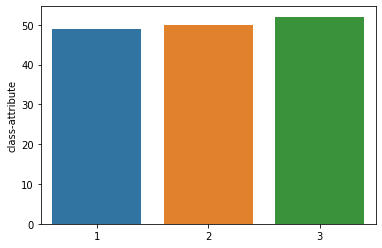

In [109]:
# para este plot utilizaremos a biblioteca seaborn, que é muito útil para gráficos no python
import seaborn as sns
# para plotar a proporção das classes, primeiro contamos os valores da coluna 'target' e transformamos em um frame
aux = pd.DataFrame(dataset['class-attribute'].value_counts())
# usamos o frame criado acima para plot a frequencia de cada classe no dataset
sns.barplot(x=aux.index, y='class-attribute', data=aux)

## Calculo da Diferenca Absoluta

Observando os resultados, podemos ver que os metodos KNN e Arvore de Decisao tem as melhores performances, logo temos que calcular a diferenca absoluta para ver qual dos dois e de fato o melhor

In [ ]:
#Calculo do desvio padrao
import math
Dp = math.sqrt(((0.288752)*(0.288752) + (0.301773)*(0.301773))/2)
#Calculo da media
media = (0.680000 - 0.660000)
#calcula da Diferenca Absoluta
DA = media/Dp
print(DA)
#KNN > Arvore de Decisao

0.06771987571780981


Conclusao: O KNN tem uma melhor performance do que a Arvore de decisao e o restante dos algoritmos

